In [1]:
# 빅데이터분석 기말 프로젝트
# 서울시 환경오염물질 배출시설 (수질) 통계  
# 서울시 수질현황 통계

## 서울시 환경오염물질 배출시설 (수질) 통계  

**1. 데이터 수집**

In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('source/환경오염물질+배출시설1.csv', sep=',',header=1, encoding='utf-8', engine='python')
data.to_csv('source/환경오염물질+배출시설+정리1.csv', index=False)
data

,지역별(1),지역별(2),시점,소계,1종,2종,3종,4종,5종,소계.1,1종.1,2종.1,3종.1,4종.1,5종.1,소계.2,정온지역,정온지역외
0,합계,소계,2007,1049,12,11,10,188,828,4491,8,7,34,99,4343,555,-,-
1,합계,소계,2008,1059,13,12,7,184,843,4395,6,12,35,106,4236,536,-,-
2,합계,소계,2009,1068,12,4,6,171,875,4172,6,9,39,101,4017,545,-,-
3,합계,소계,2010,1068,13,3,6,166,880,4088,6,7,41,102,3932,541,-,-
4,합계,소계,2011,1083,14,4,5,167,893,3976,6,5,39,94,3832,525,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,합계,강동구,2018,29,-,1,1,8,19,128,1,-,2,7,118,-,-,-
412,합계,강동구,2019,26,-,1,1,7,17,119,1,-,4,5,109,-,-,-
413,합계,강동구,2020,26,-,1,1,7,17,107,1,-,4,4,98,-,-,-
414,합계,강동구,2021,39,-,1,2,21,15,99,1,-,3,4,91,-,...,...


**2. 데이터 정제**
1. '지역별(2)' 칼럼에서 소계 삭제
2. 필요한 데이터 추출1 : '지역별(2)', '시점'
3. 필요한 데이터 추출2 :  '소계.1', 폐수 소계 데이터
4. wwdata 데이터프레임 생성 

In [4]:
# 소계 데이터 날리기
data=data.iloc[16:,:]
data.head()

,지역별(1),지역별(2),시점,소계,1종,2종,3종,4종,5종,소계.1,1종.1,2종.1,3종.1,4종.1,5종.1,소계.2,정온지역,정온지역외
16,합계,종로구,2007,6,-,-,-,-,6,144,-,-,1,1,142,2,-,-
17,합계,종로구,2008,6,-,-,-,-,6,139,-,-,1,1,137,1,-,-
18,합계,종로구,2009,6,-,-,-,-,6,135,-,-,1,1,133,1,-,-
19,합계,종로구,2010,6,-,-,-,-,6,137,-,-,1,1,135,1,-,-
20,합계,종로구,2011,6,-,-,-,-,6,132,-,-,-,-,132,1,-,-


In [5]:
# data1 : 지역, 시점 데이터
data1=data.iloc[:,1:3]
data1.head()

,지역별(2),시점
16,종로구,2007
17,종로구,2008
18,종로구,2009
19,종로구,2010
20,종로구,2011


In [6]:
# data2 : 폐수 소계 데이터
data2=data.iloc[:,9]
data2.head()

16    144
17    139
18    135
19    137
20    132
Name: 소계.1, dtype: int64

In [7]:
# wwdata : 필요한 데이터 합치기
wwdata=pd.concat([data1,data2], axis=1)  #옆(가로)으로 결합, axis=0은 아래(세로)로 결합
wwdata.head()

,지역별(2),시점,소계.1
16,종로구,2007,144
17,종로구,2008,139
18,종로구,2009,135
19,종로구,2010,137
20,종로구,2011,132


In [8]:
# wwdata 칼럼명 수정
wwdata.columns = ["지역", "년도", "폐수 소계"]
wwdata.head()

,지역,년도,폐수 소계
16,종로구,2007,144
17,종로구,2008,139
18,종로구,2009,135
19,종로구,2010,137
20,종로구,2011,132


In [9]:
wwdata  #데이터 확인

,지역,년도,폐수 소계
16,종로구,2007,144
17,종로구,2008,139
18,종로구,2009,135
19,종로구,2010,137
20,종로구,2011,132
...,...,...,...
411,강동구,2018,128
412,강동구,2019,119
413,강동구,2020,107
414,강동구,2021,99


**3. 데이터 탐색**
1. wwdata : 전체 데이터에 대한 시각화
2. wwdata2 : 가장 큰 소계의 중구를 제외한 데이터에 대한 시각화

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlib 그래프 외부 창에서 열기
# %matplotlib tk

#mac matplotlib 한글 폰트 적용  
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
rc('font', family='AppleGothic')

In [11]:
# - (1) 전체 데이터에 대한 시각화 - wwdata

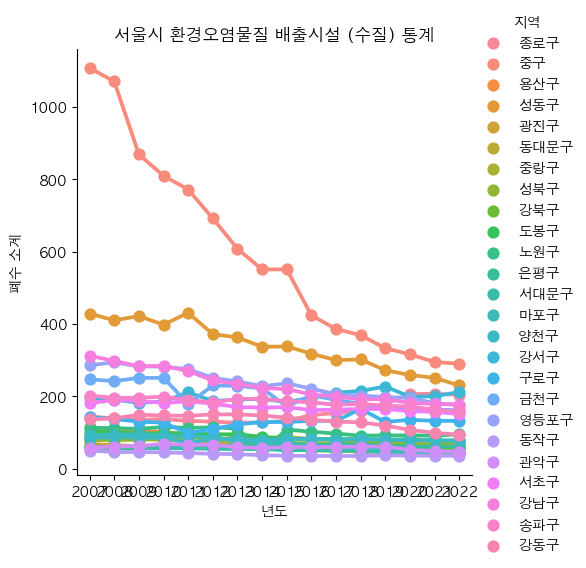

In [12]:
sns.catplot(x='년도', y='폐수 소계', hue='지역', data=wwdata, kind='point')
plt.title('서울시 환경오염물질 배출시설 (수질) 통계')
plt.show()

In [13]:
# - (2) 가장 큰 소계의 중구를 제외한 데이터에 대한 시각화 - wwdata2

In [14]:
# 중구 데이터를 가진 행 확인
wwdata2 = wwdata
wwdata2.loc[wwdata2['지역'] == '중구']

,지역,년도,폐수 소계
32,중구,2007,1108
33,중구,2008,1071
34,중구,2009,869
35,중구,2010,810
36,중구,2011,772
37,중구,2012,692
38,중구,2013,608
39,중구,2014,551
40,중구,2015,551
41,중구,2016,424


In [15]:
# 종로구 데이터를 가진 행 삭제
wwdata2.drop(wwdata2[wwdata2['지역']=='중구'].index, inplace=True)
wwdata2

,지역,년도,폐수 소계
16,종로구,2007,144
17,종로구,2008,139
18,종로구,2009,135
19,종로구,2010,137
20,종로구,2011,132
...,...,...,...
411,강동구,2018,128
412,강동구,2019,119
413,강동구,2020,107
414,강동구,2021,99


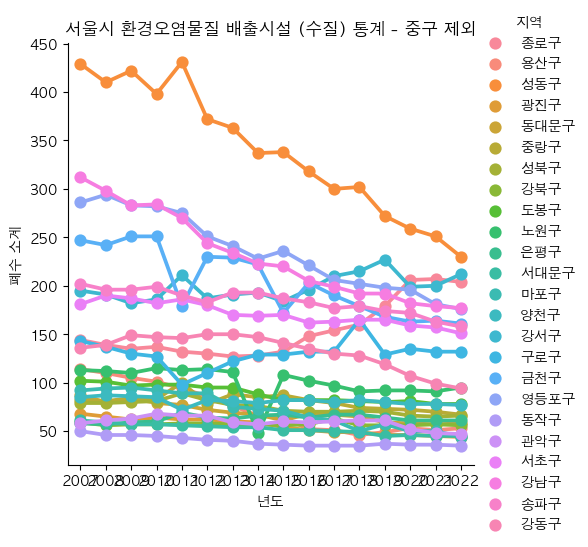

In [16]:
# wwdata2 시각화
sns.catplot(x='년도', y='폐수 소계', hue='지역', data=wwdata2, kind='point')
plt.title('서울시 환경오염물질 배출시설 (수질) 통계 - 중구 제외')
plt.show()

## 서울시 수질현황 통계

**1. 데이터 수집**

In [17]:
WaterDataset = pd.read_excel('source/수질현황.xlsx')

**2. 데이터 정제**
1. 2007-2022년의 데이터 추출
2. 하천 수질에 영향을 끼치는 5개 인자(수소이온농도, 용존 산소, 생물화학적산소요구량, 부유물질, 총대장균군)에 대한 데이터만 추출)
3. ‘수질현황별(1)’ 열의 하천 및 지명을 ‘서울시 환경오염물질 배출시설 통계’의 ‘지역별(2)’ 열의 지명에 맞추어 하천이 속한‘구’로 수정
4. 가공이 용이하도록 데이터셋 수정

**3. 데이터 탐색**

In [18]:
WaterDataset.head()

,2007,수소이온농도,용존산소 DO,생물화학적산소요구량,부유물질,총대장균군
0,강동구,8.1,10.8,1.4,9.9,635
1,광진구,8.1,10.9,1.6,10.1,477
2,송파구,8.1,10.8,1.6,9.9,758
3,용산구,7.7,9.8,3.2,11.3,8788
4,동작구,7.5,9,3.5,10.8,9716


In [19]:
# 연도별 데이터 추출
Water2007 = pd.DataFrame(WaterDataset.iloc[0:19])
Water2008 = pd.DataFrame(WaterDataset.iloc[20:39])
Water2009 = pd.DataFrame(WaterDataset.iloc[40:59])
Water2010 = pd.DataFrame(WaterDataset.iloc[60:79])
Water2011 = pd.DataFrame(WaterDataset.iloc[80:99])
Water2012 = pd.DataFrame(WaterDataset.iloc[100:119])
Water2013 = pd.DataFrame(WaterDataset.iloc[120:139])
Water2014 = pd.DataFrame(WaterDataset.iloc[140:159])
Water2015 = pd.DataFrame(WaterDataset.iloc[160:179])
Water2016 = pd.DataFrame(WaterDataset.iloc[180:199])
Water2017 = pd.DataFrame(WaterDataset.iloc[200:219])
Water2018 = pd.DataFrame(WaterDataset.iloc[220:239])
Water2019 = pd.DataFrame(WaterDataset.iloc[240:259])
Water2020 = pd.DataFrame(WaterDataset.iloc[260:279])
Water2021 = pd.DataFrame(WaterDataset.iloc[280:299])
Water2022 = pd.DataFrame(WaterDataset.iloc[300:319])

**수질 요소 변화**

In [20]:
# 강동구 연도별 데이터 추출
GangDong_suso = []
GangDong_suso.append(Water2007.loc[0, "수소이온농도"])
GangDong_suso.append(Water2008.loc[20, "수소이온농도"])
GangDong_suso.append(Water2009.loc[40, "수소이온농도"])
GangDong_suso.append(Water2010.loc[60, "수소이온농도"])
GangDong_suso.append(Water2011.loc[80, "수소이온농도"])
GangDong_suso.append(Water2012.loc[100, "수소이온농도"])
GangDong_suso.append(Water2013.loc[120, "수소이온농도"])
GangDong_suso.append(Water2014.loc[140, "수소이온농도"])
GangDong_suso.append(Water2015.loc[160, "수소이온농도"])
GangDong_suso.append(Water2016.loc[180, "수소이온농도"])
GangDong_suso.append(Water2017.loc[200, "수소이온농도"])
GangDong_suso.append(Water2018.loc[220, "수소이온농도"])
GangDong_suso.append(Water2019.loc[240, "수소이온농도"])
GangDong_suso.append(Water2020.loc[260, "수소이온농도"])
GangDong_suso.append(Water2021.loc[280, "수소이온농도"])
GangDong_suso.append(Water2022.loc[300, "수소이온농도"])

GangDong_DO = []
GangDong_DO.append(Water2007.loc[0, "용존산소 DO"])
GangDong_DO.append(Water2008.loc[20, "용존산소 DO"])
GangDong_DO.append(Water2009.loc[40, "용존산소 DO"])
GangDong_DO.append(Water2010.loc[60, "용존산소 DO"])
GangDong_DO.append(Water2011.loc[80, "용존산소 DO"])
GangDong_DO.append(Water2012.loc[100, "용존산소 DO"])
GangDong_DO.append(Water2013.loc[120, "용존산소 DO"])
GangDong_DO.append(Water2014.loc[140, "용존산소 DO"])
GangDong_DO.append(Water2015.loc[160, "용존산소 DO"])
GangDong_DO.append(Water2016.loc[180, "용존산소 DO"])
GangDong_DO.append(Water2017.loc[200, "용존산소 DO"])
GangDong_DO.append(Water2018.loc[220, "용존산소 DO"])
GangDong_DO.append(Water2019.loc[240, "용존산소 DO"])
GangDong_DO.append(Water2020.loc[260, "용존산소 DO"])
GangDong_DO.append(Water2021.loc[280, "용존산소 DO"])
GangDong_DO.append(Water2022.loc[300, "용존산소 DO"])

GangDong_02 = []
GangDong_02.append(Water2007.loc[0, "생물화학적산소요구량"])
GangDong_02.append(Water2008.loc[20, "생물화학적산소요구량"])
GangDong_02.append(Water2009.loc[40, "생물화학적산소요구량"])
GangDong_02.append(Water2010.loc[60, "생물화학적산소요구량"])
GangDong_02.append(Water2011.loc[80, "생물화학적산소요구량"])
GangDong_02.append(Water2012.loc[100, "생물화학적산소요구량"])
GangDong_02.append(Water2013.loc[120, "생물화학적산소요구량"])
GangDong_02.append(Water2014.loc[140, "생물화학적산소요구량"])
GangDong_02.append(Water2015.loc[160, "생물화학적산소요구량"])
GangDong_02.append(Water2016.loc[180, "생물화학적산소요구량"])
GangDong_02.append(Water2017.loc[200, "생물화학적산소요구량"])
GangDong_02.append(Water2018.loc[220, "생물화학적산소요구량"])
GangDong_02.append(Water2019.loc[240, "생물화학적산소요구량"])
GangDong_02.append(Water2020.loc[260, "생물화학적산소요구량"])
GangDong_02.append(Water2021.loc[280, "생물화학적산소요구량"])
GangDong_02.append(Water2022.loc[300, "생물화학적산소요구량"])

GangDong_DO = []
GangDong_DO.append(Water2007.loc[0, "용존산소 DO"])
GangDong_DO.append(Water2008.loc[20, "용존산소 DO"])
GangDong_DO.append(Water2009.loc[40, "용존산소 DO"])
GangDong_DO.append(Water2010.loc[60, "용존산소 DO"])
GangDong_DO.append(Water2011.loc[80, "용존산소 DO"])
GangDong_DO.append(Water2012.loc[100, "용존산소 DO"])
GangDong_DO.append(Water2013.loc[120, "용존산소 DO"])
GangDong_DO.append(Water2014.loc[140, "용존산소 DO"])
GangDong_DO.append(Water2015.loc[160, "용존산소 DO"])
GangDong_DO.append(Water2016.loc[180, "용존산소 DO"])
GangDong_DO.append(Water2017.loc[200, "용존산소 DO"])
GangDong_DO.append(Water2018.loc[220, "용존산소 DO"])
GangDong_DO.append(Water2019.loc[240, "용존산소 DO"])
GangDong_DO.append(Water2020.loc[260, "용존산소 DO"])
GangDong_DO.append(Water2021.loc[280, "용존산소 DO"])
GangDong_DO.append(Water2022.loc[300, "용존산소 DO"])

GangDong_02 = []
GangDong_02.append(Water2007.loc[0, "생물화학적산소요구량"])
GangDong_02.append(Water2008.loc[20, "생물화학적산소요구량"])
GangDong_02.append(Water2009.loc[40, "생물화학적산소요구량"])
GangDong_02.append(Water2010.loc[60, "생물화학적산소요구량"])
GangDong_02.append(Water2011.loc[80, "생물화학적산소요구량"])
GangDong_02.append(Water2012.loc[100, "생물화학적산소요구량"])
GangDong_02.append(Water2013.loc[120, "생물화학적산소요구량"])
GangDong_02.append(Water2014.loc[140, "생물화학적산소요구량"])
GangDong_02.append(Water2015.loc[160, "생물화학적산소요구량"])
GangDong_02.append(Water2016.loc[180, "생물화학적산소요구량"])
GangDong_02.append(Water2017.loc[200, "생물화학적산소요구량"])
GangDong_02.append(Water2018.loc[220, "생물화학적산소요구량"])
GangDong_02.append(Water2019.loc[240, "생물화학적산소요구량"])
GangDong_02.append(Water2020.loc[260, "생물화학적산소요구량"])
GangDong_02.append(Water2021.loc[280, "생물화학적산소요구량"])
GangDong_02.append(Water2022.loc[300, "생물화학적산소요구량"])

GangDong_SS = []
GangDong_SS.append(Water2007.loc[0, "총대장균군"])
GangDong_SS.append(Water2008.loc[20, "부유물질"])
GangDong_SS.append(Water2009.loc[40, "부유물질"])
GangDong_SS.append(Water2010.loc[60, "부유물질"])
GangDong_SS.append(Water2011.loc[80, "부유물질"])
GangDong_SS.append(Water2012.loc[100, "부유물질"])
GangDong_SS.append(Water2013.loc[120, "부유물질"])
GangDong_SS.append(Water2014.loc[140, "부유물질"])
GangDong_SS.append(Water2015.loc[160, "부유물질"])
GangDong_SS.append(Water2016.loc[180, "부유물질"])
GangDong_SS.append(Water2017.loc[200, "부유물질"])
GangDong_SS.append(Water2018.loc[220, "부유물질"])
GangDong_SS.append(Water2019.loc[240, "부유물질"])
GangDong_SS.append(Water2020.loc[260, "부유물질"])
GangDong_SS.append(Water2021.loc[280, "부유물질"])
GangDong_SS.append(Water2022.loc[300, "부유물질"])

GangDong_Coliform = []
GangDong_Coliform.append(Water2007.loc[0, "총대장균군"])
GangDong_Coliform.append(Water2008.loc[20, "총대장균군"])
GangDong_Coliform.append(Water2009.loc[40, "총대장균군"])
GangDong_Coliform.append(Water2010.loc[60, "총대장균군"])
GangDong_Coliform.append(Water2011.loc[80, "총대장균군"])
GangDong_Coliform.append(Water2012.loc[100, "총대장균군"])
GangDong_Coliform.append(Water2013.loc[120, "총대장균군"])
GangDong_Coliform.append(Water2014.loc[140, "총대장균군"])
GangDong_Coliform.append(Water2015.loc[160, "총대장균군"])
GangDong_Coliform.append(Water2016.loc[180, "총대장균군"])
GangDong_Coliform.append(Water2017.loc[200, "총대장균군"])
GangDong_Coliform.append(Water2018.loc[220, "총대장균군"])
GangDong_Coliform.append(Water2019.loc[240, "총대장균군"])
GangDong_Coliform.append(Water2020.loc[260, "총대장균군"])
GangDong_Coliform.append(Water2021.loc[280, "총대장균군"])
GangDong_Coliform.append(Water2022.loc[300, "총대장균군"])

In [21]:
# 광진구 연도별 데이터 추출
Gwangjin_suso = []
Gwangjin_suso.append(Water2007.loc[1, "수소이온농도"])
Gwangjin_suso.append(Water2008.loc[21, "수소이온농도"])
Gwangjin_suso.append(Water2009.loc[41, "수소이온농도"])
Gwangjin_suso.append(Water2010.loc[61, "수소이온농도"])
Gwangjin_suso.append(Water2011.loc[81, "수소이온농도"])
Gwangjin_suso.append(Water2012.loc[101, "수소이온농도"])
Gwangjin_suso.append(Water2013.loc[121, "수소이온농도"])
Gwangjin_suso.append(Water2014.loc[141, "수소이온농도"])
Gwangjin_suso.append(Water2015.loc[161, "수소이온농도"])
Gwangjin_suso.append(Water2016.loc[181, "수소이온농도"])
Gwangjin_suso.append(Water2017.loc[201, "수소이온농도"])
Gwangjin_suso.append(Water2018.loc[221, "수소이온농도"])
Gwangjin_suso.append(Water2019.loc[241, "수소이온농도"])
Gwangjin_suso.append(Water2020.loc[261, "수소이온농도"])
Gwangjin_suso.append(Water2021.loc[281, "수소이온농도"])
Gwangjin_suso.append(Water2022.loc[301, "수소이온농도"])

Gwangjin_DO = []
Gwangjin_DO.append(Water2007.loc[1, "용존산소 DO"])
Gwangjin_DO.append(Water2008.loc[21, "용존산소 DO"])
Gwangjin_DO.append(Water2009.loc[41, "용존산소 DO"])
Gwangjin_DO.append(Water2010.loc[61, "용존산소 DO"])
Gwangjin_DO.append(Water2011.loc[81, "용존산소 DO"])
Gwangjin_DO.append(Water2012.loc[101, "용존산소 DO"])
Gwangjin_DO.append(Water2013.loc[121, "용존산소 DO"])
Gwangjin_DO.append(Water2014.loc[141, "용존산소 DO"])
Gwangjin_DO.append(Water2015.loc[161, "용존산소 DO"])
Gwangjin_DO.append(Water2016.loc[181, "용존산소 DO"])
Gwangjin_DO.append(Water2017.loc[201, "용존산소 DO"])
Gwangjin_DO.append(Water2018.loc[221, "용존산소 DO"])
Gwangjin_DO.append(Water2019.loc[241, "용존산소 DO"])
Gwangjin_DO.append(Water2020.loc[261, "용존산소 DO"])
Gwangjin_DO.append(Water2021.loc[281, "용존산소 DO"])
Gwangjin_DO.append(Water2022.loc[301, "용존산소 DO"])

Gwangjin_02 = []
Gwangjin_02.append(Water2007.loc[1, "생물화학적산소요구량"])
Gwangjin_02.append(Water2008.loc[21, "생물화학적산소요구량"])
Gwangjin_02.append(Water2009.loc[41, "생물화학적산소요구량"])
Gwangjin_02.append(Water2010.loc[61, "생물화학적산소요구량"])
Gwangjin_02.append(Water2011.loc[81, "생물화학적산소요구량"])
Gwangjin_02.append(Water2012.loc[101, "생물화학적산소요구량"])
Gwangjin_02.append(Water2013.loc[121, "생물화학적산소요구량"])
Gwangjin_02.append(Water2014.loc[141, "생물화학적산소요구량"])
Gwangjin_02.append(Water2015.loc[161, "생물화학적산소요구량"])
Gwangjin_02.append(Water2016.loc[181, "생물화학적산소요구량"])
Gwangjin_02.append(Water2017.loc[201, "생물화학적산소요구량"])
Gwangjin_02.append(Water2018.loc[221, "생물화학적산소요구량"])
Gwangjin_02.append(Water2019.loc[241, "생물화학적산소요구량"])
Gwangjin_02.append(Water2020.loc[261, "생물화학적산소요구량"])
Gwangjin_02.append(Water2021.loc[281, "생물화학적산소요구량"])
Gwangjin_02.append(Water2022.loc[301, "생물화학적산소요구량"])

Gwangjin_DO = []
Gwangjin_DO.append(Water2007.loc[1, "용존산소 DO"])
Gwangjin_DO.append(Water2008.loc[21, "용존산소 DO"])
Gwangjin_DO.append(Water2009.loc[41, "용존산소 DO"])
Gwangjin_DO.append(Water2010.loc[61, "용존산소 DO"])
Gwangjin_DO.append(Water2011.loc[81, "용존산소 DO"])
Gwangjin_DO.append(Water2012.loc[101, "용존산소 DO"])
Gwangjin_DO.append(Water2013.loc[121, "용존산소 DO"])
Gwangjin_DO.append(Water2014.loc[141, "용존산소 DO"])
Gwangjin_DO.append(Water2015.loc[161, "용존산소 DO"])
Gwangjin_DO.append(Water2016.loc[181, "용존산소 DO"])
Gwangjin_DO.append(Water2017.loc[201, "용존산소 DO"])
Gwangjin_DO.append(Water2018.loc[221, "용존산소 DO"])
Gwangjin_DO.append(Water2019.loc[241, "용존산소 DO"])
Gwangjin_DO.append(Water2020.loc[261, "용존산소 DO"])
Gwangjin_DO.append(Water2021.loc[281, "용존산소 DO"])
Gwangjin_DO.append(Water2022.loc[301, "용존산소 DO"])

Gwangjin_02 = []
Gwangjin_02.append(Water2007.loc[1, "생물화학적산소요구량"])
Gwangjin_02.append(Water2008.loc[21, "생물화학적산소요구량"])
Gwangjin_02.append(Water2009.loc[41, "생물화학적산소요구량"])
Gwangjin_02.append(Water2010.loc[61, "생물화학적산소요구량"])
Gwangjin_02.append(Water2011.loc[81, "생물화학적산소요구량"])
Gwangjin_02.append(Water2012.loc[101, "생물화학적산소요구량"])
Gwangjin_02.append(Water2013.loc[121, "생물화학적산소요구량"])
Gwangjin_02.append(Water2014.loc[141, "생물화학적산소요구량"])
Gwangjin_02.append(Water2015.loc[161, "생물화학적산소요구량"])
Gwangjin_02.append(Water2016.loc[181, "생물화학적산소요구량"])
Gwangjin_02.append(Water2017.loc[201, "생물화학적산소요구량"])
Gwangjin_02.append(Water2018.loc[221, "생물화학적산소요구량"])
Gwangjin_02.append(Water2019.loc[241, "생물화학적산소요구량"])
Gwangjin_02.append(Water2020.loc[261, "생물화학적산소요구량"])
Gwangjin_02.append(Water2021.loc[281, "생물화학적산소요구량"])
Gwangjin_02.append(Water2022.loc[301, "생물화학적산소요구량"])

Gwangjin_SS = []
Gwangjin_SS.append(Water2007.loc[1, "부유물질"])
Gwangjin_SS.append(Water2008.loc[21, "부유물질"])
Gwangjin_SS.append(Water2009.loc[41, "부유물질"])
Gwangjin_SS.append(Water2010.loc[61, "부유물질"])
Gwangjin_SS.append(Water2011.loc[81, "부유물질"])
Gwangjin_SS.append(Water2012.loc[101, "부유물질"])
Gwangjin_SS.append(Water2013.loc[121, "부유물질"])
Gwangjin_SS.append(Water2014.loc[141, "부유물질"])
Gwangjin_SS.append(Water2015.loc[161, "부유물질"])
Gwangjin_SS.append(Water2016.loc[181, "부유물질"])
Gwangjin_SS.append(Water2017.loc[201, "부유물질"])
Gwangjin_SS.append(Water2018.loc[221, "부유물질"])
Gwangjin_SS.append(Water2019.loc[241, "부유물질"])
Gwangjin_SS.append(Water2020.loc[261, "부유물질"])
Gwangjin_SS.append(Water2021.loc[281, "부유물질"])
Gwangjin_SS.append(Water2022.loc[301, "부유물질"])

Gwangjin_Coliform = []
Gwangjin_Coliform.append(Water2007.loc[1, "총대장균군"])
Gwangjin_Coliform.append(Water2008.loc[21, "총대장균군"])
Gwangjin_Coliform.append(Water2009.loc[41, "총대장균군"])
Gwangjin_Coliform.append(Water2010.loc[61, "총대장균군"])
Gwangjin_Coliform.append(Water2011.loc[81, "총대장균군"])
Gwangjin_Coliform.append(Water2012.loc[101, "총대장균군"])
Gwangjin_Coliform.append(Water2013.loc[121, "총대장균군"])
Gwangjin_Coliform.append(Water2014.loc[141, "총대장균군"])
Gwangjin_Coliform.append(Water2015.loc[161, "총대장균군"])
Gwangjin_Coliform.append(Water2016.loc[181, "총대장균군"])
Gwangjin_Coliform.append(Water2017.loc[201, "총대장균군"])
Gwangjin_Coliform.append(Water2018.loc[221, "총대장균군"])
Gwangjin_Coliform.append(Water2019.loc[241, "총대장균군"])
Gwangjin_Coliform.append(Water2020.loc[261, "총대장균군"])
Gwangjin_Coliform.append(Water2021.loc[281, "총대장균군"])
Gwangjin_Coliform.append(Water2022.loc[301, "총대장균군"])

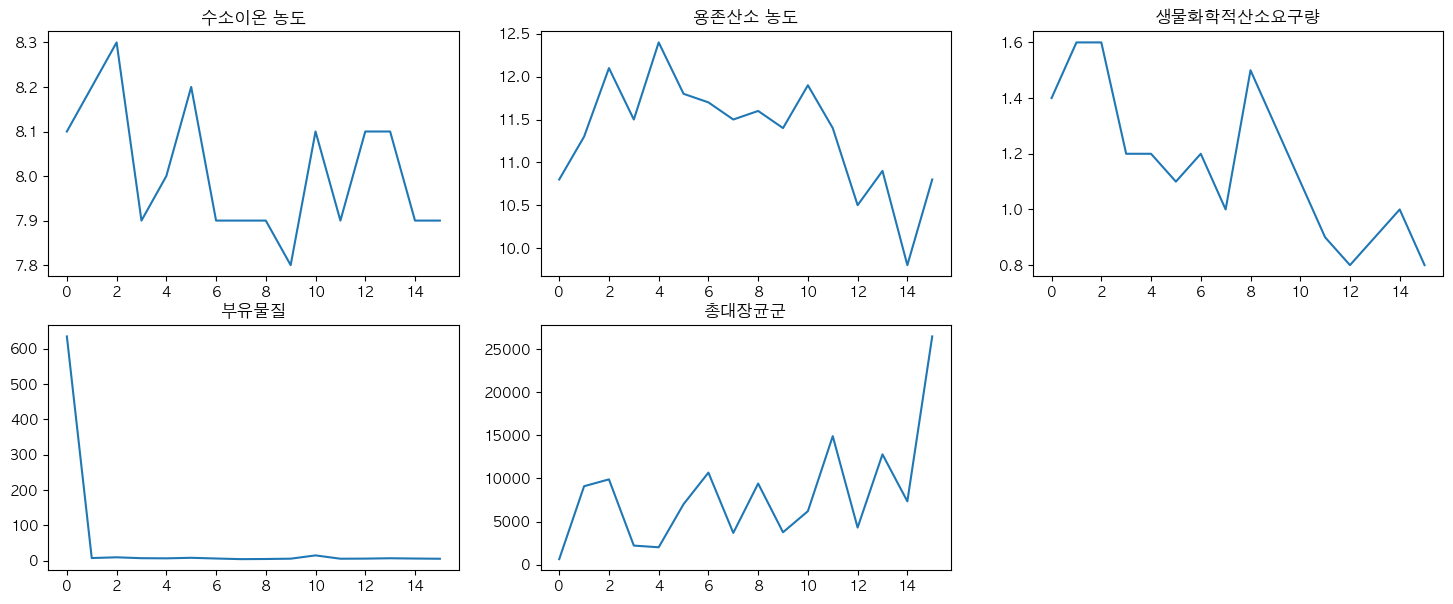

In [22]:
# 강동구 그래프 출력
plt.figure(figsize=(18, 7))
plt.subplot(2, 3, 1)
plt.title("수소이온 농도")
plt.plot(GangDong_suso)

plt.subplot(2, 3, 2)
plt.plot(GangDong_DO)
plt.title("용존산소 농도")

plt.subplot(2, 3, 3)
plt.plot(GangDong_02)
plt.title("생물화학적산소요구량")

plt.subplot(2, 3, 4)
plt.plot(GangDong_SS)
plt.title("부유물질")

plt.subplot(2, 3, 5)
plt.plot(GangDong_Coliform)
plt.title("총대장균군")

plt.show()

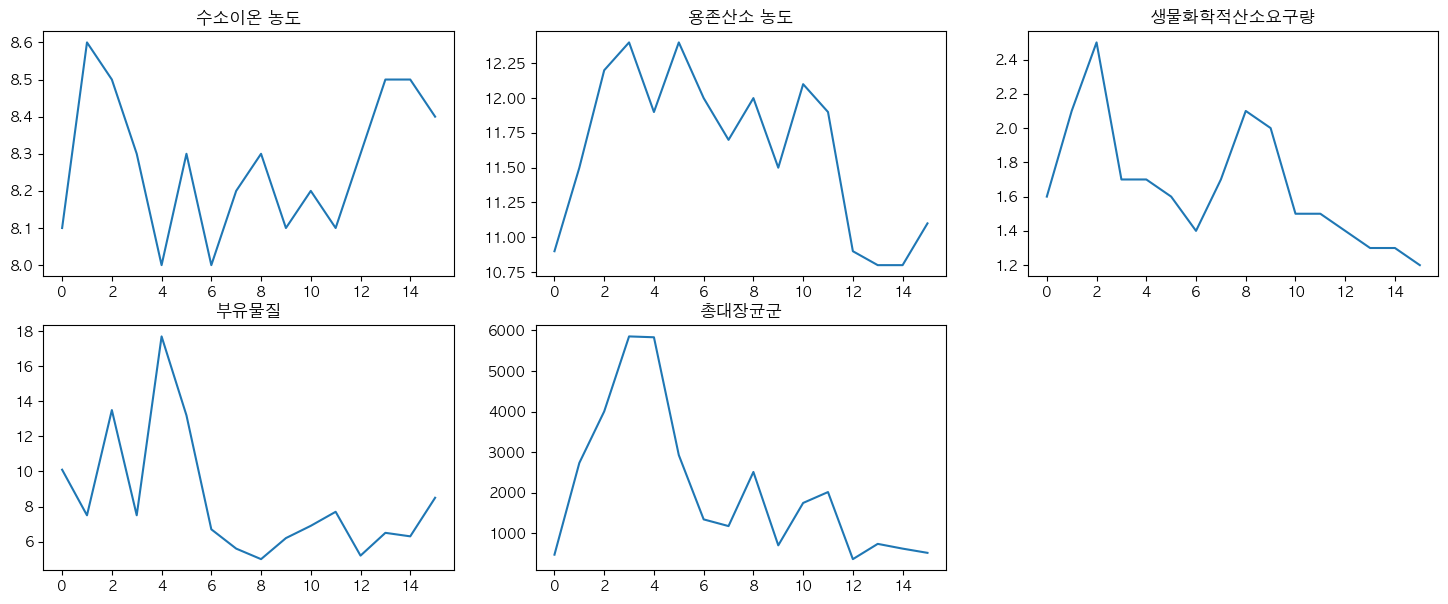

In [23]:
# 광진구 그래프 출력
plt.figure(figsize=(18, 7))
plt.subplot(2, 3, 1)
plt.title("수소이온 농도")
plt.plot(Gwangjin_suso)

plt.subplot(2, 3, 2)
plt.plot(Gwangjin_DO)
plt.title("용존산소 농도")

plt.subplot(2, 3, 3)
plt.plot(Gwangjin_02)
plt.title("생물화학적산소요구량")

plt.subplot(2, 3, 4)
plt.plot(Gwangjin_SS)
plt.title("부유물질")

plt.subplot(2, 3, 5)
plt.plot(Gwangjin_Coliform)
plt.title("총대장균군")

plt.show()

**수질 변화**

In [24]:
# 수질 전역변수 선연
quality = 0

In [25]:
# 수질 등급 계산 함수
def water_quality(suso, DO, O2, SS, Coliform):
  quality = 0
  if(6.5 <= suso <= 8.5) and (O2 <= 1) and (SS <= 25) and (DO >= 7.5) and (Coliform <= 50):
    quality = 1
  elif (6.5 <= suso <= 8.5) and (O2 <= 3) and (SS <= 25) and (DO >= 5) and (Coliform <= 1000):
    quality = 2
  elif (6.5 <= suso <= 8.5) and (O2 <= 6) and (SS <= 25) and (DO >= 5) and (Coliform <= 5000):
    quality = 3
  elif (6.0 <= suso <= 8.5) and (O2 <= 8) and (SS <= 100) and (DO >= 2):
    quality = 4
  else:
    quality = 5
  return quality

In [26]:
# 강동구 연도별 수질등급 계산
Quality = []

# 2007
water = water_quality(Water2007.loc[0, "수소이온농도"], Water2007.loc[0, "용존산소 DO"], Water2007.loc[0, "생물화학적산소요구량"],
                      Water2007.loc[0, "부유물질"], Water2007.loc[0, "총대장균군"])
Quality.append(water)

# 2008
water = water_quality(Water2008.loc[20, "수소이온농도"], Water2008.loc[20, "용존산소 DO"], Water2008.loc[20, "생물화학적산소요구량"],
                      Water2008.loc[20, "부유물질"], Water2008.loc[20, "총대장균군"])
Quality.append(water)

# 2009
water = water_quality(Water2009.loc[40, "수소이온농도"], Water2009.loc[40, "용존산소 DO"], Water2009.loc[40, "생물화학적산소요구량"],
                      Water2009.loc[40, "부유물질"], Water2009.loc[40, "총대장균군"])
Quality.append(water)

# 2010
water = water_quality(Water2010.loc[60, "수소이온농도"], Water2010.loc[60, "용존산소 DO"], Water2010.loc[60, "생물화학적산소요구량"],
                      Water2010.loc[60, "부유물질"], Water2010.loc[60, "총대장균군"])
Quality.append(water)

# 20011
water = water_quality(Water2011.loc[80, "수소이온농도"], Water2011.loc[80, "용존산소 DO"], Water2011.loc[80, "생물화학적산소요구량"],
                      Water2011.loc[80, "부유물질"], Water2011.loc[80, "총대장균군"])
Quality.append(water)

# 2012
water = water_quality(Water2012.loc[100, "수소이온농도"], Water2012.loc[100, "용존산소 DO"], Water2012.loc[100, "생물화학적산소요구량"],
                      Water2012.loc[100, "부유물질"], Water2012.loc[100, "총대장균군"])
Quality.append(water)

# 20013
water = water_quality(Water2013.loc[120, "수소이온농도"], Water2013.loc[120, "용존산소 DO"], Water2013.loc[120, "생물화학적산소요구량"],
                      Water2013.loc[120, "부유물질"], Water2013.loc[120, "총대장균군"])
Quality.append(water)

# 2014
water = water_quality(Water2014.loc[140, "수소이온농도"], Water2014.loc[140, "용존산소 DO"], Water2014.loc[140, "생물화학적산소요구량"],
                      Water2014.loc[140, "부유물질"], Water2014.loc[140, "총대장균군"])
Quality.append(water)

# 2015
water = water_quality(Water2015.loc[160, "수소이온농도"], Water2015.loc[160, "용존산소 DO"], Water2015.loc[160, "생물화학적산소요구량"],
                      Water2015.loc[160, "부유물질"], Water2015.loc[160, "총대장균군"])
Quality.append(water)

# 2016
water = water_quality(Water2016.loc[180, "수소이온농도"], Water2016.loc[180, "용존산소 DO"], Water2016.loc[180, "생물화학적산소요구량"],
                      Water2016.loc[180, "부유물질"], Water2016.loc[180, "총대장균군"])
Quality.append(water)

# 2017
water = water_quality(Water2017.loc[200, "수소이온농도"], Water2017.loc[200, "용존산소 DO"], Water2017.loc[200, "생물화학적산소요구량"],
                      Water2017.loc[200, "부유물질"], Water2017.loc[200, "총대장균군"])
Quality.append(water)

# 2018
water = water_quality(Water2018.loc[220, "수소이온농도"], Water2018.loc[220, "용존산소 DO"], Water2018.loc[220, "생물화학적산소요구량"],
                      Water2018.loc[220, "부유물질"], Water2018.loc[220, "총대장균군"])
Quality.append(water)

# 2019
water = water_quality(Water2019.loc[240, "수소이온농도"], Water2019.loc[240, "용존산소 DO"], Water2019.loc[240, "생물화학적산소요구량"],
                      Water2019.loc[240, "부유물질"], Water2019.loc[240, "총대장균군"])
Quality.append(water)

# 2020
water = water_quality(Water2020.loc[260, "수소이온농도"], Water2020.loc[260, "용존산소 DO"], Water2020.loc[260, "생물화학적산소요구량"],
                      Water2020.loc[260, "부유물질"], Water2020.loc[260, "총대장균군"])
Quality.append(water)

# 2021
water = water_quality(Water2021.loc[280, "수소이온농도"], Water2021.loc[280, "용존산소 DO"], Water2021.loc[280, "생물화학적산소요구량"],
                      Water2021.loc[280, "부유물질"], Water2021.loc[280, "총대장균군"])
Quality.append(water)

# 2022
water = water_quality(Water2022.loc[300, "수소이온농도"], Water2022.loc[300, "용존산소 DO"], Water2022.loc[300, "생물화학적산소요구량"],
                      Water2022.loc[300, "부유물질"], Water2022.loc[300, "총대장균군"])
Quality.append(water)

print(Quality)

[2, 4, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 3, 4, 4, 4]


In [27]:
# 광진구 연도별 수질등급 계산
Quality1 = []

# 2007
water = water_quality(Water2007.loc[1, "수소이온농도"], Water2007.loc[1, "용존산소 DO"], Water2007.loc[1, "생물화학적산소요구량"],
                      Water2007.loc[1, "부유물질"], Water2007.loc[1, "총대장균군"])
Quality1.append(water)

# 2008
water = water_quality(Water2008.loc[21, "수소이온농도"], Water2008.loc[21, "용존산소 DO"], Water2008.loc[21, "생물화학적산소요구량"],
                      Water2008.loc[21, "부유물질"], Water2008.loc[21, "총대장균군"])
Quality1.append(water)

# 2009
water = water_quality(Water2009.loc[41, "수소이온농도"], Water2009.loc[41, "용존산소 DO"], Water2009.loc[41, "생물화학적산소요구량"],
                      Water2009.loc[41, "부유물질"], Water2009.loc[41, "총대장균군"])
Quality1.append(water)

# 2010
water = water_quality(Water2010.loc[61, "수소이온농도"], Water2010.loc[61, "용존산소 DO"], Water2010.loc[61, "생물화학적산소요구량"],
                      Water2010.loc[61, "부유물질"], Water2010.loc[61, "총대장균군"])
Quality1.append(water)

# 20011
water = water_quality(Water2011.loc[81, "수소이온농도"], Water2011.loc[81, "용존산소 DO"], Water2011.loc[81, "생물화학적산소요구량"],
                      Water2011.loc[81, "부유물질"], Water2011.loc[81, "총대장균군"])
Quality1.append(water)

# 2012
water = water_quality(Water2012.loc[101, "수소이온농도"], Water2012.loc[101, "용존산소 DO"], Water2012.loc[101, "생물화학적산소요구량"],
                      Water2012.loc[101, "부유물질"], Water2012.loc[101, "총대장균군"])
Quality1.append(water)

# 20013
water = water_quality(Water2013.loc[121, "수소이온농도"], Water2013.loc[121, "용존산소 DO"], Water2013.loc[121, "생물화학적산소요구량"],
                      Water2013.loc[121, "부유물질"], Water2013.loc[121, "총대장균군"])
Quality1.append(water)

# 2014
water = water_quality(Water2014.loc[141, "수소이온농도"], Water2014.loc[141, "용존산소 DO"], Water2014.loc[141, "생물화학적산소요구량"],
                      Water2014.loc[141, "부유물질"], Water2014.loc[141, "총대장균군"])
Quality1.append(water)

# 2015
water = water_quality(Water2015.loc[161, "수소이온농도"], Water2015.loc[161, "용존산소 DO"], Water2015.loc[161, "생물화학적산소요구량"],
                      Water2015.loc[161, "부유물질"], Water2015.loc[161, "총대장균군"])
Quality1.append(water)

# 2016
water = water_quality(Water2016.loc[181, "수소이온농도"], Water2016.loc[181, "용존산소 DO"], Water2016.loc[181, "생물화학적산소요구량"],
                      Water2016.loc[181, "부유물질"], Water2016.loc[181, "총대장균군"])
Quality1.append(water)

# 2017
water = water_quality(Water2017.loc[201, "수소이온농도"], Water2017.loc[201, "용존산소 DO"], Water2017.loc[201, "생물화학적산소요구량"],
                      Water2017.loc[201, "부유물질"], Water2017.loc[201, "총대장균군"])
Quality1.append(water)

# 2018
water = water_quality(Water2018.loc[221, "수소이온농도"], Water2018.loc[221, "용존산소 DO"], Water2018.loc[221, "생물화학적산소요구량"],
                      Water2018.loc[221, "부유물질"], Water2018.loc[221, "총대장균군"])
Quality1.append(water)

# 2019
water = water_quality(Water2019.loc[241, "수소이온농도"], Water2019.loc[241, "용존산소 DO"], Water2019.loc[241, "생물화학적산소요구량"],
                      Water2019.loc[241, "부유물질"], Water2019.loc[241, "총대장균군"])
Quality1.append(water)

# 2020
water = water_quality(Water2020.loc[261, "수소이온농도"], Water2020.loc[261, "용존산소 DO"], Water2020.loc[261, "생물화학적산소요구량"],
                      Water2020.loc[261, "부유물질"], Water2020.loc[261, "총대장균군"])
Quality1.append(water)

# 2021
water = water_quality(Water2021.loc[281, "수소이온농도"], Water2021.loc[281, "용존산소 DO"], Water2021.loc[281, "생물화학적산소요구량"],
                      Water2021.loc[281, "부유물질"], Water2021.loc[281, "총대장균군"])
Quality1.append(water)

# 2022
water = water_quality(Water2022.loc[301, "수소이온농도"], Water2022.loc[301, "용존산소 DO"], Water2022.loc[301, "생물화학적산소요구량"],
                      Water2022.loc[301, "부유물질"], Water2022.loc[301, "총대장균군"])
Quality1.append(water)

print(Quality1)

[2, 5, 3, 4, 4, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2]


In [28]:
# 광진구 연도별 수질등급 계산
Quality2 = []

# 2007
water = water_quality(Water2007.loc[2, "수소이온농도"], Water2007.loc[2, "용존산소 DO"], Water2007.loc[2, "생물화학적산소요구량"],
                      Water2007.loc[2, "부유물질"], Water2007.loc[2, "총대장균군"])
Quality2.append(water)

# 2008
water = water_quality(Water2008.loc[22, "수소이온농도"], Water2008.loc[22, "용존산소 DO"], Water2008.loc[22, "생물화학적산소요구량"],
                      Water2008.loc[22, "부유물질"], Water2008.loc[22, "총대장균군"])
Quality2.append(water)

# 2009
water = water_quality(Water2009.loc[42, "수소이온농도"], Water2009.loc[42, "용존산소 DO"], Water2009.loc[42, "생물화학적산소요구량"],
                      Water2009.loc[42, "부유물질"], Water2009.loc[42, "총대장균군"])
Quality2.append(water)

# 2010
water = water_quality(Water2010.loc[62, "수소이온농도"], Water2010.loc[62, "용존산소 DO"], Water2010.loc[62, "생물화학적산소요구량"],
                      Water2010.loc[62, "부유물질"], Water2010.loc[62, "총대장균군"])
Quality2.append(water)

# 20011
water = water_quality(Water2011.loc[82, "수소이온농도"], Water2011.loc[82, "용존산소 DO"], Water2011.loc[82, "생물화학적산소요구량"],
                      Water2011.loc[82, "부유물질"], Water2011.loc[82, "총대장균군"])
Quality2.append(water)

# 2012
water = water_quality(Water2012.loc[102, "수소이온농도"], Water2012.loc[102, "용존산소 DO"], Water2012.loc[102, "생물화학적산소요구량"],
                      Water2012.loc[102, "부유물질"], Water2012.loc[102, "총대장균군"])
Quality2.append(water)

# 20013
water = water_quality(Water2013.loc[122, "수소이온농도"], Water2013.loc[122, "용존산소 DO"], Water2013.loc[122, "생물화학적산소요구량"],
                      Water2013.loc[122, "부유물질"], Water2013.loc[122, "총대장균군"])
Quality2.append(water)

# 2014
water = water_quality(Water2014.loc[142, "수소이온농도"], Water2014.loc[142, "용존산소 DO"], Water2014.loc[142, "생물화학적산소요구량"],
                      Water2014.loc[142, "부유물질"], Water2014.loc[142, "총대장균군"])
Quality2.append(water)

# 2015
water = water_quality(Water2015.loc[162, "수소이온농도"], Water2015.loc[162, "용존산소 DO"], Water2015.loc[162, "생물화학적산소요구량"],
                      Water2015.loc[162, "부유물질"], Water2015.loc[162, "총대장균군"])
Quality2.append(water)

# 2016
water = water_quality(Water2016.loc[182, "수소이온농도"], Water2016.loc[182, "용존산소 DO"], Water2016.loc[182, "생물화학적산소요구량"],
                      Water2016.loc[182, "부유물질"], Water2016.loc[182, "총대장균군"])
Quality2.append(water)

# 2017
water = water_quality(Water2017.loc[202, "수소이온농도"], Water2017.loc[202, "용존산소 DO"], Water2017.loc[202, "생물화학적산소요구량"],
                      Water2017.loc[202, "부유물질"], Water2017.loc[202, "총대장균군"])
Quality2.append(water)

# 2018
water = water_quality(Water2018.loc[222, "수소이온농도"], Water2018.loc[222, "용존산소 DO"], Water2018.loc[222, "생물화학적산소요구량"],
                      Water2018.loc[222, "부유물질"], Water2018.loc[222, "총대장균군"])
Quality2.append(water)

# 2019
water = water_quality(Water2019.loc[242, "수소이온농도"], Water2019.loc[242, "용존산소 DO"], Water2019.loc[242, "생물화학적산소요구량"],
                      Water2019.loc[242, "부유물질"], Water2019.loc[242, "총대장균군"])
Quality2.append(water)

# 2020
water = water_quality(Water2020.loc[262, "수소이온농도"], Water2020.loc[262, "용존산소 DO"], Water2020.loc[262, "생물화학적산소요구량"],
                      Water2020.loc[262, "부유물질"], Water2020.loc[262, "총대장균군"])
Quality2.append(water)

# 2021
water = water_quality(Water2021.loc[282, "수소이온농도"], Water2021.loc[282, "용존산소 DO"], Water2021.loc[282, "생물화학적산소요구량"],
                      Water2021.loc[282, "부유물질"], Water2021.loc[282, "총대장균군"])
Quality2.append(water)

# 2022
water = water_quality(Water2022.loc[302, "수소이온농도"], Water2022.loc[302, "용존산소 DO"], Water2022.loc[302, "생물화학적산소요구량"],
                      Water2022.loc[302, "부유물질"], Water2022.loc[302, "총대장균군"])
Quality2.append(water)

print(Quality2)

[2, 4, 4, 4, 2, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 4]


In [29]:
# 용산구 연도별 수질등급 계산
Quality3= []

# 2007
water = water_quality(Water2007.loc[3, "수소이온농도"], Water2007.loc[3, "용존산소 DO"], Water2007.loc[3, "생물화학적산소요구량"],
                      Water2007.loc[3, "부유물질"], Water2007.loc[3, "총대장균군"])
Quality3.append(water)

# 2008
water = water_quality(Water2008.loc[23, "수소이온농도"], Water2008.loc[23, "용존산소 DO"], Water2008.loc[23, "생물화학적산소요구량"],
                      Water2008.loc[23, "부유물질"], Water2008.loc[23, "총대장균군"])
Quality3.append(water)

# 2009
water = water_quality(Water2009.loc[43, "수소이온농도"], Water2009.loc[43, "용존산소 DO"], Water2009.loc[43, "생물화학적산소요구량"],
                      Water2009.loc[43, "부유물질"], Water2009.loc[43, "총대장균군"])
Quality3.append(water)

# 2010
water = water_quality(Water2010.loc[63, "수소이온농도"], Water2010.loc[63, "용존산소 DO"], Water2010.loc[63, "생물화학적산소요구량"],
                      Water2010.loc[63, "부유물질"], Water2010.loc[63, "총대장균군"])
Quality3.append(water)

# 20011
water = water_quality(Water2011.loc[83, "수소이온농도"], Water2011.loc[83, "용존산소 DO"], Water2011.loc[83, "생물화학적산소요구량"],
                      Water2011.loc[83, "부유물질"], Water2011.loc[83, "총대장균군"])
Quality3.append(water)

# 2012
water = water_quality(Water2012.loc[103, "수소이온농도"], Water2012.loc[103, "용존산소 DO"], Water2012.loc[103, "생물화학적산소요구량"],
                      Water2012.loc[103, "부유물질"], Water2012.loc[103, "총대장균군"])
Quality3.append(water)

# 20013
water = water_quality(Water2013.loc[123, "수소이온농도"], Water2013.loc[123, "용존산소 DO"], Water2013.loc[123, "생물화학적산소요구량"],
                      Water2013.loc[123, "부유물질"], Water2013.loc[123, "총대장균군"])
Quality3.append(water)

# 2014
water = water_quality(Water2014.loc[143, "수소이온농도"], Water2014.loc[143, "용존산소 DO"], Water2014.loc[143, "생물화학적산소요구량"],
                      Water2014.loc[143, "부유물질"], Water2014.loc[143, "총대장균군"])
Quality3.append(water)

# 2015
water = water_quality(Water2015.loc[163, "수소이온농도"], Water2015.loc[163, "용존산소 DO"], Water2015.loc[163, "생물화학적산소요구량"],
                      Water2015.loc[163, "부유물질"], Water2015.loc[163, "총대장균군"])
Quality3.append(water)

# 2016
water = water_quality(Water2016.loc[183, "수소이온농도"], Water2016.loc[183, "용존산소 DO"], Water2016.loc[183, "생물화학적산소요구량"],
                      Water2016.loc[183, "부유물질"], Water2016.loc[183, "총대장균군"])
Quality3.append(water)

# 2017
water = water_quality(Water2017.loc[203, "수소이온농도"], Water2017.loc[203, "용존산소 DO"], Water2017.loc[203, "생물화학적산소요구량"],
                      Water2017.loc[203, "부유물질"], Water2017.loc[203, "총대장균군"])
Quality3.append(water)

# 2018
water = water_quality(Water2018.loc[223, "수소이온농도"], Water2018.loc[223, "용존산소 DO"], Water2018.loc[223, "생물화학적산소요구량"],
                      Water2018.loc[223, "부유물질"], Water2018.loc[223, "총대장균군"])
Quality3.append(water)

# 2019
water = water_quality(Water2019.loc[243, "수소이온농도"], Water2019.loc[243, "용존산소 DO"], Water2019.loc[243, "생물화학적산소요구량"],
                      Water2019.loc[243, "부유물질"], Water2019.loc[243, "총대장균군"])
Quality3.append(water)

# 2020
water = water_quality(Water2020.loc[263, "수소이온농도"], Water2020.loc[263, "용존산소 DO"], Water2020.loc[263, "생물화학적산소요구량"],
                      Water2020.loc[263, "부유물질"], Water2020.loc[263, "총대장균군"])
Quality3.append(water)

# 2021
water = water_quality(Water2021.loc[283, "수소이온농도"], Water2021.loc[283, "용존산소 DO"], Water2021.loc[283, "생물화학적산소요구량"],
                      Water2021.loc[283, "부유물질"], Water2021.loc[283, "총대장균군"])
Quality3.append(water)

# 2022
water = water_quality(Water2022.loc[303, "수소이온농도"], Water2022.loc[303, "용존산소 DO"], Water2022.loc[303, "생물화학적산소요구량"],
                      Water2022.loc[303, "부유물질"], Water2022.loc[303, "총대장균군"])
Quality3.append(water)

print(Quality3)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [30]:
# 동작구 연도별 수질등급 계산
Quality4= []

# 2007
water = water_quality(Water2007.loc[4, "수소이온농도"], Water2007.loc[4, "용존산소 DO"], Water2007.loc[4, "생물화학적산소요구량"],
                      Water2007.loc[4, "부유물질"], Water2007.loc[4, "총대장균군"])
Quality4.append(water)

# 2008
water = water_quality(Water2008.loc[24, "수소이온농도"], Water2008.loc[24, "용존산소 DO"], Water2008.loc[24, "생물화학적산소요구량"],
                      Water2008.loc[24, "부유물질"], Water2008.loc[24, "총대장균군"])
Quality4.append(water)

# 2009
water = water_quality(Water2009.loc[44, "수소이온농도"], Water2009.loc[44, "용존산소 DO"], Water2009.loc[44, "생물화학적산소요구량"],
                      Water2009.loc[44, "부유물질"], Water2009.loc[44, "총대장균군"])
Quality4.append(water)

# 2010
water = water_quality(Water2010.loc[64, "수소이온농도"], Water2010.loc[64, "용존산소 DO"], Water2010.loc[64, "생물화학적산소요구량"],
                      Water2010.loc[64, "부유물질"], Water2010.loc[64, "총대장균군"])
Quality4.append(water)

# 20011
water = water_quality(Water2011.loc[84, "수소이온농도"], Water2011.loc[84, "용존산소 DO"], Water2011.loc[84, "생물화학적산소요구량"],
                      Water2011.loc[84, "부유물질"], Water2011.loc[84, "총대장균군"])
Quality4.append(water)

# 2012
water = water_quality(Water2012.loc[104, "수소이온농도"], Water2012.loc[104, "용존산소 DO"], Water2012.loc[104, "생물화학적산소요구량"],
                      Water2012.loc[104, "부유물질"], Water2012.loc[104, "총대장균군"])
Quality4.append(water)

# 20013
water = water_quality(Water2013.loc[124, "수소이온농도"], Water2013.loc[124, "용존산소 DO"], Water2013.loc[124, "생물화학적산소요구량"],
                      Water2013.loc[124, "부유물질"], Water2013.loc[124, "총대장균군"])
Quality4.append(water)

# 2014
water = water_quality(Water2014.loc[144, "수소이온농도"], Water2014.loc[144, "용존산소 DO"], Water2014.loc[144, "생물화학적산소요구량"],
                      Water2014.loc[144, "부유물질"], Water2014.loc[144, "총대장균군"])
Quality4.append(water)

# 2015
water = water_quality(Water2015.loc[164, "수소이온농도"], Water2015.loc[164, "용존산소 DO"], Water2015.loc[164, "생물화학적산소요구량"],
                      Water2015.loc[164, "부유물질"], Water2015.loc[164, "총대장균군"])
Quality4.append(water)

# 2016
water = water_quality(Water2016.loc[184, "수소이온농도"], Water2016.loc[184, "용존산소 DO"], Water2016.loc[184, "생물화학적산소요구량"],
                      Water2016.loc[184, "부유물질"], Water2016.loc[184, "총대장균군"])
Quality4.append(water)

# 2017
water = water_quality(Water2017.loc[204, "수소이온농도"], Water2017.loc[204, "용존산소 DO"], Water2017.loc[204, "생물화학적산소요구량"],
                      Water2017.loc[204, "부유물질"], Water2017.loc[204, "총대장균군"])
Quality4.append(water)

# 2018
water = water_quality(Water2018.loc[224, "수소이온농도"], Water2018.loc[224, "용존산소 DO"], Water2018.loc[224, "생물화학적산소요구량"],
                      Water2018.loc[224, "부유물질"], Water2018.loc[224, "총대장균군"])
Quality4.append(water)

# 2019
water = water_quality(Water2019.loc[244, "수소이온농도"], Water2019.loc[244, "용존산소 DO"], Water2019.loc[244, "생물화학적산소요구량"],
                      Water2019.loc[244, "부유물질"], Water2019.loc[244, "총대장균군"])
Quality4.append(water)

# 2020
water = water_quality(Water2020.loc[264, "수소이온농도"], Water2020.loc[264, "용존산소 DO"], Water2020.loc[264, "생물화학적산소요구량"],
                      Water2020.loc[264, "부유물질"], Water2020.loc[264, "총대장균군"])
Quality4.append(water)

# 2021
water = water_quality(Water2021.loc[284, "수소이온농도"], Water2021.loc[284, "용존산소 DO"], Water2021.loc[284, "생물화학적산소요구량"],
                      Water2021.loc[284, "부유물질"], Water2021.loc[284, "총대장균군"])
Quality4.append(water)

# 2022
water = water_quality(Water2022.loc[304, "수소이온농도"], Water2022.loc[304, "용존산소 DO"], Water2022.loc[304, "생물화학적산소요구량"],
                      Water2022.loc[304, "부유물질"], Water2022.loc[304, "총대장균군"])
Quality4.append(water)

print(Quality4)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4]


In [31]:
# 영등포구 연도별 수질등급 계산
Quality5= []

# 2007
water = water_quality(Water2007.loc[5, "수소이온농도"], Water2007.loc[5, "용존산소 DO"], Water2007.loc[5, "생물화학적산소요구량"],
                      Water2007.loc[5, "부유물질"], Water2007.loc[5, "총대장균군"])
Quality5.append(water)

# 2008
water = water_quality(Water2008.loc[25, "수소이온농도"], Water2008.loc[25, "용존산소 DO"], Water2008.loc[25, "생물화학적산소요구량"],
                      Water2008.loc[25, "부유물질"], Water2008.loc[25, "총대장균군"])
Quality5.append(water)

# 2009
water = water_quality(Water2009.loc[45, "수소이온농도"], Water2009.loc[45, "용존산소 DO"], Water2009.loc[45, "생물화학적산소요구량"],
                      Water2009.loc[45, "부유물질"], Water2009.loc[45, "총대장균군"])
Quality5.append(water)

# 2010
water = water_quality(Water2010.loc[65, "수소이온농도"], Water2010.loc[65, "용존산소 DO"], Water2010.loc[65, "생물화학적산소요구량"],
                      Water2010.loc[65, "부유물질"], Water2010.loc[65, "총대장균군"])
Quality5.append(water)

# 20011
water = water_quality(Water2011.loc[85, "수소이온농도"], Water2011.loc[85, "용존산소 DO"], Water2011.loc[85, "생물화학적산소요구량"],
                      Water2011.loc[85, "부유물질"], Water2011.loc[85, "총대장균군"])
Quality5.append(water)

# 2012
water = water_quality(Water2012.loc[105, "수소이온농도"], Water2012.loc[105, "용존산소 DO"], Water2012.loc[105, "생물화학적산소요구량"],
                      Water2012.loc[105, "부유물질"], Water2012.loc[105, "총대장균군"])
Quality5.append(water)

# 20013
water = water_quality(Water2013.loc[125, "수소이온농도"], Water2013.loc[125, "용존산소 DO"], Water2013.loc[125, "생물화학적산소요구량"],
                      Water2013.loc[125, "부유물질"], Water2013.loc[125, "총대장균군"])
Quality5.append(water)

# 2014
water = water_quality(Water2014.loc[145, "수소이온농도"], Water2014.loc[145, "용존산소 DO"], Water2014.loc[145, "생물화학적산소요구량"],
                      Water2014.loc[145, "부유물질"], Water2014.loc[145, "총대장균군"])
Quality5.append(water)

# 2015
water = water_quality(Water2015.loc[165, "수소이온농도"], Water2015.loc[165, "용존산소 DO"], Water2015.loc[165, "생물화학적산소요구량"],
                      Water2015.loc[165, "부유물질"], Water2015.loc[165, "총대장균군"])
Quality5.append(water)

# 2016
water = water_quality(Water2016.loc[185, "수소이온농도"], Water2016.loc[185, "용존산소 DO"], Water2016.loc[185, "생물화학적산소요구량"],
                      Water2016.loc[185, "부유물질"], Water2016.loc[185, "총대장균군"])
Quality5.append(water)

# 2017
water = water_quality(Water2017.loc[205, "수소이온농도"], Water2017.loc[205, "용존산소 DO"], Water2017.loc[205, "생물화학적산소요구량"],
                      Water2017.loc[205, "부유물질"], Water2017.loc[205, "총대장균군"])
Quality5.append(water)

# 2018
water = water_quality(Water2018.loc[225, "수소이온농도"], Water2018.loc[225, "용존산소 DO"], Water2018.loc[225, "생물화학적산소요구량"],
                      Water2018.loc[225, "부유물질"], Water2018.loc[225, "총대장균군"])
Quality5.append(water)

# 2019
water = water_quality(Water2019.loc[245, "수소이온농도"], Water2019.loc[245, "용존산소 DO"], Water2019.loc[245, "생물화학적산소요구량"],
                      Water2019.loc[245, "부유물질"], Water2019.loc[245, "총대장균군"])
Quality5.append(water)

# 2020
water = water_quality(Water2020.loc[265, "수소이온농도"], Water2020.loc[265, "용존산소 DO"], Water2020.loc[265, "생물화학적산소요구량"],
                      Water2020.loc[265, "부유물질"], Water2020.loc[265, "총대장균군"])
Quality5.append(water)

# 2021
water = water_quality(Water2021.loc[285, "수소이온농도"], Water2021.loc[285, "용존산소 DO"], Water2021.loc[285, "생물화학적산소요구량"],
                      Water2021.loc[285, "부유물질"], Water2021.loc[285, "총대장균군"])
Quality5.append(water)

# 2022
water = water_quality(Water2022.loc[305, "수소이온농도"], Water2022.loc[305, "용존산소 DO"], Water2022.loc[305, "생물화학적산소요구량"],
                      Water2022.loc[305, "부유물질"], Water2022.loc[305, "총대장균군"])
Quality5.append(water)

print(Quality5)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4]


In [32]:
# 강서구 연도별 수질등급 계산
Quality6= []

# 2007
water = water_quality(Water2007.loc[6, "수소이온농도"], Water2007.loc[6, "용존산소 DO"], Water2007.loc[6, "생물화학적산소요구량"],
                      Water2007.loc[6, "부유물질"], Water2007.loc[6, "총대장균군"])
Quality6.append(water)

# 2008
water = water_quality(Water2008.loc[26, "수소이온농도"], Water2008.loc[26, "용존산소 DO"], Water2008.loc[26, "생물화학적산소요구량"],
                      Water2008.loc[26, "부유물질"], Water2008.loc[26, "총대장균군"])
Quality6.append(water)

# 2009
water = water_quality(Water2009.loc[46, "수소이온농도"], Water2009.loc[46, "용존산소 DO"], Water2009.loc[46, "생물화학적산소요구량"],
                      Water2009.loc[46, "부유물질"], Water2009.loc[46, "총대장균군"])
Quality6.append(water)

# 2010
water = water_quality(Water2010.loc[66, "수소이온농도"], Water2010.loc[66, "용존산소 DO"], Water2010.loc[66, "생물화학적산소요구량"],
                      Water2010.loc[66, "부유물질"], Water2010.loc[66, "총대장균군"])
Quality6.append(water)

# 20011
water = water_quality(Water2011.loc[86, "수소이온농도"], Water2011.loc[86, "용존산소 DO"], Water2011.loc[86, "생물화학적산소요구량"],
                      Water2011.loc[86, "부유물질"], Water2011.loc[86, "총대장균군"])
Quality6.append(water)

# 2012
water = water_quality(Water2012.loc[106, "수소이온농도"], Water2012.loc[106, "용존산소 DO"], Water2012.loc[106, "생물화학적산소요구량"],
                      Water2012.loc[106, "부유물질"], Water2012.loc[106, "총대장균군"])
Quality6.append(water)

# 20013
water = water_quality(Water2013.loc[126, "수소이온농도"], Water2013.loc[126, "용존산소 DO"], Water2013.loc[126, "생물화학적산소요구량"],
                      Water2013.loc[126, "부유물질"], Water2013.loc[126, "총대장균군"])
Quality6.append(water)

# 2014
water = water_quality(Water2014.loc[146, "수소이온농도"], Water2014.loc[146, "용존산소 DO"], Water2014.loc[146, "생물화학적산소요구량"],
                      Water2014.loc[146, "부유물질"], Water2014.loc[146, "총대장균군"])
Quality6.append(water)

# 2015
water = water_quality(Water2015.loc[166, "수소이온농도"], Water2015.loc[166, "용존산소 DO"], Water2015.loc[166, "생물화학적산소요구량"],
                      Water2015.loc[166, "부유물질"], Water2015.loc[166, "총대장균군"])
Quality6.append(water)

# 2016
water = water_quality(Water2016.loc[186, "수소이온농도"], Water2016.loc[186, "용존산소 DO"], Water2016.loc[186, "생물화학적산소요구량"],
                      Water2016.loc[186, "부유물질"], Water2016.loc[186, "총대장균군"])
Quality6.append(water)

# 2017
water = water_quality(Water2017.loc[206, "수소이온농도"], Water2017.loc[206, "용존산소 DO"], Water2017.loc[206, "생물화학적산소요구량"],
                      Water2017.loc[206, "부유물질"], Water2017.loc[206, "총대장균군"])
Quality6.append(water)

# 2018
water = water_quality(Water2018.loc[226, "수소이온농도"], Water2018.loc[226, "용존산소 DO"], Water2018.loc[226, "생물화학적산소요구량"],
                      Water2018.loc[226, "부유물질"], Water2018.loc[226, "총대장균군"])
Quality6.append(water)

# 2019
water = water_quality(Water2019.loc[246, "수소이온농도"], Water2019.loc[246, "용존산소 DO"], Water2019.loc[246, "생물화학적산소요구량"],
                      Water2019.loc[246, "부유물질"], Water2019.loc[246, "총대장균군"])
Quality6.append(water)

# 2020
water = water_quality(Water2020.loc[266, "수소이온농도"], Water2020.loc[266, "용존산소 DO"], Water2020.loc[266, "생물화학적산소요구량"],
                      Water2020.loc[266, "부유물질"], Water2020.loc[266, "총대장균군"])
Quality6.append(water)

# 2021
water = water_quality(Water2021.loc[286, "수소이온농도"], Water2021.loc[286, "용존산소 DO"], Water2021.loc[286, "생물화학적산소요구량"],
                      Water2021.loc[286, "부유물질"], Water2021.loc[286, "총대장균군"])
Quality6.append(water)

# 2022
water = water_quality(Water2022.loc[306, "수소이온농도"], Water2022.loc[306, "용존산소 DO"], Water2022.loc[306, "생물화학적산소요구량"],
                      Water2022.loc[306, "부유물질"], Water2022.loc[306, "총대장균군"])
Quality6.append(water)

print(Quality6)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [33]:

# 강남구 연도별 수질등급 계산
Quality7= []

# 2007
water = water_quality(Water2007.loc[7, "수소이온농도"], Water2007.loc[7, "용존산소 DO"], Water2007.loc[7, "생물화학적산소요구량"],
                      Water2007.loc[7, "부유물질"], Water2007.loc[7, "총대장균군"])
Quality7.append(water)

# 2008
water = water_quality(Water2008.loc[27, "수소이온농도"], Water2008.loc[27, "용존산소 DO"], Water2008.loc[27, "생물화학적산소요구량"],
                      Water2008.loc[27, "부유물질"], Water2008.loc[27, "총대장균군"])
Quality7.append(water)

# 2009
water = water_quality(Water2009.loc[47, "수소이온농도"], Water2009.loc[47, "용존산소 DO"], Water2009.loc[47, "생물화학적산소요구량"],
                      Water2009.loc[47, "부유물질"], Water2009.loc[47, "총대장균군"])
Quality7.append(water)

# 2010
water = water_quality(Water2010.loc[67, "수소이온농도"], Water2010.loc[67, "용존산소 DO"], Water2010.loc[67, "생물화학적산소요구량"],
                      Water2010.loc[67, "부유물질"], Water2010.loc[67, "총대장균군"])
Quality7.append(water)

# 20011
water = water_quality(Water2011.loc[87, "수소이온농도"], Water2011.loc[87, "용존산소 DO"], Water2011.loc[87, "생물화학적산소요구량"],
                      Water2011.loc[87, "부유물질"], Water2011.loc[87, "총대장균군"])
Quality7.append(water)

# 2012
water = water_quality(Water2012.loc[107, "수소이온농도"], Water2012.loc[107, "용존산소 DO"], Water2012.loc[107, "생물화학적산소요구량"],
                      Water2012.loc[107, "부유물질"], Water2012.loc[107, "총대장균군"])
Quality7.append(water)

# 20013
water = water_quality(Water2013.loc[127, "수소이온농도"], Water2013.loc[127, "용존산소 DO"], Water2013.loc[127, "생물화학적산소요구량"],
                      Water2013.loc[127, "부유물질"], Water2013.loc[127, "총대장균군"])
Quality7.append(water)

# 2014
water = water_quality(Water2014.loc[147, "수소이온농도"], Water2014.loc[147, "용존산소 DO"], Water2014.loc[147, "생물화학적산소요구량"],
                      Water2014.loc[147, "부유물질"], Water2014.loc[147, "총대장균군"])
Quality7.append(water)

# 2015
water = water_quality(Water2015.loc[167, "수소이온농도"], Water2015.loc[167, "용존산소 DO"], Water2015.loc[167, "생물화학적산소요구량"],
                      Water2015.loc[167, "부유물질"], Water2015.loc[167, "총대장균군"])
Quality7.append(water)

# 2016
water = water_quality(Water2016.loc[187, "수소이온농도"], Water2016.loc[187, "용존산소 DO"], Water2016.loc[187, "생물화학적산소요구량"],
                      Water2016.loc[187, "부유물질"], Water2016.loc[187, "총대장균군"])
Quality7.append(water)

# 2017
water = water_quality(Water2017.loc[207, "수소이온농도"], Water2017.loc[207, "용존산소 DO"], Water2017.loc[207, "생물화학적산소요구량"],
                      Water2017.loc[207, "부유물질"], Water2017.loc[207, "총대장균군"])
Quality7.append(water)

# 2018
water = water_quality(Water2018.loc[227, "수소이온농도"], Water2018.loc[227, "용존산소 DO"], Water2018.loc[227, "생물화학적산소요구량"],
                      Water2018.loc[227, "부유물질"], Water2018.loc[227, "총대장균군"])
Quality7.append(water)

# 2019
water = water_quality(Water2019.loc[247, "수소이온농도"], Water2019.loc[247, "용존산소 DO"], Water2019.loc[247, "생물화학적산소요구량"],
                      Water2019.loc[247, "부유물질"], Water2019.loc[247, "총대장균군"])
Quality7.append(water)

# 2020
water = water_quality(Water2020.loc[267, "수소이온농도"], Water2020.loc[267, "용존산소 DO"], Water2020.loc[267, "생물화학적산소요구량"],
                      Water2020.loc[267, "부유물질"], Water2020.loc[267, "총대장균군"])
Quality7.append(water)

# 2021
water = water_quality(Water2021.loc[287, "수소이온농도"], Water2021.loc[287, "용존산소 DO"], Water2021.loc[287, "생물화학적산소요구량"],
                      Water2021.loc[287, "부유물질"], Water2021.loc[287, "총대장균군"])
Quality7.append(water)

# 2022
water = water_quality(Water2022.loc[307, "수소이온농도"], Water2022.loc[307, "용존산소 DO"], Water2022.loc[307, "생물화학적산소요구량"],
                      Water2022.loc[307, "부유물질"], Water2022.loc[307, "총대장균군"])
Quality7.append(water)

print(Quality7)

[5, 5, 5, 5, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [34]:
# 중랑구 연도별 수질등급 계산
Quality8= []

# 2007
water = water_quality(Water2007.loc[8, "수소이온농도"], Water2007.loc[8, "용존산소 DO"], Water2007.loc[8, "생물화학적산소요구량"],
                      Water2007.loc[8, "부유물질"], Water2007.loc[8, "총대장균군"])
Quality8.append(water)

# 2008
water = water_quality(Water2008.loc[28, "수소이온농도"], Water2008.loc[28, "용존산소 DO"], Water2008.loc[28, "생물화학적산소요구량"],
                      Water2008.loc[28, "부유물질"], Water2008.loc[28, "총대장균군"])
Quality8.append(water)

# 2009
water = water_quality(Water2009.loc[48, "수소이온농도"], Water2009.loc[48, "용존산소 DO"], Water2009.loc[48, "생물화학적산소요구량"],
                      Water2009.loc[48, "부유물질"], Water2009.loc[48, "총대장균군"])
Quality8.append(water)

# 2010
water = water_quality(Water2010.loc[68, "수소이온농도"], Water2010.loc[68, "용존산소 DO"], Water2010.loc[68, "생물화학적산소요구량"],
                      Water2010.loc[68, "부유물질"], Water2010.loc[68, "총대장균군"])
Quality8.append(water)

# 20011
water = water_quality(Water2011.loc[88, "수소이온농도"], Water2011.loc[88, "용존산소 DO"], Water2011.loc[88, "생물화학적산소요구량"],
                      Water2011.loc[88, "부유물질"], Water2011.loc[88, "총대장균군"])
Quality8.append(water)

# 2012
water = water_quality(Water2012.loc[108, "수소이온농도"], Water2012.loc[108, "용존산소 DO"], Water2012.loc[108, "생물화학적산소요구량"],
                      Water2012.loc[108, "부유물질"], Water2012.loc[108, "총대장균군"])
Quality8.append(water)

# 20013
water = water_quality(Water2013.loc[128, "수소이온농도"], Water2013.loc[128, "용존산소 DO"], Water2013.loc[128, "생물화학적산소요구량"],
                      Water2013.loc[128, "부유물질"], Water2013.loc[128, "총대장균군"])
Quality8.append(water)

# 2014
water = water_quality(Water2014.loc[148, "수소이온농도"], Water2014.loc[148, "용존산소 DO"], Water2014.loc[148, "생물화학적산소요구량"],
                      Water2014.loc[148, "부유물질"], Water2014.loc[148, "총대장균군"])
Quality8.append(water)

# 2015
water = water_quality(Water2015.loc[168, "수소이온농도"], Water2015.loc[168, "용존산소 DO"], Water2015.loc[168, "생물화학적산소요구량"],
                      Water2015.loc[168, "부유물질"], Water2015.loc[168, "총대장균군"])
Quality8.append(water)

# 2016
water = water_quality(Water2016.loc[188, "수소이온농도"], Water2016.loc[188, "용존산소 DO"], Water2016.loc[188, "생물화학적산소요구량"],
                      Water2016.loc[188, "부유물질"], Water2016.loc[188, "총대장균군"])
Quality8.append(water)

# 2017
water = water_quality(Water2017.loc[208, "수소이온농도"], Water2017.loc[208, "용존산소 DO"], Water2017.loc[208, "생물화학적산소요구량"],
                      Water2017.loc[208, "부유물질"], Water2017.loc[208, "총대장균군"])
Quality8.append(water)

# 2018
water = water_quality(Water2018.loc[228, "수소이온농도"], Water2018.loc[228, "용존산소 DO"], Water2018.loc[228, "생물화학적산소요구량"],
                      Water2018.loc[228, "부유물질"], Water2018.loc[228, "총대장균군"])
Quality8.append(water)

# 2019
water = water_quality(Water2019.loc[248, "수소이온농도"], Water2019.loc[248, "용존산소 DO"], Water2019.loc[248, "생물화학적산소요구량"],
                      Water2019.loc[248, "부유물질"], Water2019.loc[248, "총대장균군"])
Quality8.append(water)

# 2020
water = water_quality(Water2020.loc[268, "수소이온농도"], Water2020.loc[268, "용존산소 DO"], Water2020.loc[268, "생물화학적산소요구량"],
                      Water2020.loc[268, "부유물질"], Water2020.loc[268, "총대장균군"])
Quality8.append(water)

# 2021
water = water_quality(Water2021.loc[288, "수소이온농도"], Water2021.loc[288, "용존산소 DO"], Water2021.loc[288, "생물화학적산소요구량"],
                      Water2021.loc[288, "부유물질"], Water2021.loc[288, "총대장균군"])
Quality8.append(water)

# 2022
water = water_quality(Water2022.loc[308, "수소이온농도"], Water2022.loc[308, "용존산소 DO"], Water2022.loc[308, "생물화학적산소요구량"],
                      Water2022.loc[308, "부유물질"], Water2022.loc[308, "총대장균군"])
Quality8.append(water)

print(Quality8)

[5, 5, 5, 5, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [35]:
# 성동구 연도별 수질등급 계산
Quality9= []

# 2007
water = water_quality(Water2007.loc[9, "수소이온농도"], Water2007.loc[9, "용존산소 DO"], Water2007.loc[9, "생물화학적산소요구량"],
                      Water2007.loc[9, "부유물질"], Water2007.loc[9, "총대장균군"])
Quality9.append(water)

# 2008
water = water_quality(Water2008.loc[29, "수소이온농도"], Water2008.loc[29, "용존산소 DO"], Water2008.loc[29, "생물화학적산소요구량"],
                      Water2008.loc[29, "부유물질"], Water2008.loc[29, "총대장균군"])
Quality9.append(water)

# 2009
water = water_quality(Water2009.loc[49, "수소이온농도"], Water2009.loc[49, "용존산소 DO"], Water2009.loc[49, "생물화학적산소요구량"],
                      Water2009.loc[49, "부유물질"], Water2009.loc[49, "총대장균군"])
Quality9.append(water)

# 2010
water = water_quality(Water2010.loc[69, "수소이온농도"], Water2010.loc[69, "용존산소 DO"], Water2010.loc[69, "생물화학적산소요구량"],
                      Water2010.loc[69, "부유물질"], Water2010.loc[69, "총대장균군"])
Quality9.append(water)

# 20011
water = water_quality(Water2011.loc[89, "수소이온농도"], Water2011.loc[89, "용존산소 DO"], Water2011.loc[89, "생물화학적산소요구량"],
                      Water2011.loc[89, "부유물질"], Water2011.loc[89, "총대장균군"])
Quality9.append(water)

# 2012
water = water_quality(Water2012.loc[109, "수소이온농도"], Water2012.loc[109, "용존산소 DO"], Water2012.loc[109, "생물화학적산소요구량"],
                      Water2012.loc[109, "부유물질"], Water2012.loc[109, "총대장균군"])
Quality9.append(water)

# 20013
water = water_quality(Water2013.loc[129, "수소이온농도"], Water2013.loc[129, "용존산소 DO"], Water2013.loc[129, "생물화학적산소요구량"],
                      Water2013.loc[129, "부유물질"], Water2013.loc[129, "총대장균군"])
Quality9.append(water)

# 2014
water = water_quality(Water2014.loc[149, "수소이온농도"], Water2014.loc[149, "용존산소 DO"], Water2014.loc[149, "생물화학적산소요구량"],
                      Water2014.loc[149, "부유물질"], Water2014.loc[149, "총대장균군"])
Quality9.append(water)

# 2015
water = water_quality(Water2015.loc[169, "수소이온농도"], Water2015.loc[169, "용존산소 DO"], Water2015.loc[169, "생물화학적산소요구량"],
                      Water2015.loc[169, "부유물질"], Water2015.loc[169, "총대장균군"])
Quality9.append(water)

# 2016
water = water_quality(Water2016.loc[189, "수소이온농도"], Water2016.loc[189, "용존산소 DO"], Water2016.loc[189, "생물화학적산소요구량"],
                      Water2016.loc[189, "부유물질"], Water2016.loc[189, "총대장균군"])
Quality9.append(water)

# 2017
water = water_quality(Water2017.loc[209, "수소이온농도"], Water2017.loc[209, "용존산소 DO"], Water2017.loc[209, "생물화학적산소요구량"],
                      Water2017.loc[209, "부유물질"], Water2017.loc[209, "총대장균군"])
Quality9.append(water)

# 2018
water = water_quality(Water2018.loc[229, "수소이온농도"], Water2018.loc[229, "용존산소 DO"], Water2018.loc[229, "생물화학적산소요구량"],
                      Water2018.loc[229, "부유물질"], Water2018.loc[229, "총대장균군"])
Quality9.append(water)

# 2019
water = water_quality(Water2019.loc[249, "수소이온농도"], Water2019.loc[249, "용존산소 DO"], Water2019.loc[249, "생물화학적산소요구량"],
                      Water2019.loc[249, "부유물질"], Water2019.loc[249, "총대장균군"])
Quality9.append(water)

# 2020
water = water_quality(Water2020.loc[269, "수소이온농도"], Water2020.loc[269, "용존산소 DO"], Water2020.loc[269, "생물화학적산소요구량"],
                      Water2020.loc[269, "부유물질"], Water2020.loc[269, "총대장균군"])
Quality9.append(water)

# 2021
water = water_quality(Water2021.loc[289, "수소이온농도"], Water2021.loc[289, "용존산소 DO"], Water2021.loc[289, "생물화학적산소요구량"],
                      Water2021.loc[289, "부유물질"], Water2021.loc[289, "총대장균군"])
Quality9.append(water)

# 2022
water = water_quality(Water2022.loc[309, "수소이온농도"], Water2022.loc[309, "용존산소 DO"], Water2022.loc[309, "생물화학적산소요구량"],
                      Water2022.loc[309, "부유물질"], Water2022.loc[309, "총대장균군"])
Quality9.append(water)

print(Quality9)

[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5]


In [36]:
# 종로구 연도별 수질등급 계산
Quality10 = []

# 2007
water = water_quality(Water2007.loc[10, "수소이온농도"], Water2007.loc[10, "용존산소 DO"], Water2007.loc[10, "생물화학적산소요구량"],
                      Water2007.loc[10, "부유물질"], Water2007.loc[10, "총대장균군"])
Quality10.append(water)

# 2008
water = water_quality(Water2008.loc[30, "수소이온농도"], Water2008.loc[30, "용존산소 DO"], Water2008.loc[30, "생물화학적산소요구량"],
                      Water2008.loc[30, "부유물질"], Water2008.loc[30, "총대장균군"])
Quality10.append(water)

# 2009
water = water_quality(Water2009.loc[50, "수소이온농도"], Water2009.loc[50, "용존산소 DO"], Water2009.loc[50, "생물화학적산소요구량"],
                      Water2009.loc[50, "부유물질"], Water2009.loc[50, "총대장균군"])
Quality10.append(water)

# 2010
water = water_quality(Water2010.loc[70, "수소이온농도"], Water2010.loc[70, "용존산소 DO"], Water2010.loc[70, "생물화학적산소요구량"],
                      Water2010.loc[70, "부유물질"], Water2010.loc[70, "총대장균군"])
Quality10.append(water)

# 20011
water = water_quality(Water2011.loc[90, "수소이온농도"], Water2011.loc[90, "용존산소 DO"], Water2011.loc[90, "생물화학적산소요구량"],
                      Water2011.loc[90, "부유물질"], Water2011.loc[90, "총대장균군"])
Quality10.append(water)

# 2012
water = water_quality(Water2012.loc[110, "수소이온농도"], Water2012.loc[110, "용존산소 DO"], Water2012.loc[110, "생물화학적산소요구량"],
                      Water2012.loc[110, "부유물질"], Water2012.loc[110, "총대장균군"])
Quality10.append(water)

# 20013
water = water_quality(Water2013.loc[130, "수소이온농도"], Water2013.loc[130, "용존산소 DO"], Water2013.loc[130, "생물화학적산소요구량"],
                      Water2013.loc[130, "부유물질"], Water2013.loc[130, "총대장균군"])
Quality10.append(water)

# 2014
water = water_quality(Water2014.loc[150, "수소이온농도"], Water2014.loc[150, "용존산소 DO"], Water2014.loc[150, "생물화학적산소요구량"],
                      Water2014.loc[150, "부유물질"], Water2014.loc[150, "총대장균군"])
Quality10.append(water)

# 2015
water = water_quality(Water2015.loc[170, "수소이온농도"], Water2015.loc[170, "용존산소 DO"], Water2015.loc[170, "생물화학적산소요구량"],
                      Water2015.loc[170, "부유물질"], Water2015.loc[170, "총대장균군"])
Quality10.append(water)

# 2016
water = water_quality(Water2016.loc[190, "수소이온농도"], Water2016.loc[190, "용존산소 DO"], Water2016.loc[190, "생물화학적산소요구량"],
                      Water2016.loc[190, "부유물질"], Water2016.loc[190, "총대장균군"])
Quality10.append(water)

# 2017
water = water_quality(Water2017.loc[210, "수소이온농도"], Water2017.loc[210, "용존산소 DO"], Water2017.loc[210, "생물화학적산소요구량"],
                      Water2017.loc[210, "부유물질"], Water2017.loc[210, "총대장균군"])
Quality10.append(water)

# 2018
water = water_quality(Water2018.loc[230, "수소이온농도"], Water2018.loc[230, "용존산소 DO"], Water2018.loc[230, "생물화학적산소요구량"],
                      Water2018.loc[230, "부유물질"], Water2018.loc[230, "총대장균군"])
Quality10.append(water)

# 2019
water = water_quality(Water2019.loc[250, "수소이온농도"], Water2019.loc[250, "용존산소 DO"], Water2019.loc[250, "생물화학적산소요구량"],
                      Water2019.loc[250, "부유물질"], Water2019.loc[250, "총대장균군"])
Quality10.append(water)

# 2020
water = water_quality(Water2020.loc[270, "수소이온농도"], Water2020.loc[270, "용존산소 DO"], Water2020.loc[270, "생물화학적산소요구량"],
                      Water2020.loc[270, "부유물질"], Water2020.loc[270, "총대장균군"])
Quality10.append(water)

# 2021
water = water_quality(Water2021.loc[290, "수소이온농도"], Water2021.loc[290, "용존산소 DO"], Water2021.loc[290, "생물화학적산소요구량"],
                      Water2021.loc[290, "부유물질"], Water2021.loc[290, "총대장균군"])
Quality10.append(water)

# 2022
water = water_quality(Water2022.loc[310, "수소이온농도"], Water2022.loc[310, "용존산소 DO"], Water2022.loc[310, "생물화학적산소요구량"],
                      Water2022.loc[310, "부유물질"], Water2022.loc[310, "총대장균군"])
Quality10.append(water)

print(Quality10)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4]


In [37]:
# 서초구 연도별 수질등급 계산
Quality11 = []

# 2007
water = water_quality(Water2007.loc[11, "수소이온농도"], Water2007.loc[11, "용존산소 DO"], Water2007.loc[11, "생물화학적산소요구량"],
                      Water2007.loc[11, "부유물질"], Water2007.loc[11, "총대장균군"])
Quality11.append(water)

# 2008
water = water_quality(Water2008.loc[31, "수소이온농도"], Water2008.loc[31, "용존산소 DO"], Water2008.loc[31, "생물화학적산소요구량"],
                      Water2008.loc[31, "부유물질"], Water2008.loc[31, "총대장균군"])
Quality11.append(water)

# 2009
water = water_quality(Water2009.loc[51, "수소이온농도"], Water2009.loc[51, "용존산소 DO"], Water2009.loc[51, "생물화학적산소요구량"],
                      Water2009.loc[51, "부유물질"], Water2009.loc[51, "총대장균군"])
Quality11.append(water)

# 2010
water = water_quality(Water2010.loc[71, "수소이온농도"], Water2010.loc[71, "용존산소 DO"], Water2010.loc[71, "생물화학적산소요구량"],
                      Water2010.loc[71, "부유물질"], Water2010.loc[71, "총대장균군"])
Quality11.append(water)

# 20011
water = water_quality(Water2011.loc[91, "수소이온농도"], Water2011.loc[91, "용존산소 DO"], Water2011.loc[91, "생물화학적산소요구량"],
                      Water2011.loc[91, "부유물질"], Water2011.loc[91, "총대장균군"])
Quality11.append(water)

# 2012
water = water_quality(Water2012.loc[111, "수소이온농도"], Water2012.loc[111, "용존산소 DO"], Water2012.loc[111, "생물화학적산소요구량"],
                      Water2012.loc[111, "부유물질"], Water2012.loc[111, "총대장균군"])
Quality11.append(water)

# 20013
water = water_quality(Water2013.loc[131, "수소이온농도"], Water2013.loc[131, "용존산소 DO"], Water2013.loc[131, "생물화학적산소요구량"],
                      Water2013.loc[131, "부유물질"], Water2013.loc[131, "총대장균군"])
Quality11.append(water)

# 2014
water = water_quality(Water2014.loc[151, "수소이온농도"], Water2014.loc[151, "용존산소 DO"], Water2014.loc[151, "생물화학적산소요구량"],
                      Water2014.loc[151, "부유물질"], Water2014.loc[151, "총대장균군"])
Quality11.append(water)

# 2015
water = water_quality(Water2015.loc[171, "수소이온농도"], Water2015.loc[171, "용존산소 DO"], Water2015.loc[171, "생물화학적산소요구량"],
                      Water2015.loc[171, "부유물질"], Water2015.loc[171, "총대장균군"])
Quality11.append(water)

# 2016
water = water_quality(Water2016.loc[191, "수소이온농도"], Water2016.loc[191, "용존산소 DO"], Water2016.loc[191, "생물화학적산소요구량"],
                      Water2016.loc[191, "부유물질"], Water2016.loc[191, "총대장균군"])
Quality11.append(water)

# 2017
water = water_quality(Water2017.loc[211, "수소이온농도"], Water2017.loc[211, "용존산소 DO"], Water2017.loc[211, "생물화학적산소요구량"],
                      Water2017.loc[211, "부유물질"], Water2017.loc[211, "총대장균군"])
Quality11.append(water)

# 2018
water = water_quality(Water2018.loc[231, "수소이온농도"], Water2018.loc[231, "용존산소 DO"], Water2018.loc[231, "생물화학적산소요구량"],
                      Water2018.loc[231, "부유물질"], Water2018.loc[231, "총대장균군"])
Quality11.append(water)

# 2019
water = water_quality(Water2019.loc[251, "수소이온농도"], Water2019.loc[251, "용존산소 DO"], Water2019.loc[251, "생물화학적산소요구량"],
                      Water2019.loc[251, "부유물질"], Water2019.loc[251, "총대장균군"])
Quality11.append(water)

# 2020
water = water_quality(Water2020.loc[271, "수소이온농도"], Water2020.loc[271, "용존산소 DO"], Water2020.loc[271, "생물화학적산소요구량"],
                      Water2020.loc[271, "부유물질"], Water2020.loc[271, "총대장균군"])
Quality11.append(water)

# 2021
water = water_quality(Water2021.loc[291, "수소이온농도"], Water2021.loc[291, "용존산소 DO"], Water2021.loc[291, "생물화학적산소요구량"],
                      Water2021.loc[291, "부유물질"], Water2021.loc[291, "총대장균군"])
Quality11.append(water)

# 2022
water = water_quality(Water2022.loc[311, "수소이온농도"], Water2022.loc[311, "용존산소 DO"], Water2022.loc[311, "생물화학적산소요구량"],
                      Water2022.loc[311, "부유물질"], Water2022.loc[311, "총대장균군"])
Quality11.append(water)

print(Quality11)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [38]:
# 성북구 연도별 수질등급 계산
Quality12 = []

# 2007
water = water_quality(Water2007.loc[12, "수소이온농도"], Water2007.loc[12, "용존산소 DO"], Water2007.loc[12, "생물화학적산소요구량"],
                      Water2007.loc[12, "부유물질"], Water2007.loc[12, "총대장균군"])
Quality12.append(water)

# 2008
water = water_quality(Water2008.loc[32, "수소이온농도"], Water2008.loc[32, "용존산소 DO"], Water2008.loc[32, "생물화학적산소요구량"],
                      Water2008.loc[32, "부유물질"], Water2008.loc[32, "총대장균군"])
Quality12.append(water)

# 2009
water = water_quality(Water2009.loc[52, "수소이온농도"], Water2009.loc[52, "용존산소 DO"], Water2009.loc[52, "생물화학적산소요구량"],
                      Water2009.loc[52, "부유물질"], Water2009.loc[52, "총대장균군"])
Quality12.append(water)

# 2010
water = water_quality(Water2010.loc[72, "수소이온농도"], Water2010.loc[72, "용존산소 DO"], Water2010.loc[72, "생물화학적산소요구량"],
                      Water2010.loc[72, "부유물질"], Water2010.loc[72, "총대장균군"])
Quality12.append(water)

# 20011
water = water_quality(Water2011.loc[92, "수소이온농도"], Water2011.loc[92, "용존산소 DO"], Water2011.loc[92, "생물화학적산소요구량"],
                      Water2011.loc[92, "부유물질"], Water2011.loc[92, "총대장균군"])
Quality12.append(water)

# 2012
water = water_quality(Water2012.loc[112, "수소이온농도"], Water2012.loc[112, "용존산소 DO"], Water2012.loc[112, "생물화학적산소요구량"],
                      Water2012.loc[112, "부유물질"], Water2012.loc[112, "총대장균군"])
Quality12.append(water)

# 20013
water = water_quality(Water2013.loc[132, "수소이온농도"], Water2013.loc[132, "용존산소 DO"], Water2013.loc[132, "생물화학적산소요구량"],
                      Water2013.loc[132, "부유물질"], Water2013.loc[132, "총대장균군"])
Quality12.append(water)

# 2014
water = water_quality(Water2014.loc[152, "수소이온농도"], Water2014.loc[152, "용존산소 DO"], Water2014.loc[152, "생물화학적산소요구량"],
                      Water2014.loc[152, "부유물질"], Water2014.loc[152, "총대장균군"])
Quality12.append(water)

# 2015
water = water_quality(Water2015.loc[172, "수소이온농도"], Water2015.loc[172, "용존산소 DO"], Water2015.loc[172, "생물화학적산소요구량"],
                      Water2015.loc[172, "부유물질"], Water2015.loc[172, "총대장균군"])
Quality12.append(water)

# 2016
water = water_quality(Water2016.loc[192, "수소이온농도"], Water2016.loc[192, "용존산소 DO"], Water2016.loc[192, "생물화학적산소요구량"],
                      Water2016.loc[192, "부유물질"], Water2016.loc[192, "총대장균군"])
Quality12.append(water)

# 2017
water = water_quality(Water2017.loc[212, "수소이온농도"], Water2017.loc[212, "용존산소 DO"], Water2017.loc[212, "생물화학적산소요구량"],
                      Water2017.loc[212, "부유물질"], Water2017.loc[212, "총대장균군"])
Quality12.append(water)

# 2018
water = water_quality(Water2018.loc[232, "수소이온농도"], Water2018.loc[232, "용존산소 DO"], Water2018.loc[232, "생물화학적산소요구량"],
                      Water2018.loc[232, "부유물질"], Water2018.loc[232, "총대장균군"])
Quality12.append(water)

# 2019
water = water_quality(Water2019.loc[252, "수소이온농도"], Water2019.loc[252, "용존산소 DO"], Water2019.loc[252, "생물화학적산소요구량"],
                      Water2019.loc[252, "부유물질"], Water2019.loc[252, "총대장균군"])
Quality12.append(water)

# 2020
water = water_quality(Water2020.loc[272, "수소이온농도"], Water2020.loc[272, "용존산소 DO"], Water2020.loc[272, "생물화학적산소요구량"],
                      Water2020.loc[272, "부유물질"], Water2020.loc[272, "총대장균군"])
Quality12.append(water)

# 2021
water = water_quality(Water2021.loc[292, "수소이온농도"], Water2021.loc[292, "용존산소 DO"], Water2021.loc[292, "생물화학적산소요구량"],
                      Water2021.loc[292, "부유물질"], Water2021.loc[292, "총대장균군"])
Quality12.append(water)

# 2022
water = water_quality(Water2022.loc[312, "수소이온농도"], Water2022.loc[312, "용존산소 DO"], Water2022.loc[312, "생물화학적산소요구량"],
                      Water2022.loc[312, "부유물질"], Water2022.loc[312, "총대장균군"])
Quality12.append(water)

print(Quality12)

[4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [39]:
# 관악구 연도별 수질등급 계산
Quality13 = []

# 2007
water = water_quality(Water2007.loc[13, "수소이온농도"], Water2007.loc[13, "용존산소 DO"], Water2007.loc[13, "생물화학적산소요구량"],
                      Water2007.loc[13, "부유물질"], Water2007.loc[13, "총대장균군"])
Quality13.append(water)

# 2008
water = water_quality(Water2008.loc[33, "수소이온농도"], Water2008.loc[33, "용존산소 DO"], Water2008.loc[33, "생물화학적산소요구량"],
                      Water2008.loc[33, "부유물질"], Water2008.loc[33, "총대장균군"])
Quality13.append(water)

# 2009
water = water_quality(Water2009.loc[53, "수소이온농도"], Water2009.loc[53, "용존산소 DO"], Water2009.loc[53, "생물화학적산소요구량"],
                      Water2009.loc[53, "부유물질"], Water2009.loc[53, "총대장균군"])
Quality13.append(water)

# 2010
water = water_quality(Water2010.loc[73, "수소이온농도"], Water2010.loc[73, "용존산소 DO"], Water2010.loc[73, "생물화학적산소요구량"],
                      Water2010.loc[73, "부유물질"], Water2010.loc[73, "총대장균군"])
Quality13.append(water)

# 20011
water = water_quality(Water2011.loc[93, "수소이온농도"], Water2011.loc[93, "용존산소 DO"], Water2011.loc[93, "생물화학적산소요구량"],
                      Water2011.loc[93, "부유물질"], Water2011.loc[93, "총대장균군"])
Quality13.append(water)

# 2012
water = water_quality(Water2012.loc[113, "수소이온농도"], Water2012.loc[113, "용존산소 DO"], Water2012.loc[113, "생물화학적산소요구량"],
                      Water2012.loc[113, "부유물질"], Water2012.loc[113, "총대장균군"])
Quality13.append(water)

# 20013
water = water_quality(Water2013.loc[133, "수소이온농도"], Water2013.loc[133, "용존산소 DO"], Water2013.loc[133, "생물화학적산소요구량"],
                      Water2013.loc[133, "부유물질"], Water2013.loc[133, "총대장균군"])
Quality13.append(water)

# 2014
water = water_quality(Water2014.loc[153, "수소이온농도"], Water2014.loc[153, "용존산소 DO"], Water2014.loc[153, "생물화학적산소요구량"],
                      Water2014.loc[153, "부유물질"], Water2014.loc[153, "총대장균군"])
Quality13.append(water)

# 2015
water = water_quality(Water2015.loc[173, "수소이온농도"], Water2015.loc[173, "용존산소 DO"], Water2015.loc[173, "생물화학적산소요구량"],
                      Water2015.loc[173, "부유물질"], Water2015.loc[173, "총대장균군"])
Quality13.append(water)

# 2016
water = water_quality(Water2016.loc[193, "수소이온농도"], Water2016.loc[193, "용존산소 DO"], Water2016.loc[193, "생물화학적산소요구량"],
                      Water2016.loc[193, "부유물질"], Water2016.loc[193, "총대장균군"])
Quality13.append(water)

# 2017
water = water_quality(Water2017.loc[213, "수소이온농도"], Water2017.loc[213, "용존산소 DO"], Water2017.loc[213, "생물화학적산소요구량"],
                      Water2017.loc[213, "부유물질"], Water2017.loc[213, "총대장균군"])
Quality13.append(water)

# 2018
water = water_quality(Water2018.loc[233, "수소이온농도"], Water2018.loc[233, "용존산소 DO"], Water2018.loc[233, "생물화학적산소요구량"],
                      Water2018.loc[233, "부유물질"], Water2018.loc[233, "총대장균군"])
Quality13.append(water)

# 2019
water = water_quality(Water2019.loc[253, "수소이온농도"], Water2019.loc[253, "용존산소 DO"], Water2019.loc[253, "생물화학적산소요구량"],
                      Water2019.loc[253, "부유물질"], Water2019.loc[253, "총대장균군"])
Quality13.append(water)

# 2020
water = water_quality(Water2020.loc[273, "수소이온농도"], Water2020.loc[273, "용존산소 DO"], Water2020.loc[273, "생물화학적산소요구량"],
                      Water2020.loc[273, "부유물질"], Water2020.loc[273, "총대장균군"])
Quality13.append(water)

# 2021
water = water_quality(Water2021.loc[293, "수소이온농도"], Water2021.loc[293, "용존산소 DO"], Water2021.loc[293, "생물화학적산소요구량"],
                      Water2021.loc[293, "부유물질"], Water2021.loc[293, "총대장균군"])
Quality13.append(water)

# 2022
water = water_quality(Water2022.loc[313, "수소이온농도"], Water2022.loc[313, "용존산소 DO"], Water2022.loc[313, "생물화학적산소요구량"],
                      Water2022.loc[313, "부유물질"], Water2022.loc[313, "총대장균군"])
Quality13.append(water)

print(Quality13)

[4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4]


In [40]:
# 강동구 연도별 수질등급 계산
Quality14 = []

# 2007
water = water_quality(Water2007.loc[14, "수소이온농도"], Water2007.loc[14, "용존산소 DO"], Water2007.loc[14, "생물화학적산소요구량"],
                      Water2007.loc[14, "부유물질"], Water2007.loc[14, "총대장균군"])
Quality14.append(water)

# 2008
water = water_quality(Water2008.loc[34, "수소이온농도"], Water2008.loc[34, "용존산소 DO"], Water2008.loc[34, "생물화학적산소요구량"],
                      Water2008.loc[34, "부유물질"], Water2008.loc[34, "총대장균군"])
Quality14.append(water)

# 2009
water = water_quality(Water2009.loc[54, "수소이온농도"], Water2009.loc[54, "용존산소 DO"], Water2009.loc[54, "생물화학적산소요구량"],
                      Water2009.loc[54, "부유물질"], Water2009.loc[54, "총대장균군"])
Quality14.append(water)

# 2010
water = water_quality(Water2010.loc[74, "수소이온농도"], Water2010.loc[74, "용존산소 DO"], Water2010.loc[74, "생물화학적산소요구량"],
                      Water2010.loc[74, "부유물질"], Water2010.loc[74, "총대장균군"])
Quality14.append(water)

# 20011
water = water_quality(Water2011.loc[94, "수소이온농도"], Water2011.loc[94, "용존산소 DO"], Water2011.loc[94, "생물화학적산소요구량"],
                      Water2011.loc[94, "부유물질"], Water2011.loc[94, "총대장균군"])
Quality14.append(water)

# 2012
water = water_quality(Water2012.loc[114, "수소이온농도"], Water2012.loc[114, "용존산소 DO"], Water2012.loc[114, "생물화학적산소요구량"],
                      Water2012.loc[114, "부유물질"], Water2012.loc[114, "총대장균군"])
Quality14.append(water)

# 20013
water = water_quality(Water2013.loc[134, "수소이온농도"], Water2013.loc[134, "용존산소 DO"], Water2013.loc[134, "생물화학적산소요구량"],
                      Water2013.loc[134, "부유물질"], Water2013.loc[134, "총대장균군"])
Quality14.append(water)

# 2014
water = water_quality(Water2014.loc[154, "수소이온농도"], Water2014.loc[154, "용존산소 DO"], Water2014.loc[154, "생물화학적산소요구량"],
                      Water2014.loc[154, "부유물질"], Water2014.loc[154, "총대장균군"])
Quality14.append(water)

# 2015
water = water_quality(Water2015.loc[174, "수소이온농도"], Water2015.loc[174, "용존산소 DO"], Water2015.loc[174, "생물화학적산소요구량"],
                      Water2015.loc[174, "부유물질"], Water2015.loc[174, "총대장균군"])
Quality14.append(water)

# 2016
water = water_quality(Water2016.loc[194, "수소이온농도"], Water2016.loc[194, "용존산소 DO"], Water2016.loc[194, "생물화학적산소요구량"],
                      Water2016.loc[194, "부유물질"], Water2016.loc[194, "총대장균군"])
Quality14.append(water)

# 2017
water = water_quality(Water2017.loc[214, "수소이온농도"], Water2017.loc[214, "용존산소 DO"], Water2017.loc[214, "생물화학적산소요구량"],
                      Water2017.loc[214, "부유물질"], Water2017.loc[214, "총대장균군"])
Quality14.append(water)

# 2018
water = water_quality(Water2018.loc[234, "수소이온농도"], Water2018.loc[234, "용존산소 DO"], Water2018.loc[234, "생물화학적산소요구량"],
                      Water2018.loc[234, "부유물질"], Water2018.loc[234, "총대장균군"])
Quality14.append(water)

# 2019
water = water_quality(Water2019.loc[254, "수소이온농도"], Water2019.loc[254, "용존산소 DO"], Water2019.loc[254, "생물화학적산소요구량"],
                      Water2019.loc[254, "부유물질"], Water2019.loc[254, "총대장균군"])
Quality14.append(water)

# 2020
water = water_quality(Water2020.loc[274, "수소이온농도"], Water2020.loc[274, "용존산소 DO"], Water2020.loc[274, "생물화학적산소요구량"],
                      Water2020.loc[274, "부유물질"], Water2020.loc[274, "총대장균군"])
Quality14.append(water)

# 2021
water = water_quality(Water2021.loc[294, "수소이온농도"], Water2021.loc[294, "용존산소 DO"], Water2021.loc[294, "생물화학적산소요구량"],
                      Water2021.loc[294, "부유물질"], Water2021.loc[294, "총대장균군"])
Quality14.append(water)

# 2022
water = water_quality(Water2022.loc[314, "수소이온농도"], Water2022.loc[314, "용존산소 DO"], Water2022.loc[314, "생물화학적산소요구량"],
                      Water2022.loc[314, "부유물질"], Water2022.loc[314, "총대장균군"])
Quality14.append(water)

print(Quality14)

[4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [41]:
# 송파구 연도별 수질등급 계산
Quality15 = []

# 2007
water = water_quality(Water2007.loc[15, "수소이온농도"], Water2007.loc[15, "용존산소 DO"], Water2007.loc[15, "생물화학적산소요구량"],
                      Water2007.loc[15, "부유물질"], Water2007.loc[15, "총대장균군"])
Quality15.append(water)

# 2008
water = water_quality(Water2008.loc[35, "수소이온농도"], Water2008.loc[35, "용존산소 DO"], Water2008.loc[35, "생물화학적산소요구량"],
                      Water2008.loc[35, "부유물질"], Water2008.loc[35, "총대장균군"])
Quality15.append(water)

# 2009
water = water_quality(Water2009.loc[55, "수소이온농도"], Water2009.loc[55, "용존산소 DO"], Water2009.loc[55, "생물화학적산소요구량"],
                      Water2009.loc[55, "부유물질"], Water2009.loc[55, "총대장균군"])
Quality15.append(water)

# 2010
water = water_quality(Water2010.loc[75, "수소이온농도"], Water2010.loc[75, "용존산소 DO"], Water2010.loc[75, "생물화학적산소요구량"],
                      Water2010.loc[75, "부유물질"], Water2010.loc[75, "총대장균군"])
Quality15.append(water)

# 20011
water = water_quality(Water2011.loc[95, "수소이온농도"], Water2011.loc[95, "용존산소 DO"], Water2011.loc[95, "생물화학적산소요구량"],
                      Water2011.loc[95, "부유물질"], Water2011.loc[95, "총대장균군"])
Quality15.append(water)

# 2012
water = water_quality(Water2012.loc[115, "수소이온농도"], Water2012.loc[115, "용존산소 DO"], Water2012.loc[115, "생물화학적산소요구량"],
                      Water2012.loc[115, "부유물질"], Water2012.loc[115, "총대장균군"])
Quality15.append(water)

# 20013
water = water_quality(Water2013.loc[135, "수소이온농도"], Water2013.loc[135, "용존산소 DO"], Water2013.loc[135, "생물화학적산소요구량"],
                      Water2013.loc[135, "부유물질"], Water2013.loc[135, "총대장균군"])
Quality15.append(water)

# 2014
water = water_quality(Water2014.loc[155, "수소이온농도"], Water2014.loc[155, "용존산소 DO"], Water2014.loc[155, "생물화학적산소요구량"],
                      Water2014.loc[155, "부유물질"], Water2014.loc[155, "총대장균군"])
Quality15.append(water)

# 2015
water = water_quality(Water2015.loc[175, "수소이온농도"], Water2015.loc[175, "용존산소 DO"], Water2015.loc[175, "생물화학적산소요구량"],
                      Water2015.loc[175, "부유물질"], Water2015.loc[175, "총대장균군"])
Quality15.append(water)

# 2016
water = water_quality(Water2016.loc[195, "수소이온농도"], Water2016.loc[195, "용존산소 DO"], Water2016.loc[195, "생물화학적산소요구량"],
                      Water2016.loc[195, "부유물질"], Water2016.loc[195, "총대장균군"])
Quality15.append(water)

# 2017
water = water_quality(Water2017.loc[215, "수소이온농도"], Water2017.loc[215, "용존산소 DO"], Water2017.loc[215, "생물화학적산소요구량"],
                      Water2017.loc[215, "부유물질"], Water2017.loc[215, "총대장균군"])
Quality15.append(water)

# 2018
water = water_quality(Water2018.loc[235, "수소이온농도"], Water2018.loc[235, "용존산소 DO"], Water2018.loc[235, "생물화학적산소요구량"],
                      Water2018.loc[235, "부유물질"], Water2018.loc[235, "총대장균군"])
Quality15.append(water)

# 2019
water = water_quality(Water2019.loc[255, "수소이온농도"], Water2019.loc[255, "용존산소 DO"], Water2019.loc[255, "생물화학적산소요구량"],
                      Water2019.loc[255, "부유물질"], Water2019.loc[255, "총대장균군"])
Quality15.append(water)

# 2020
water = water_quality(Water2020.loc[275, "수소이온농도"], Water2020.loc[275, "용존산소 DO"], Water2020.loc[275, "생물화학적산소요구량"],
                      Water2020.loc[275, "부유물질"], Water2020.loc[275, "총대장균군"])
Quality15.append(water)

# 2021
water = water_quality(Water2021.loc[295, "수소이온농도"], Water2021.loc[295, "용존산소 DO"], Water2021.loc[295, "생물화학적산소요구량"],
                      Water2021.loc[295, "부유물질"], Water2021.loc[295, "총대장균군"])
Quality15.append(water)

# 2022
water = water_quality(Water2022.loc[315, "수소이온농도"], Water2022.loc[315, "용존산소 DO"], Water2022.loc[315, "생물화학적산소요구량"],
                      Water2022.loc[315, "부유물질"], Water2022.loc[315, "총대장균군"])
Quality15.append(water)

print(Quality15)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [42]:
# 종로구 연도별 수질등급 계산
Quality16 = []

# 2007
water = water_quality(Water2007.loc[16, "수소이온농도"], Water2007.loc[16, "용존산소 DO"], Water2007.loc[16, "생물화학적산소요구량"],
                      Water2007.loc[16, "부유물질"], Water2007.loc[16, "총대장균군"])
Quality16.append(water)

# 2008
water = water_quality(Water2008.loc[36, "수소이온농도"], Water2008.loc[36, "용존산소 DO"], Water2008.loc[36, "생물화학적산소요구량"],
                      Water2008.loc[36, "부유물질"], Water2008.loc[36, "총대장균군"])
Quality16.append(water)

# 2009
water = water_quality(Water2009.loc[56, "수소이온농도"], Water2009.loc[56, "용존산소 DO"], Water2009.loc[56, "생물화학적산소요구량"],
                      Water2009.loc[56, "부유물질"], Water2009.loc[56, "총대장균군"])
Quality16.append(water)

# 2010
water = water_quality(Water2010.loc[76, "수소이온농도"], Water2010.loc[76, "용존산소 DO"], Water2010.loc[76, "생물화학적산소요구량"],
                      Water2010.loc[76, "부유물질"], Water2010.loc[76, "총대장균군"])
Quality16.append(water)

# 20011
water = water_quality(Water2011.loc[96, "수소이온농도"], Water2011.loc[96, "용존산소 DO"], Water2011.loc[96, "생물화학적산소요구량"],
                      Water2011.loc[96, "부유물질"], Water2011.loc[96, "총대장균군"])
Quality16.append(water)

# 2012
water = water_quality(Water2012.loc[116, "수소이온농도"], Water2012.loc[116, "용존산소 DO"], Water2012.loc[116, "생물화학적산소요구량"],
                      Water2012.loc[116, "부유물질"], Water2012.loc[116, "총대장균군"])
Quality16.append(water)

# 20013
water = water_quality(Water2013.loc[136, "수소이온농도"], Water2013.loc[136, "용존산소 DO"], Water2013.loc[136, "생물화학적산소요구량"],
                      Water2013.loc[136, "부유물질"], Water2013.loc[136, "총대장균군"])
Quality16.append(water)

# 2014
water = water_quality(Water2014.loc[156, "수소이온농도"], Water2014.loc[156, "용존산소 DO"], Water2014.loc[156, "생물화학적산소요구량"],
                      Water2014.loc[156, "부유물질"], Water2014.loc[156, "총대장균군"])
Quality16.append(water)

# 2015
water = water_quality(Water2015.loc[176, "수소이온농도"], Water2015.loc[176, "용존산소 DO"], Water2015.loc[176, "생물화학적산소요구량"],
                      Water2015.loc[176, "부유물질"], Water2015.loc[176, "총대장균군"])
Quality16.append(water)

# 2016
water = water_quality(Water2016.loc[196, "수소이온농도"], Water2016.loc[196, "용존산소 DO"], Water2016.loc[196, "생물화학적산소요구량"],
                      Water2016.loc[196, "부유물질"], Water2016.loc[196, "총대장균군"])
Quality16.append(water)

# 2017
water = water_quality(Water2017.loc[216, "수소이온농도"], Water2017.loc[216, "용존산소 DO"], Water2017.loc[216, "생물화학적산소요구량"],
                      Water2017.loc[216, "부유물질"], Water2017.loc[216, "총대장균군"])
Quality16.append(water)

# 2018
water = water_quality(Water2018.loc[236, "수소이온농도"], Water2018.loc[236, "용존산소 DO"], Water2018.loc[236, "생물화학적산소요구량"],
                      Water2018.loc[236, "부유물질"], Water2018.loc[236, "총대장균군"])
Quality16.append(water)

# 2019
water = water_quality(Water2019.loc[256, "수소이온농도"], Water2019.loc[256, "용존산소 DO"], Water2019.loc[256, "생물화학적산소요구량"],
                      Water2019.loc[256, "부유물질"], Water2019.loc[256, "총대장균군"])
Quality16.append(water)

# 2020
water = water_quality(Water2020.loc[276, "수소이온농도"], Water2020.loc[276, "용존산소 DO"], Water2020.loc[276, "생물화학적산소요구량"],
                      Water2020.loc[276, "부유물질"], Water2020.loc[276, "총대장균군"])
Quality16.append(water)

# 2021
water = water_quality(Water2021.loc[296, "수소이온농도"], Water2021.loc[296, "용존산소 DO"], Water2021.loc[296, "생물화학적산소요구량"],
                      Water2021.loc[296, "부유물질"], Water2021.loc[296, "총대장균군"])
Quality16.append(water)

# 2022
water = water_quality(Water2022.loc[316, "수소이온농도"], Water2022.loc[316, "용존산소 DO"], Water2022.loc[316, "생물화학적산소요구량"],
                      Water2022.loc[316, "부유물질"], Water2022.loc[316, "총대장균군"])
Quality16.append(water)

print(Quality16)

[1, 2, 3, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2]


In [43]:
# 성북구 연도별 수질등급 계산
Quality17 = []

# 2007
water = water_quality(Water2007.loc[17, "수소이온농도"], Water2007.loc[17, "용존산소 DO"], Water2007.loc[17, "생물화학적산소요구량"],
                      Water2007.loc[17, "부유물질"], Water2007.loc[17, "총대장균군"])
Quality17.append(water)

# 2008
water = water_quality(Water2008.loc[37, "수소이온농도"], Water2008.loc[37, "용존산소 DO"], Water2008.loc[37, "생물화학적산소요구량"],
                      Water2008.loc[37, "부유물질"], Water2008.loc[37, "총대장균군"])
Quality17.append(water)

# 2009
water = water_quality(Water2009.loc[57, "수소이온농도"], Water2009.loc[57, "용존산소 DO"], Water2009.loc[57, "생물화학적산소요구량"],
                      Water2009.loc[57, "부유물질"], Water2009.loc[57, "총대장균군"])
Quality17.append(water)

# 2010
water = water_quality(Water2010.loc[77, "수소이온농도"], Water2010.loc[77, "용존산소 DO"], Water2010.loc[77, "생물화학적산소요구량"],
                      Water2010.loc[77, "부유물질"], Water2010.loc[77, "총대장균군"])
Quality17.append(water)

# 20011
water = water_quality(Water2011.loc[97, "수소이온농도"], Water2011.loc[97, "용존산소 DO"], Water2011.loc[97, "생물화학적산소요구량"],
                      Water2011.loc[97, "부유물질"], Water2011.loc[97, "총대장균군"])
Quality17.append(water)

# 2012
water = water_quality(Water2012.loc[117, "수소이온농도"], Water2012.loc[117, "용존산소 DO"], Water2012.loc[117, "생물화학적산소요구량"],
                      Water2012.loc[117, "부유물질"], Water2012.loc[117, "총대장균군"])
Quality17.append(water)

# 20013
water = water_quality(Water2013.loc[137, "수소이온농도"], Water2013.loc[137, "용존산소 DO"], Water2013.loc[137, "생물화학적산소요구량"],
                      Water2013.loc[137, "부유물질"], Water2013.loc[137, "총대장균군"])
Quality17.append(water)

# 2014
water = water_quality(Water2014.loc[157, "수소이온농도"], Water2014.loc[157, "용존산소 DO"], Water2014.loc[157, "생물화학적산소요구량"],
                      Water2014.loc[157, "부유물질"], Water2014.loc[157, "총대장균군"])
Quality17.append(water)

# 2015
water = water_quality(Water2015.loc[177, "수소이온농도"], Water2015.loc[177, "용존산소 DO"], Water2015.loc[177, "생물화학적산소요구량"],
                      Water2015.loc[177, "부유물질"], Water2015.loc[177, "총대장균군"])
Quality17.append(water)

# 2016
water = water_quality(Water2016.loc[197, "수소이온농도"], Water2016.loc[197, "용존산소 DO"], Water2016.loc[197, "생물화학적산소요구량"],
                      Water2016.loc[197, "부유물질"], Water2016.loc[197, "총대장균군"])
Quality17.append(water)

# 2017
water = water_quality(Water2017.loc[217, "수소이온농도"], Water2017.loc[217, "용존산소 DO"], Water2017.loc[217, "생물화학적산소요구량"],
                      Water2017.loc[217, "부유물질"], Water2017.loc[217, "총대장균군"])
Quality17.append(water)

# 2018
water = water_quality(Water2018.loc[237, "수소이온농도"], Water2018.loc[237, "용존산소 DO"], Water2018.loc[237, "생물화학적산소요구량"],
                      Water2018.loc[237, "부유물질"], Water2018.loc[237, "총대장균군"])
Quality17.append(water)

# 2019
water = water_quality(Water2019.loc[257, "수소이온농도"], Water2019.loc[257, "용존산소 DO"], Water2019.loc[257, "생물화학적산소요구량"],
                      Water2019.loc[257, "부유물질"], Water2019.loc[257, "총대장균군"])
Quality17.append(water)

# 2020
water = water_quality(Water2020.loc[277, "수소이온농도"], Water2020.loc[277, "용존산소 DO"], Water2020.loc[277, "생물화학적산소요구량"],
                      Water2020.loc[277, "부유물질"], Water2020.loc[277, "총대장균군"])
Quality17.append(water)

# 2021
water = water_quality(Water2021.loc[297, "수소이온농도"], Water2021.loc[297, "용존산소 DO"], Water2021.loc[297, "생물화학적산소요구량"],
                      Water2021.loc[297, "부유물질"], Water2021.loc[297, "총대장균군"])
Quality17.append(water)

# 2022
water = water_quality(Water2022.loc[317, "수소이온농도"], Water2022.loc[317, "용존산소 DO"], Water2022.loc[317, "생물화학적산소요구량"],
                      Water2022.loc[317, "부유물질"], Water2022.loc[317, "총대장균군"])
Quality17.append(water)

print(Quality17)

[4, 4, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4]


In [44]:
# 강서구 연도별 수질등급 계산
Quality18 = []

# 2007
water = water_quality(Water2007.loc[18, "수소이온농도"], Water2007.loc[18, "용존산소 DO"], Water2007.loc[18, "생물화학적산소요구량"],
                      Water2007.loc[18, "부유물질"], Water2007.loc[18, "총대장균군"])
Quality18.append(water)

# 2008
water = water_quality(Water2008.loc[38, "수소이온농도"], Water2008.loc[38, "용존산소 DO"], Water2008.loc[38, "생물화학적산소요구량"],
                      Water2008.loc[38, "부유물질"], Water2008.loc[38, "총대장균군"])
Quality18.append(water)

# 2009
water = water_quality(Water2009.loc[58, "수소이온농도"], Water2009.loc[58, "용존산소 DO"], Water2009.loc[58, "생물화학적산소요구량"],
                      Water2009.loc[58, "부유물질"], Water2009.loc[58, "총대장균군"])
Quality18.append(water)

# 2010
water = water_quality(Water2010.loc[78, "수소이온농도"], Water2010.loc[78, "용존산소 DO"], Water2010.loc[78, "생물화학적산소요구량"],
                      Water2010.loc[78, "부유물질"], Water2010.loc[78, "총대장균군"])
Quality18.append(water)

# 20011
water = water_quality(Water2011.loc[98, "수소이온농도"], Water2011.loc[98, "용존산소 DO"], Water2011.loc[98, "생물화학적산소요구량"],
                      Water2011.loc[98, "부유물질"], Water2011.loc[98, "총대장균군"])
Quality18.append(water)

# 2012
water = water_quality(Water2012.loc[118, "수소이온농도"], Water2012.loc[118, "용존산소 DO"], Water2012.loc[118, "생물화학적산소요구량"],
                      Water2012.loc[118, "부유물질"], Water2012.loc[118, "총대장균군"])
Quality18.append(water)

# 20013
water = water_quality(Water2013.loc[138, "수소이온농도"], Water2013.loc[138, "용존산소 DO"], Water2013.loc[138, "생물화학적산소요구량"],
                      Water2013.loc[138, "부유물질"], Water2013.loc[138, "총대장균군"])
Quality18.append(water)

# 2014
water = water_quality(Water2014.loc[158, "수소이온농도"], Water2014.loc[158, "용존산소 DO"], Water2014.loc[158, "생물화학적산소요구량"],
                      Water2014.loc[158, "부유물질"], Water2014.loc[158, "총대장균군"])
Quality18.append(water)

# 2015
water = water_quality(Water2015.loc[178, "수소이온농도"], Water2015.loc[178, "용존산소 DO"], Water2015.loc[178, "생물화학적산소요구량"],
                      Water2015.loc[178, "부유물질"], Water2015.loc[178, "총대장균군"])
Quality18.append(water)

# 2016
water = water_quality(Water2016.loc[198, "수소이온농도"], Water2016.loc[198, "용존산소 DO"], Water2016.loc[198, "생물화학적산소요구량"],
                      Water2016.loc[198, "부유물질"], Water2016.loc[198, "총대장균군"])
Quality18.append(water)

# 2017
water = water_quality(Water2017.loc[218, "수소이온농도"], Water2017.loc[218, "용존산소 DO"], Water2017.loc[218, "생물화학적산소요구량"],
                      Water2017.loc[218, "부유물질"], Water2017.loc[218, "총대장균군"])
Quality18.append(water)

# 2018
water = water_quality(Water2018.loc[238, "수소이온농도"], Water2018.loc[238, "용존산소 DO"], Water2018.loc[238, "생물화학적산소요구량"],
                      Water2018.loc[238, "부유물질"], Water2018.loc[238, "총대장균군"])
Quality18.append(water)

# 2019
water = water_quality(Water2019.loc[258, "수소이온농도"], Water2019.loc[258, "용존산소 DO"], Water2019.loc[258, "생물화학적산소요구량"],
                      Water2019.loc[258, "부유물질"], Water2019.loc[258, "총대장균군"])
Quality18.append(water)

# 2020
water = water_quality(Water2020.loc[278, "수소이온농도"], Water2020.loc[278, "용존산소 DO"], Water2020.loc[278, "생물화학적산소요구량"],
                      Water2020.loc[278, "부유물질"], Water2020.loc[278, "총대장균군"])
Quality18.append(water)

# 2021
water = water_quality(Water2021.loc[298, "수소이온농도"], Water2021.loc[298, "용존산소 DO"], Water2021.loc[298, "생물화학적산소요구량"],
                      Water2021.loc[298, "부유물질"], Water2021.loc[298, "총대장균군"])
Quality18.append(water)

# 2022
water = water_quality(Water2022.loc[318, "수소이온농도"], Water2022.loc[318, "용존산소 DO"], Water2022.loc[318, "생물화학적산소요구량"],
                      Water2022.loc[318, "부유물질"], Water2022.loc[318, "총대장균군"])
Quality18.append(water)

print(Quality18)

[4, 4, 4, 4, 4, 4, 3, 5, 4, 4, 4, 4, 3, 3, 4, 4]


Text(0.5, 1.0, '강동구')

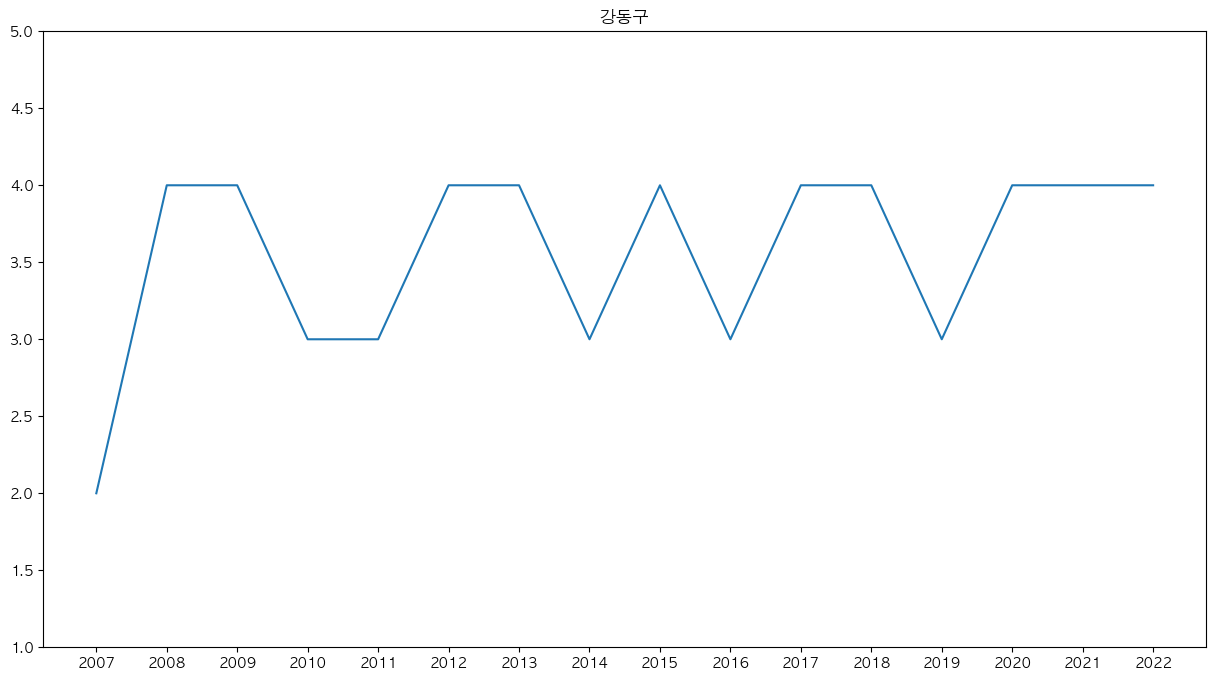

In [45]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
values = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
          2017, 2018, 2019, 2020, 2021, 2022]

plt.figure(figsize=(15, 8))
plt.ylim([1,5])
plt.xticks(x, values)
plt.plot(Quality)
plt.title("강동구")

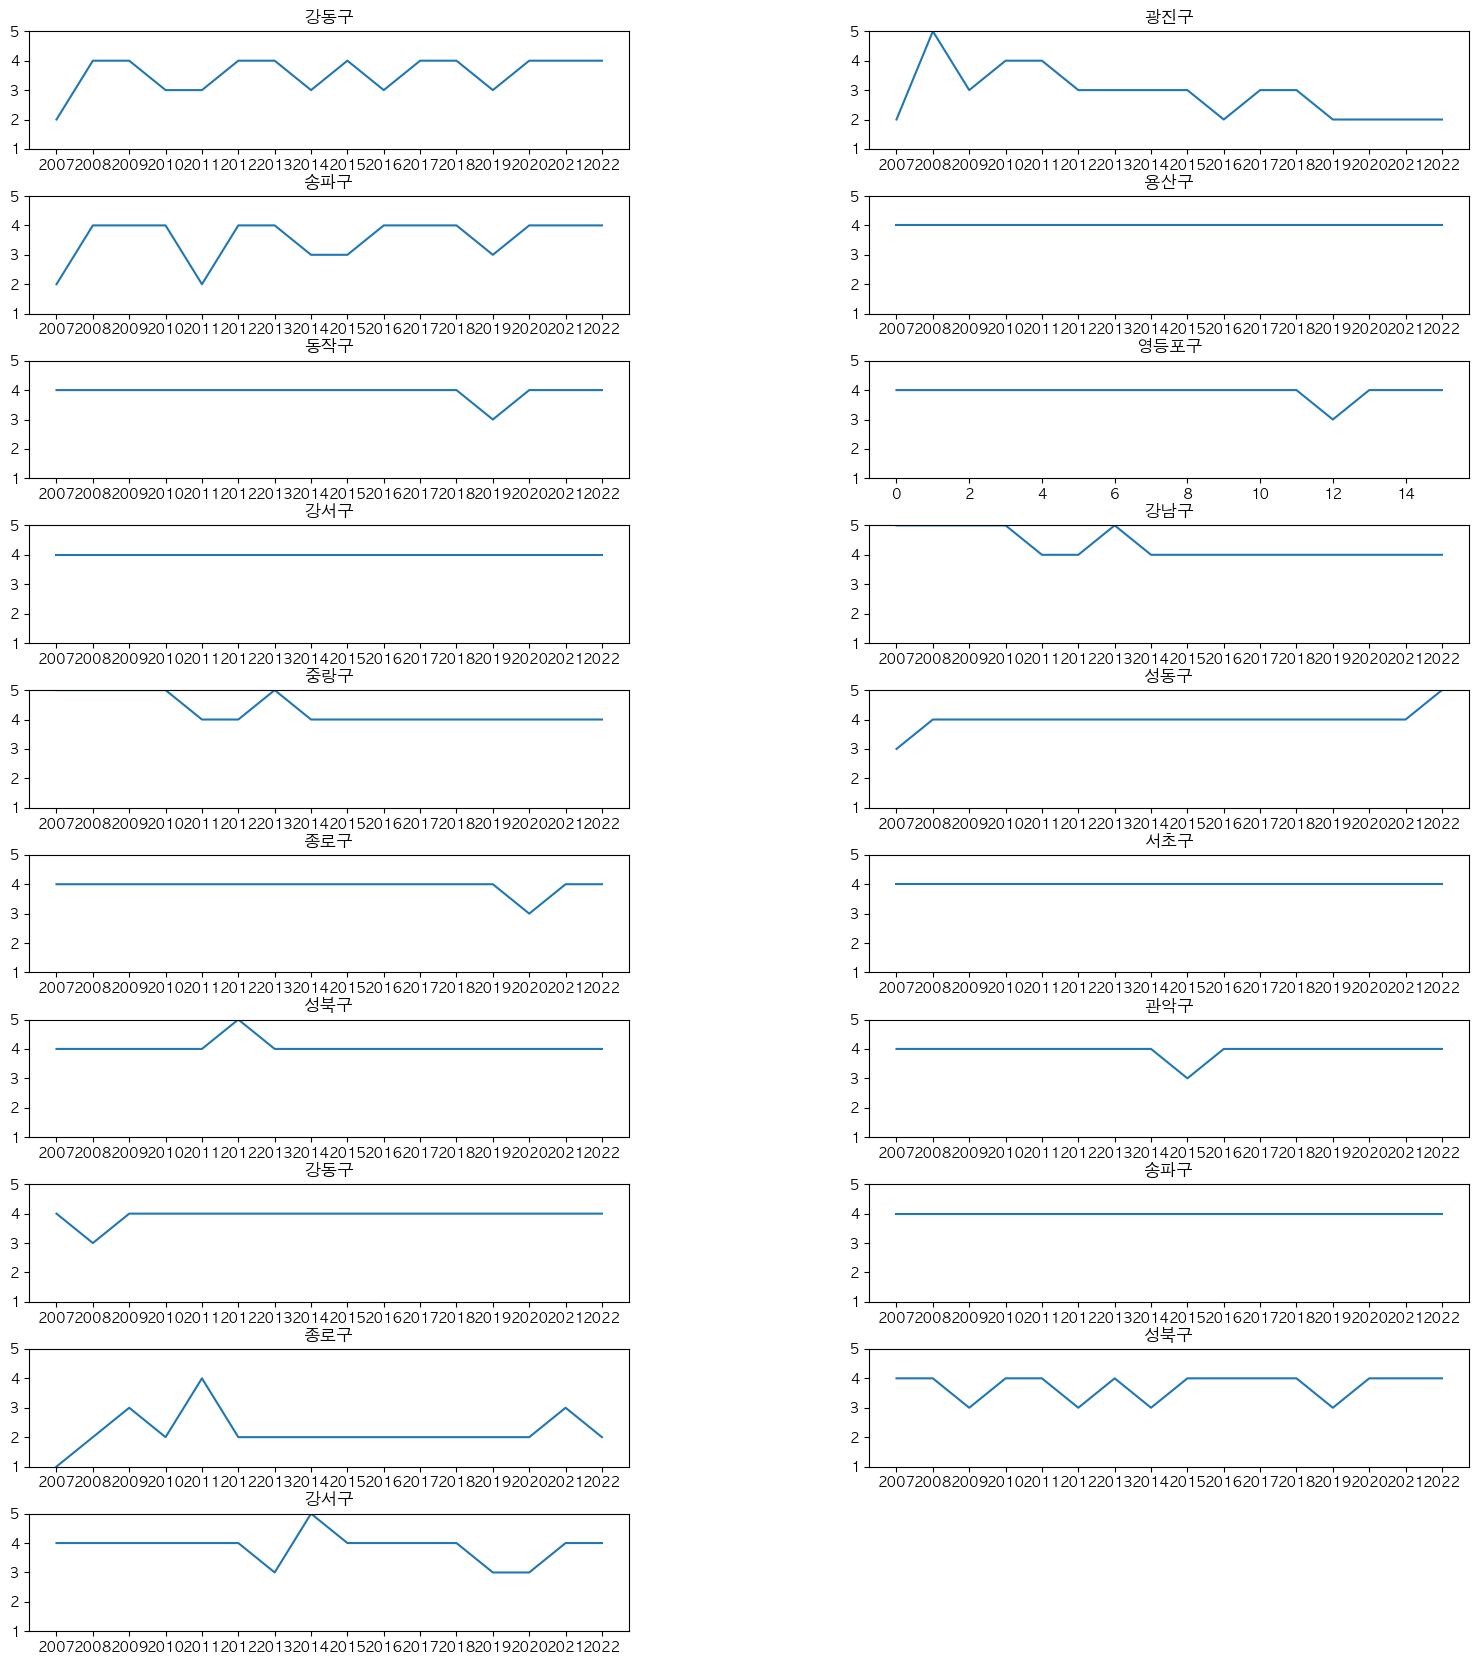

In [46]:
# 그래프 출력
# y축 : 1 ~ 5
# x축 : 2007 ~ 2022
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
values = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
          2017, 2018, 2019, 2020, 2021, 2022]

plt.figure(figsize=(18, 20))
plt.subplot(10, 2, 1) # 그래프 위치 지정
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4) # 그래프간 간격 조절
plt.ylim([1,5]) # y축 설정
plt.xticks(x, values) # x축 설정
plt.plot(Quality)
plt.title("강동구")

plt.subplot(10, 2, 2)
plt.ylim([1,5])
plt.xticks(x, values)
plt.plot(Quality1)
plt.title("광진구")

plt.subplot(10, 2, 3)
plt.ylim([1,5])
plt.xticks(x, values)
plt.plot(Quality2)
plt.title("송파구")

plt.subplot(10, 2, 4)
plt.ylim([1,5])
plt.xticks(x, values)
plt.plot(Quality3)
plt.title("용산구")

plt.subplot(10, 2, 5)
plt.ylim([1,5])
plt.xticks(x, values)
plt.plot(Quality4)
plt.title("동작구")

plt.subplot(10, 2, 6)
plt.ylim([1,5])
plt.plot(Quality5)
plt.title("영등포구")

plt.subplot(10, 2, 7)
plt.ylim([1,5])
plt.xticks(x, values)
plt.plot(Quality6)
plt.title("강서구")

plt.subplot(10, 2, 8)
plt.ylim([1,5])
plt.xticks(x, values)
plt.plot(Quality7)
plt.title("강남구")

plt.subplot(10, 2, 9)
plt.ylim([1,5])
plt.xticks(x, values)
plt.plot(Quality8)
plt.title("중랑구")

plt.subplot(10, 2, 10)
plt.ylim([1,5])
plt.xticks(x, values)
plt.plot(Quality9)
plt.title("성동구")

plt.subplot(10, 2, 11)
plt.ylim([1,5])
plt.xticks(x, values)
plt.plot(Quality10)
plt.title("종로구")

plt.subplot(10, 2, 12)
plt.ylim([1,5])
plt.xticks(x, values)
plt.plot(Quality11)
plt.title("서초구")

plt.subplot(10, 2, 13)
plt.ylim([1,5])
plt.xticks(x, values)
plt.plot(Quality12)
plt.title("성북구")

plt.subplot(10, 2, 14)
plt.ylim([1,5])
plt.xticks(x, values)
plt.plot(Quality13)
plt.title("관악구")

plt.subplot(10, 2, 15)
plt.ylim([1,5])
plt.xticks(x, values)
plt.plot(Quality14)
plt.title("강동구")

plt.subplot(10, 2, 16)
plt.ylim([1,5])
plt.xticks(x, values)
plt.plot(Quality15)
plt.title("송파구")

plt.subplot(10, 2, 17)
plt.ylim([1,5])
plt.xticks(x, values)
plt.plot(Quality16)
plt.title("종로구")

plt.subplot(10, 2, 18)
plt.ylim([1,5])
plt.xticks(x, values)
plt.plot(Quality17)
plt.title("성북구")

plt.subplot(10, 2, 19)
plt.ylim([1,5])
plt.xticks(x, values)
plt.plot(Quality18)
plt.title("강서구")

plt.show()

## 영등포구 수질 개선

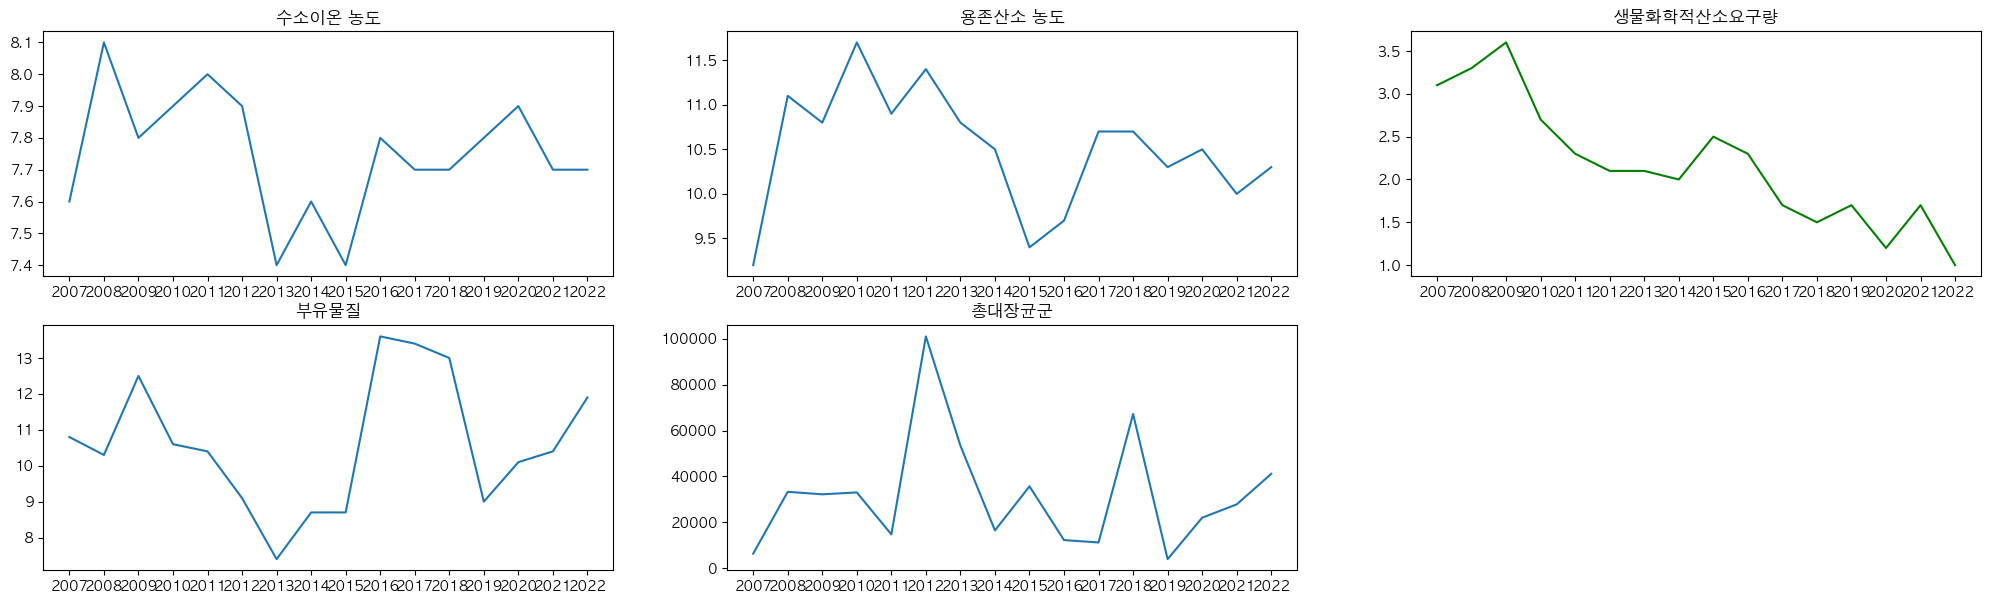

In [47]:
# 영등포구 그래프 출력
# 영등포구 연도별 데이터 추출
H = []
H.append(Water2007.loc[5, "수소이온농도"])
H.append(Water2008.loc[25, "수소이온농도"])
H.append(Water2009.loc[45, "수소이온농도"])
H.append(Water2010.loc[65, "수소이온농도"])
H.append(Water2011.loc[85, "수소이온농도"])
H.append(Water2012.loc[105, "수소이온농도"])
H.append(Water2013.loc[125, "수소이온농도"])
H.append(Water2014.loc[145, "수소이온농도"])
H.append(Water2015.loc[165, "수소이온농도"])
H.append(Water2016.loc[185, "수소이온농도"])
H.append(Water2017.loc[205, "수소이온농도"])
H.append(Water2018.loc[225, "수소이온농도"])
H.append(Water2019.loc[245, "수소이온농도"])
H.append(Water2020.loc[265, "수소이온농도"])
H.append(Water2021.loc[285, "수소이온농도"])
H.append(Water2022.loc[305, "수소이온농도"])

DO = []
DO.append(Water2007.loc[5, "용존산소 DO"])
DO.append(Water2008.loc[25, "용존산소 DO"])
DO.append(Water2009.loc[45, "용존산소 DO"])
DO.append(Water2010.loc[65, "용존산소 DO"])
DO.append(Water2011.loc[85, "용존산소 DO"])
DO.append(Water2012.loc[105, "용존산소 DO"])
DO.append(Water2013.loc[125, "용존산소 DO"])
DO.append(Water2014.loc[145, "용존산소 DO"])
DO.append(Water2015.loc[165, "용존산소 DO"])
DO.append(Water2016.loc[185, "용존산소 DO"])
DO.append(Water2017.loc[205, "용존산소 DO"])
DO.append(Water2018.loc[225, "용존산소 DO"])
DO.append(Water2019.loc[245, "용존산소 DO"])
DO.append(Water2020.loc[265, "용존산소 DO"])
DO.append(Water2021.loc[285, "용존산소 DO"])
DO.append(Water2022.loc[305, "용존산소 DO"])

BOD = []
BOD.append(Water2007.loc[5, "생물화학적산소요구량"])
BOD.append(Water2008.loc[25, "생물화학적산소요구량"])
BOD.append(Water2009.loc[45, "생물화학적산소요구량"])
BOD.append(Water2010.loc[65, "생물화학적산소요구량"])
BOD.append(Water2011.loc[85, "생물화학적산소요구량"])
BOD.append(Water2012.loc[105, "생물화학적산소요구량"])
BOD.append(Water2013.loc[125, "생물화학적산소요구량"])
BOD.append(Water2014.loc[145, "생물화학적산소요구량"])
BOD.append(Water2015.loc[165, "생물화학적산소요구량"])
BOD.append(Water2016.loc[185, "생물화학적산소요구량"])
BOD.append(Water2017.loc[205, "생물화학적산소요구량"])
BOD.append(Water2018.loc[225, "생물화학적산소요구량"])
BOD.append(Water2019.loc[245, "생물화학적산소요구량"])
BOD.append(Water2020.loc[265, "생물화학적산소요구량"])
BOD.append(Water2021.loc[285, "생물화학적산소요구량"])
BOD.append(Water2022.loc[305, "생물화학적산소요구량"])

SS = []
SS.append(Water2007.loc[5, "부유물질"])
SS.append(Water2008.loc[25, "부유물질"])
SS.append(Water2009.loc[45, "부유물질"])
SS.append(Water2010.loc[65, "부유물질"])
SS.append(Water2011.loc[85, "부유물질"])
SS.append(Water2012.loc[105, "부유물질"])
SS.append(Water2013.loc[125, "부유물질"])
SS.append(Water2014.loc[145, "부유물질"])
SS.append(Water2015.loc[165, "부유물질"])
SS.append(Water2016.loc[185, "부유물질"])
SS.append(Water2017.loc[205, "부유물질"])
SS.append(Water2018.loc[225, "부유물질"])
SS.append(Water2019.loc[245, "부유물질"])
SS.append(Water2020.loc[265, "부유물질"])
SS.append(Water2021.loc[285, "부유물질"])
SS.append(Water2022.loc[305, "부유물질"])

Coliform = []
Coliform.append(Water2007.loc[5, "총대장균군"])
Coliform.append(Water2008.loc[25, "총대장균군"])
Coliform.append(Water2009.loc[45, "총대장균군"])
Coliform.append(Water2010.loc[65, "총대장균군"])
Coliform.append(Water2011.loc[85, "총대장균군"])
Coliform.append(Water2012.loc[105, "총대장균군"])
Coliform.append(Water2013.loc[125, "총대장균군"])
Coliform.append(Water2014.loc[145, "총대장균군"])
Coliform.append(Water2015.loc[165, "총대장균군"])
Coliform.append(Water2016.loc[185, "총대장균군"])
Coliform.append(Water2017.loc[205, "총대장균군"])
Coliform.append(Water2018.loc[225, "총대장균군"])
Coliform.append(Water2019.loc[245, "총대장균군"])
Coliform.append(Water2020.loc[265, "총대장균군"])
Coliform.append(Water2021.loc[285, "총대장균군"])
Coliform.append(Water2022.loc[305, "총대장균군"])

# y축 : 1 ~ 5
# x축 : 2007 ~ 2022
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
values = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
          2017, 2018, 2019, 2020, 2021, 2022]

plt.figure(figsize=(25, 7))
plt.subplot(2, 3, 1)
plt.xticks(x, values) # x축 설정
plt.title("수소이온 농도")
plt.plot(H)

plt.subplot(2, 3, 2)
plt.plot(DO)
plt.xticks(x, values) # x축 설정
plt.title("용존산소 농도")

plt.subplot(2, 3, 3)
plt.plot(BOD, 'g')
plt.xticks(x, values) # x축 설정
plt.title("생물화학적산소요구량")

plt.subplot(2, 3, 4)
plt.plot(SS)
plt.xticks(x, values) # x축 설정
plt.title("부유물질")

plt.subplot(2, 3, 5)
plt.plot(Coliform)
plt.xticks(x, values) # x축 설정
plt.title("총대장균군")

plt.show()

In [48]:
BOD

[3.1, 3.3, 3.6, 2.7, 2.3, 2.1, 2.1, 2, 2.5, 2.3, 1.7, 1.5, 1.7, 1.2, 1.7, 1]

Text(0.5, 1.0, '영등포구 생물화학적산소요구량')

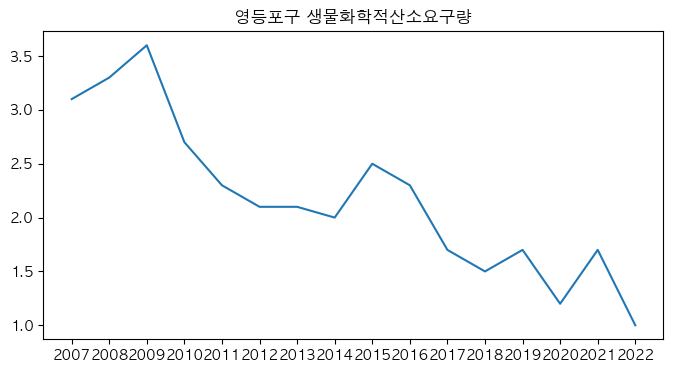

In [49]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
values = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
          2017, 2018, 2019, 2020, 2021, 2022]

plt.figure(figsize=(8, 4))
plt.plot(BOD)
plt.xticks(x, values) # x축 설정
plt.title("영등포구 생물화학적산소요구량")

Text(0.5, 1.0, '영등포구 수질')

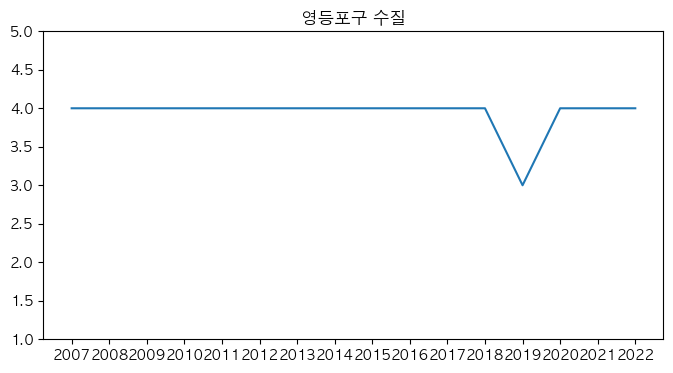

In [50]:
# y축 : 1 ~ 5
# x축 : 2007 ~ 2022
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
values = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
          2017, 2018, 2019, 2020, 2021, 2022]

plt.figure(figsize=(8, 4))
plt.ylim([1,5]) # y축 설정
plt.xticks(x, values) # x축 설정
plt.plot(Quality5)
plt.title("영등포구 수질")

## 데이터 시각화 
1. 각 구에 대한 수질등급과 폐수에 대한 그래프
2. 전지역에 대한 통합적인 평균 그래프

**1.  각 구에 대한 수질등급과 폐수에 대한 그래프**

In [51]:
# 지역에 맞는 폐수 소계 데이터 추출

WasteWater=np.array(wwdata2.iloc[:,2].loc[wwdata2['지역'] == '강동구'])

WasteWater1=np.array(wwdata2.iloc[:,2].loc[wwdata2['지역'] == '광진구'])

WasteWater2=np.array(wwdata2.iloc[:,2].loc[wwdata2['지역'] == '송파구'])

WasteWater3=np.array(wwdata2.iloc[:,2].loc[wwdata2['지역'] == '용산구'])

WasteWater4=np.array(wwdata2.iloc[:,2].loc[wwdata2['지역'] == '동작구'])

WasteWater5=np.array(wwdata2.iloc[:,2].loc[wwdata2['지역'] == '영등포구'])

WasteWater6=np.array(wwdata2.iloc[:,2].loc[wwdata2['지역'] == '강서구'])

WasteWater7=np.array(wwdata2.iloc[:,2].loc[wwdata2['지역'] == '강남구'])

WasteWater8=np.array(wwdata2.iloc[:,2].loc[wwdata2['지역'] == '중랑구'])

WasteWater9=np.array(wwdata2.iloc[:,2].loc[wwdata2['지역'] == '성동구'])

WasteWater10=np.array(wwdata2.iloc[:,2].loc[wwdata2['지역'] == '종로구'])

WasteWater11=np.array(wwdata2.iloc[:,2].loc[wwdata2['지역'] == '서초구'])

WasteWater13=np.array(wwdata2.iloc[:,2].loc[wwdata2['지역'] == '관악구'])

WasteWater14=np.array(wwdata2.iloc[:,2].loc[wwdata2['지역'] == '강동구'])

WasteWater17=np.array(wwdata2.iloc[:,2].loc[wwdata2['지역'] == '성북구'])

In [52]:
# x축
values = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
          2017, 2018, 2019, 2020, 2021, 2022]

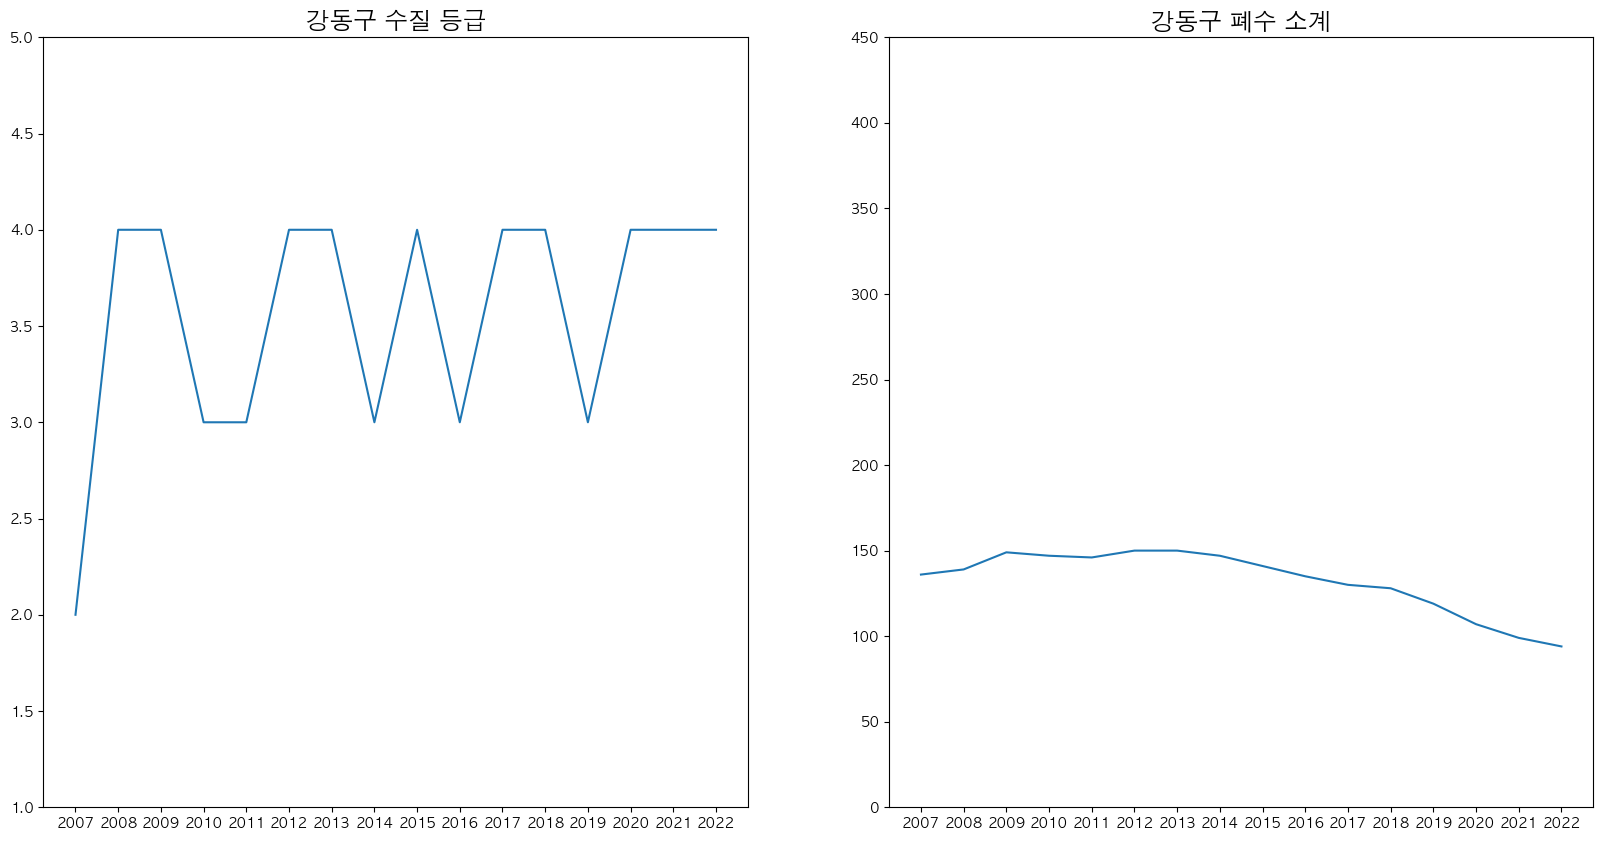

In [53]:
# 강동구
plt.figure(figsize=(20, 10)) 
plt.subplot(1, 2, 1) # 그래프 위치 지정
plt.ylim([1,5]) # y축 설정
plt.xticks(x, values) # x축 설정
plt.plot(Quality)
plt.title("강동구 수질 등급", fontsize= 17)

plt.subplot(1, 2, 2) 
plt.ylim([0,450])
plt.xticks(x, values)
plt.plot(WasteWater)
plt.title("강동구 폐수 소계", fontsize= 17)
plt.show()

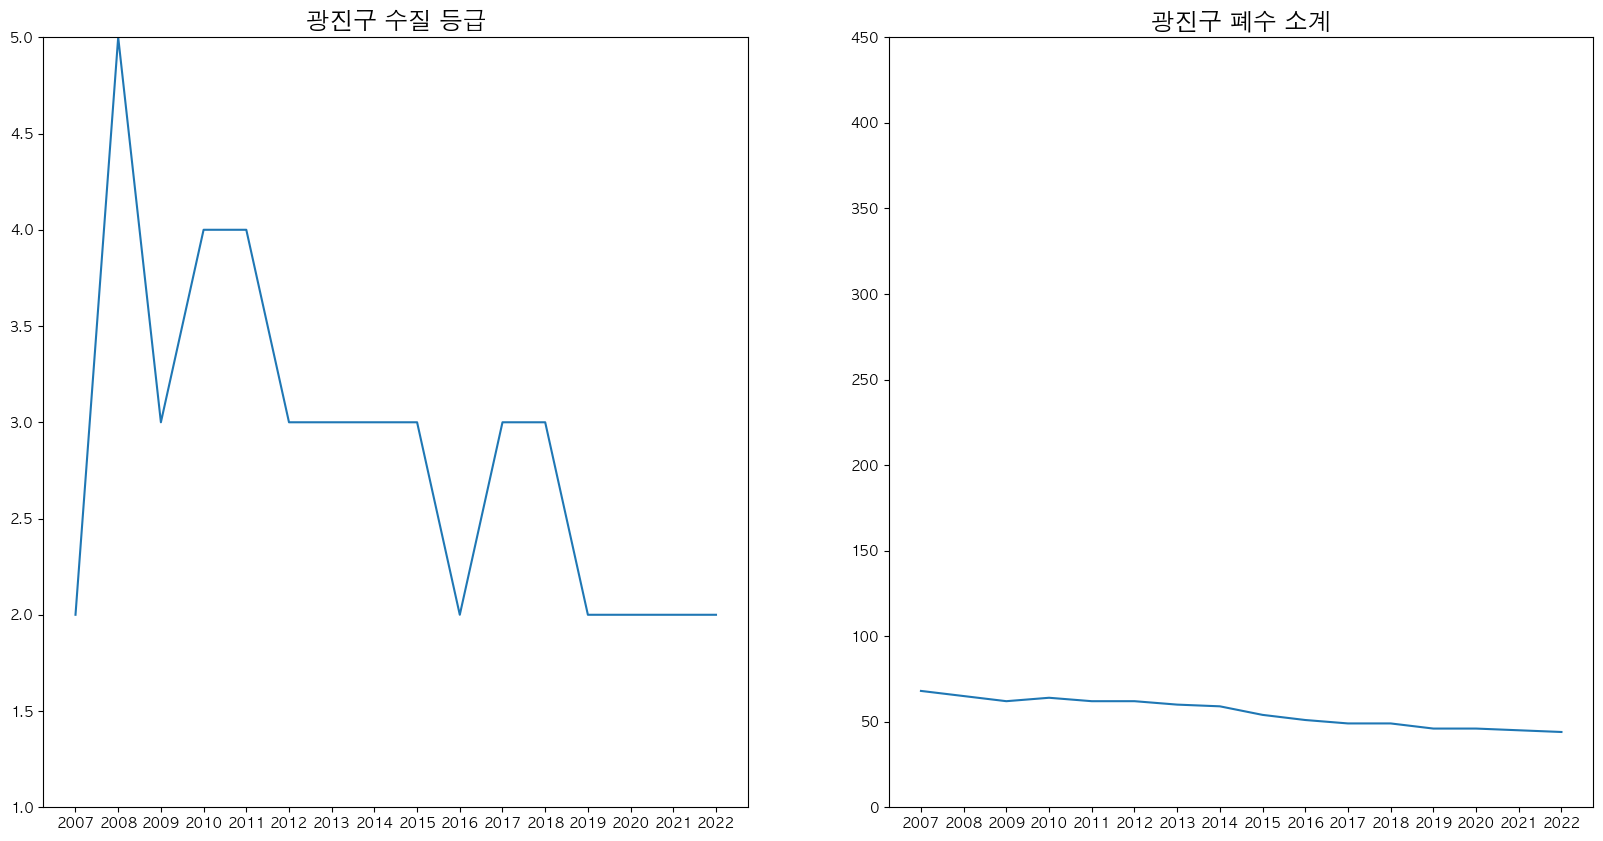

In [54]:
# 광진구
plt.figure(figsize=(20, 10)) 
plt.subplot(1, 2, 1) 
plt.ylim([1,5]) 
plt.xticks(x, values)
plt.plot(Quality1)
plt.title("광진구 수질 등급", fontsize= 17)

plt.subplot(1, 2, 2) 
plt.ylim([0,450])
plt.xticks(x, values)
plt.plot(WasteWater1)
plt.title("광진구 폐수 소계", fontsize= 17)
plt.show()

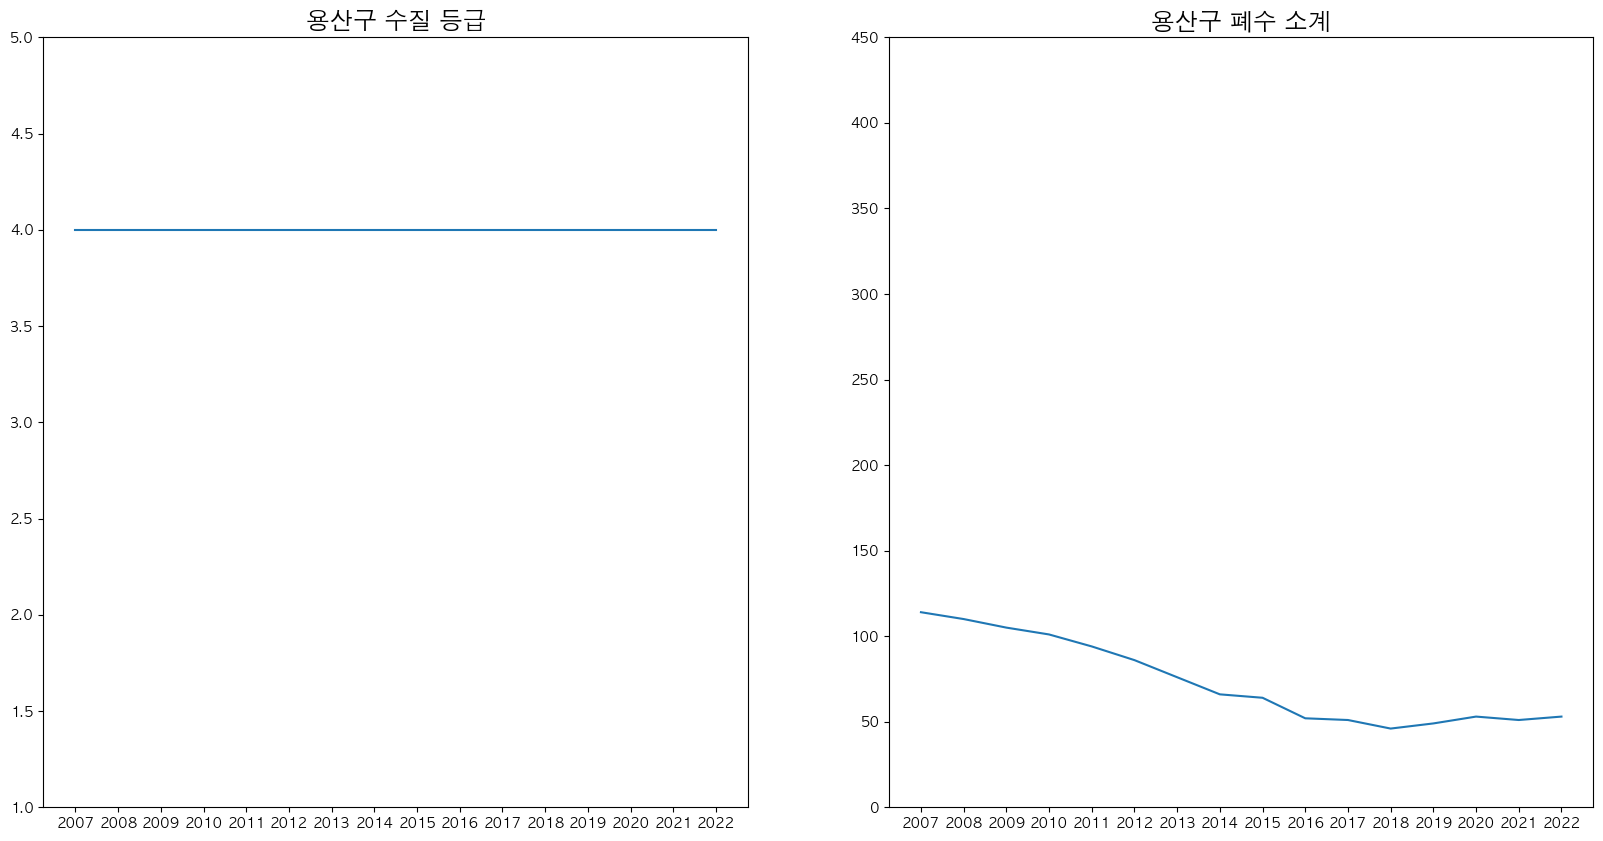

In [55]:
# 용산구
plt.figure(figsize=(20, 10)) 
plt.subplot(1, 2, 1) 
plt.ylim([1,5]) 
plt.xticks(x, values)
plt.plot(Quality3)
plt.title("용산구 수질 등급", fontsize= 17)

plt.subplot(1, 2, 2) 
plt.ylim([0,450])
plt.xticks(x, values)
plt.plot(WasteWater3)
plt.title("용산구 폐수 소계", fontsize= 17)
plt.show()

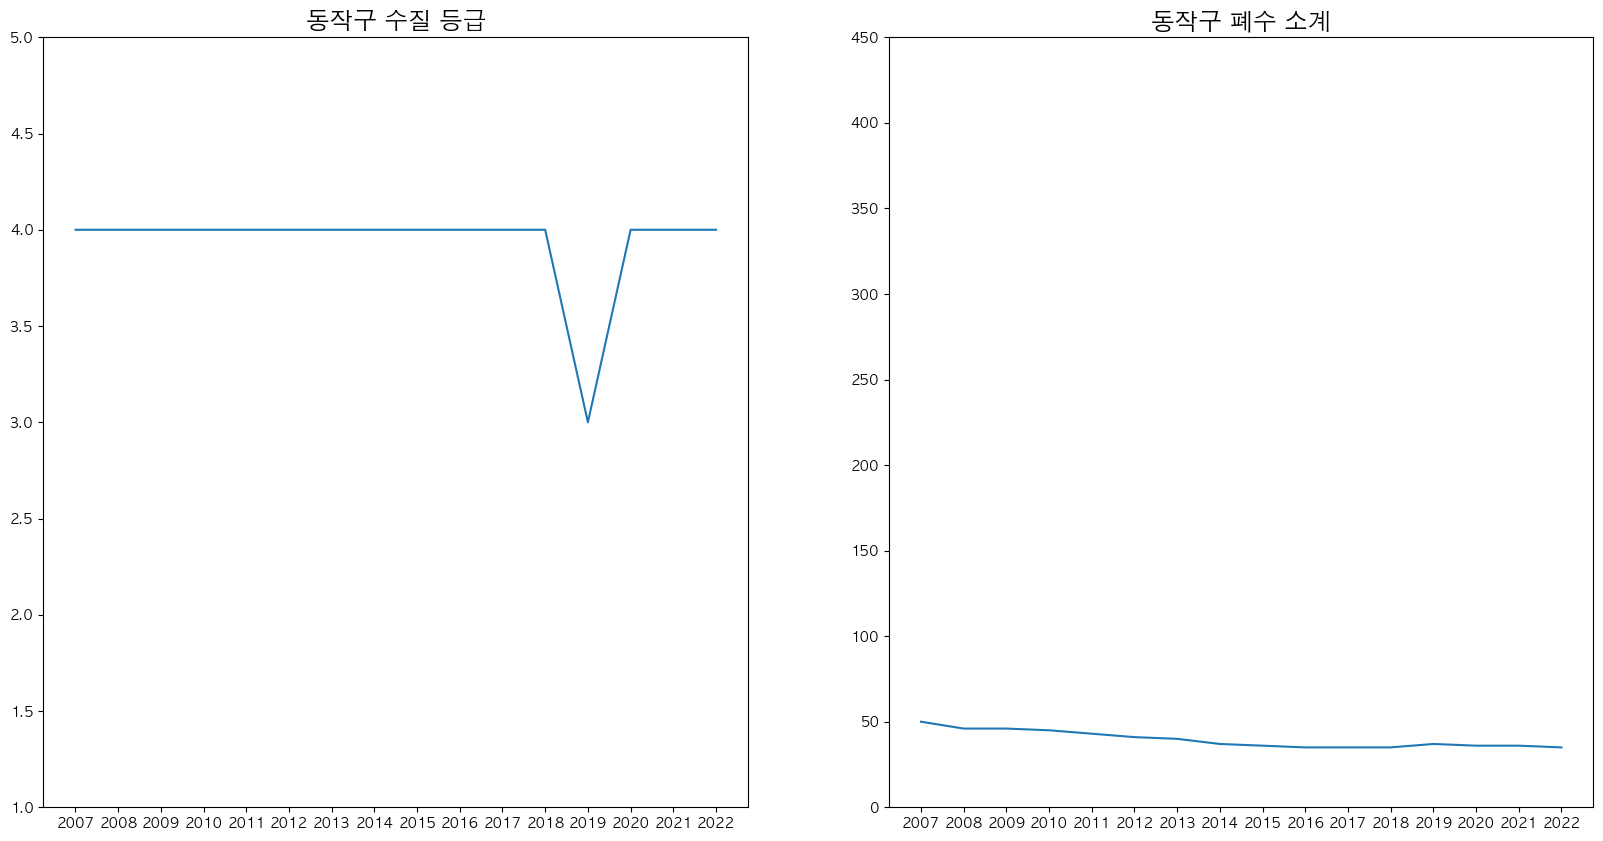

In [56]:
# 동작구
plt.figure(figsize=(20, 10)) 
plt.subplot(1, 2, 1) 
plt.ylim([1,5]) 
plt.xticks(x, values)
plt.plot(Quality4)
plt.title("동작구 수질 등급", fontsize= 17)

plt.subplot(1, 2, 2) 
plt.ylim([0,450])
plt.xticks(x, values)
plt.plot(WasteWater4)
plt.title("동작구 폐수 소계", fontsize= 17)
plt.show()

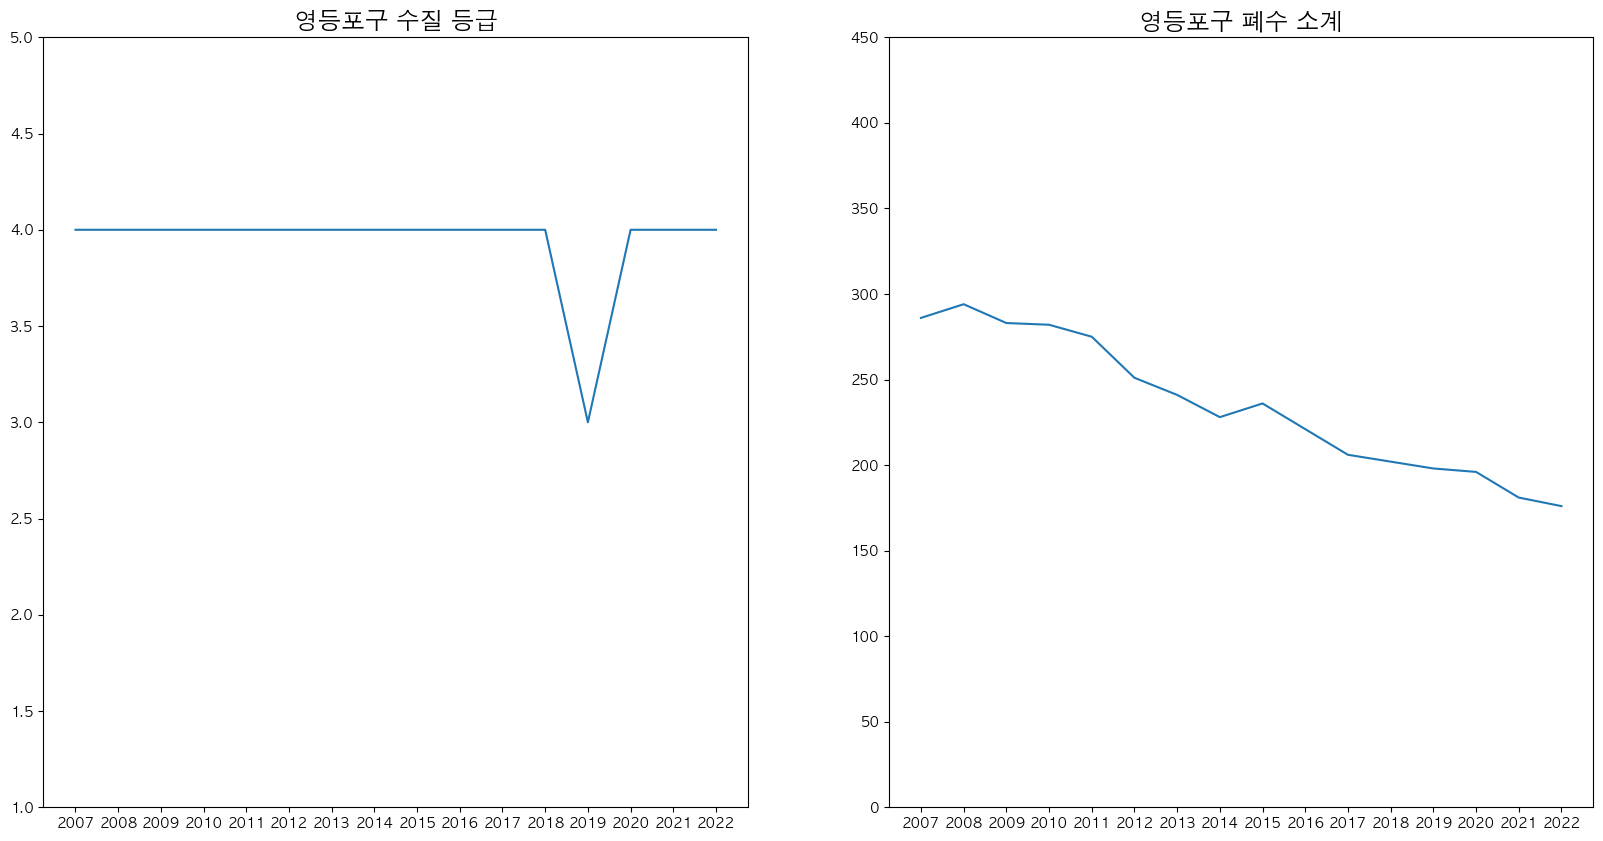

In [57]:
# 영등포구
plt.figure(figsize=(20, 10)) 
plt.subplot(1, 2, 1) 
plt.ylim([1,5]) 
plt.xticks(x, values)
plt.plot(Quality5)
plt.title("영등포구 수질 등급", fontsize= 17)

plt.subplot(1, 2, 2) 
plt.ylim([0,450])
plt.xticks(x, values)
plt.plot(WasteWater5)
plt.title("영등포구 폐수 소계", fontsize= 17)
plt.show()

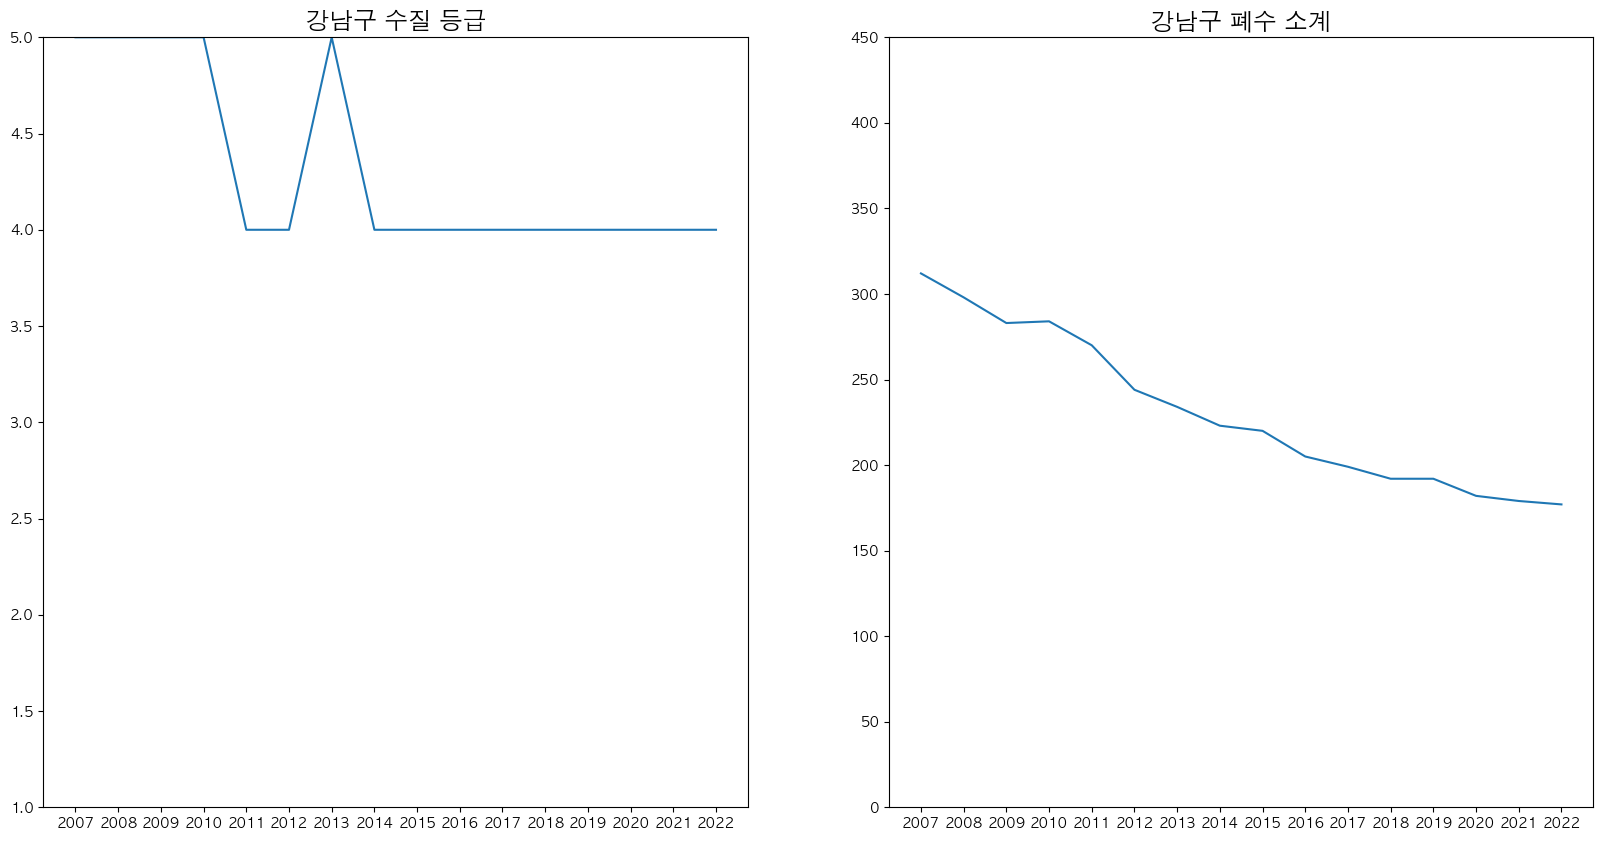

In [58]:
# 강남구
plt.figure(figsize=(20, 10)) 
plt.subplot(1, 2, 1) 
plt.ylim([1,5]) 
plt.xticks(x, values)
plt.plot(Quality7)
plt.title("강남구 수질 등급", fontsize= 17)

plt.subplot(1, 2, 2) 
plt.ylim([0,450])
plt.xticks(x, values)
plt.plot(WasteWater7)
plt.title("강남구 폐수 소계", fontsize= 17)
plt.show()

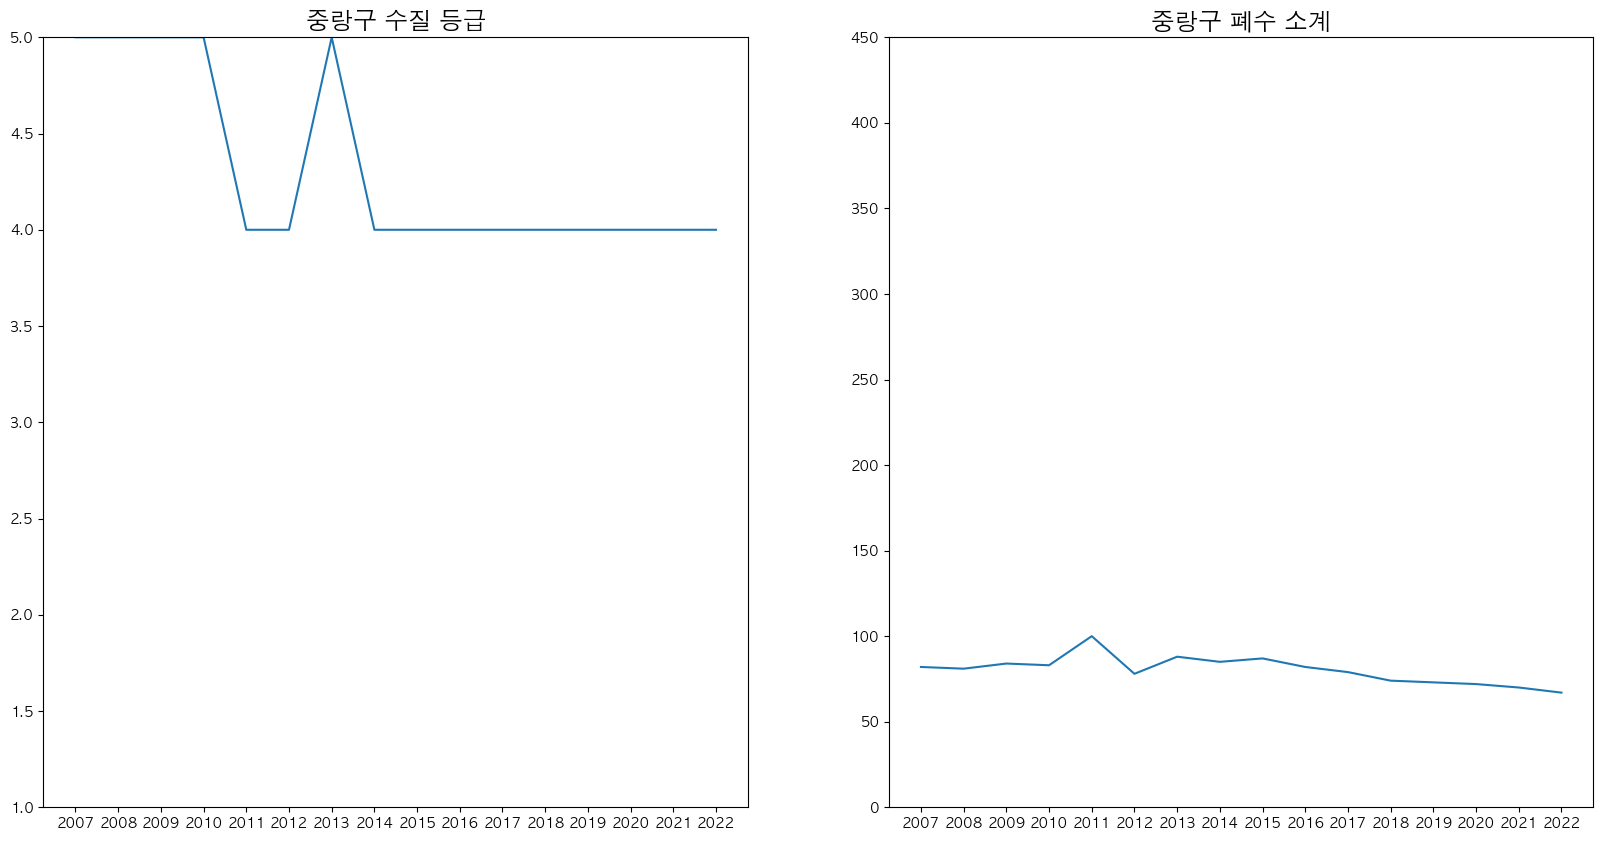

In [59]:
# 중랑구
plt.figure(figsize=(20, 10)) 
plt.subplot(1, 2, 1) 
plt.ylim([1,5]) 
plt.xticks(x, values)
plt.plot(Quality8)
plt.title("중랑구 수질 등급", fontsize= 17)

plt.subplot(1, 2, 2) 
plt.ylim([0,450])
plt.xticks(x, values)
plt.plot(WasteWater8)
plt.title("중랑구 폐수 소계", fontsize= 17)
plt.show()

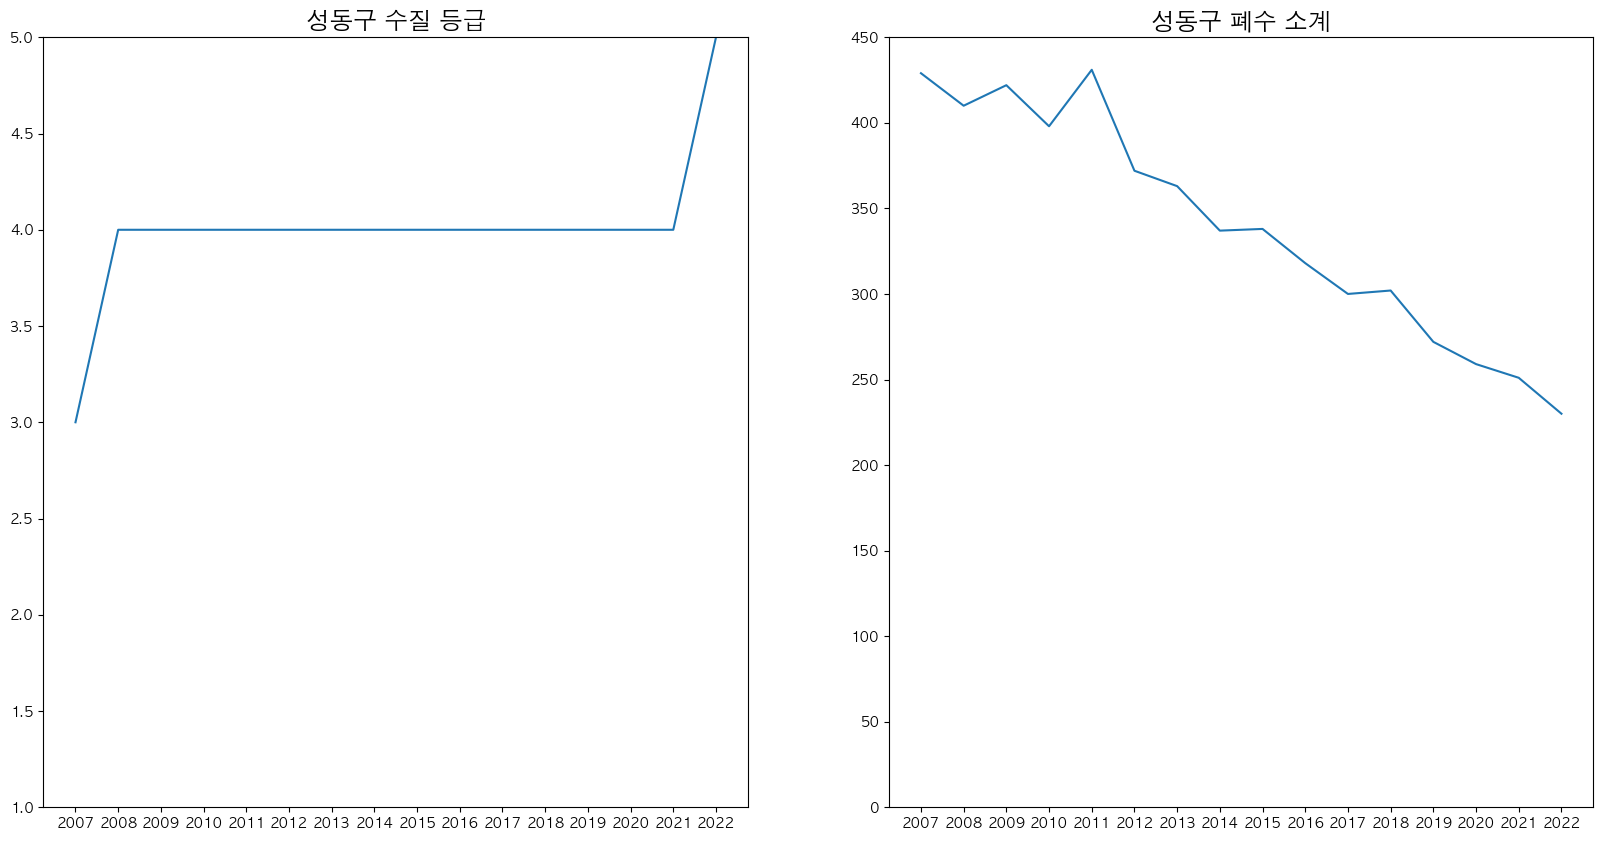

In [60]:
# 성동구
plt.figure(figsize=(20, 10)) 
plt.subplot(1, 2, 1) 
plt.ylim([1,5]) 
plt.xticks(x, values)
plt.plot(Quality9)
plt.title("성동구 수질 등급", fontsize= 17)

plt.subplot(1, 2, 2) 
plt.ylim([0,450])
plt.xticks(x, values)
plt.plot(WasteWater9)
plt.title("성동구 폐수 소계", fontsize= 17)
plt.show()

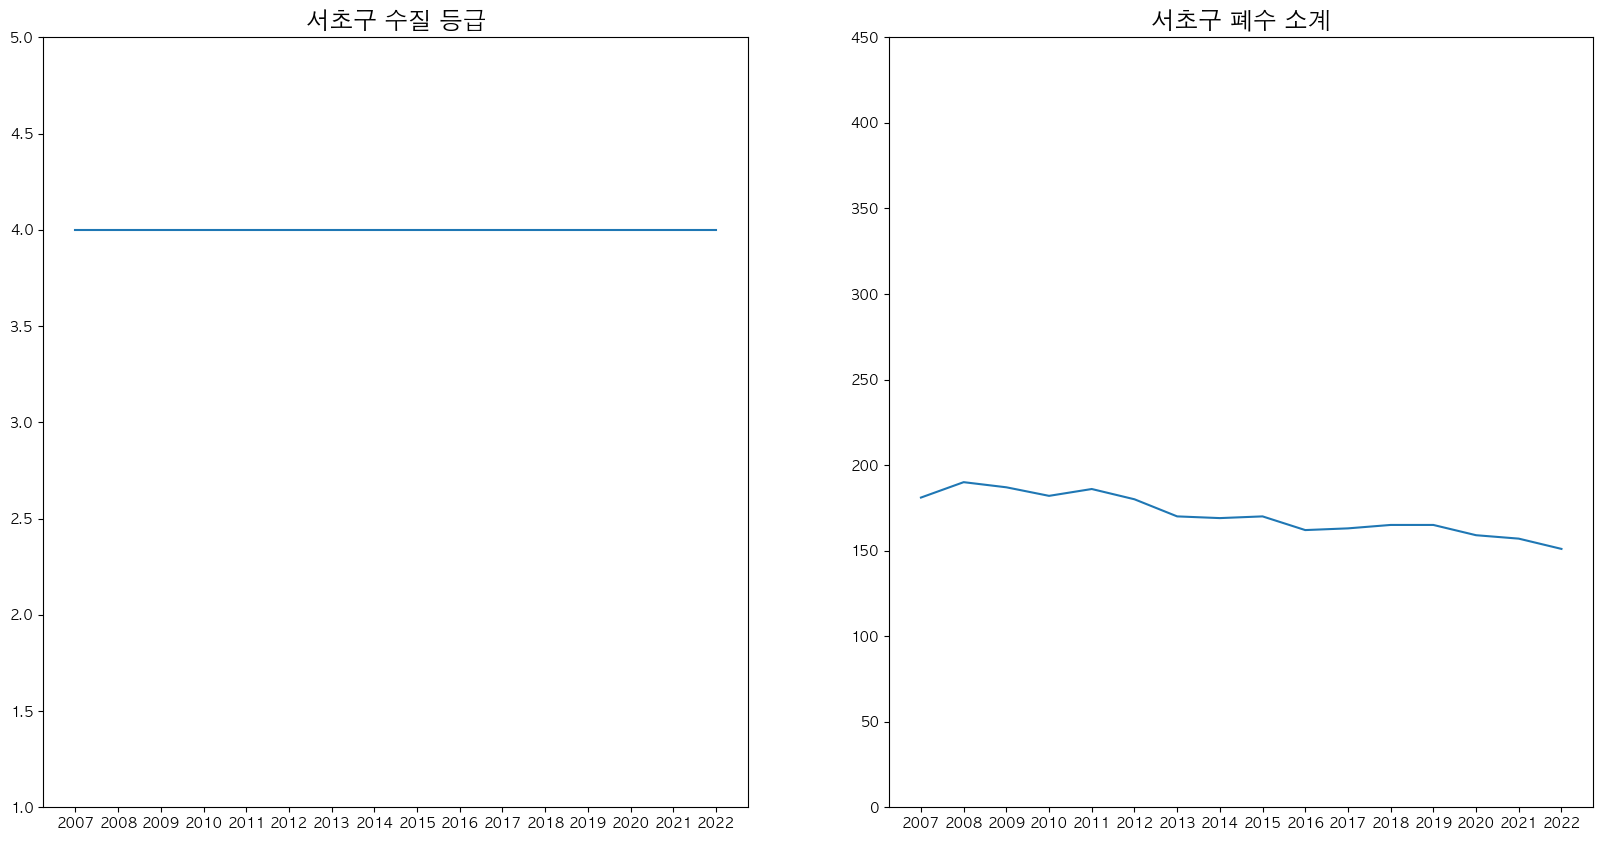

In [61]:
# 서초구
plt.figure(figsize=(20, 10)) 
plt.subplot(1, 2, 1) 
plt.ylim([1,5]) 
plt.xticks(x, values)
plt.plot(Quality11)
plt.title("서초구 수질 등급", fontsize= 17)

plt.subplot(1, 2, 2) 
plt.ylim([0,450])
plt.xticks(x, values)
plt.plot(WasteWater11)
plt.title("서초구 폐수 소계", fontsize= 17)
plt.show()

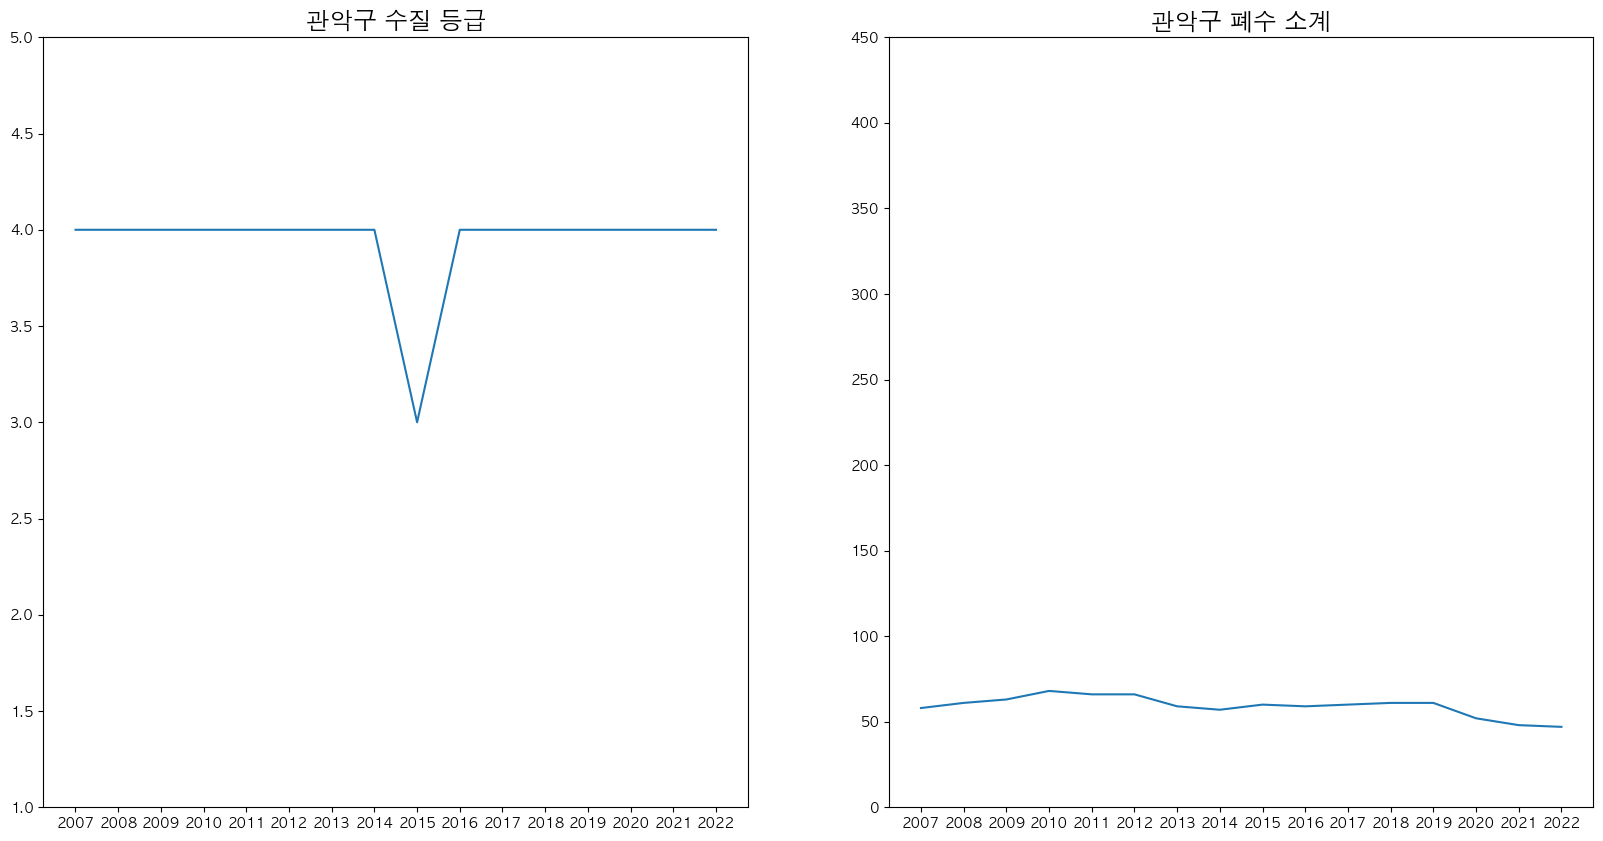

In [62]:
# 관악구
plt.figure(figsize=(20, 10)) 
plt.subplot(1, 2, 1) 
plt.ylim([1,5]) 
plt.xticks(x, values)
plt.plot(Quality13)
plt.title("관악구 수질 등급", fontsize= 17)

plt.subplot(1, 2, 2) 
plt.ylim([0,450])
plt.xticks(x, values)
plt.plot(WasteWater13)
plt.title("관악구 폐수 소계", fontsize= 17)
plt.show()

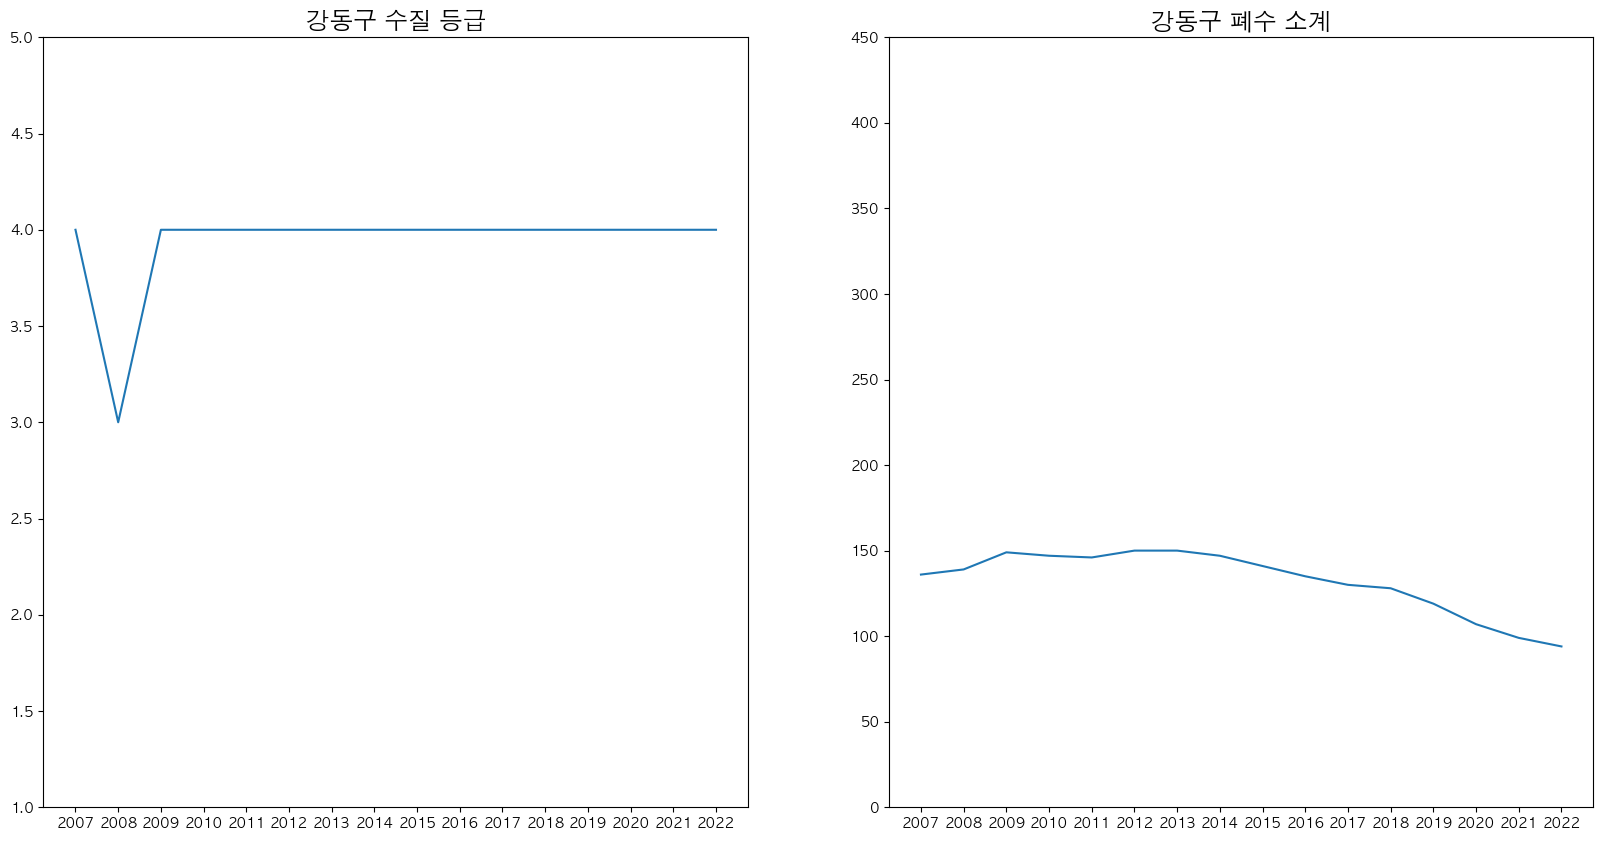

In [63]:
# 강동구
plt.figure(figsize=(20, 10)) 
plt.subplot(1, 2, 1) 
plt.ylim([1,5]) 
plt.xticks(x, values)
plt.plot(Quality14)
plt.title("강동구 수질 등급", fontsize= 17)

plt.subplot(1, 2, 2) 
plt.ylim([0,450])
plt.xticks(x, values)
plt.plot(WasteWater14)
plt.title("강동구 폐수 소계", fontsize= 17)
plt.show()

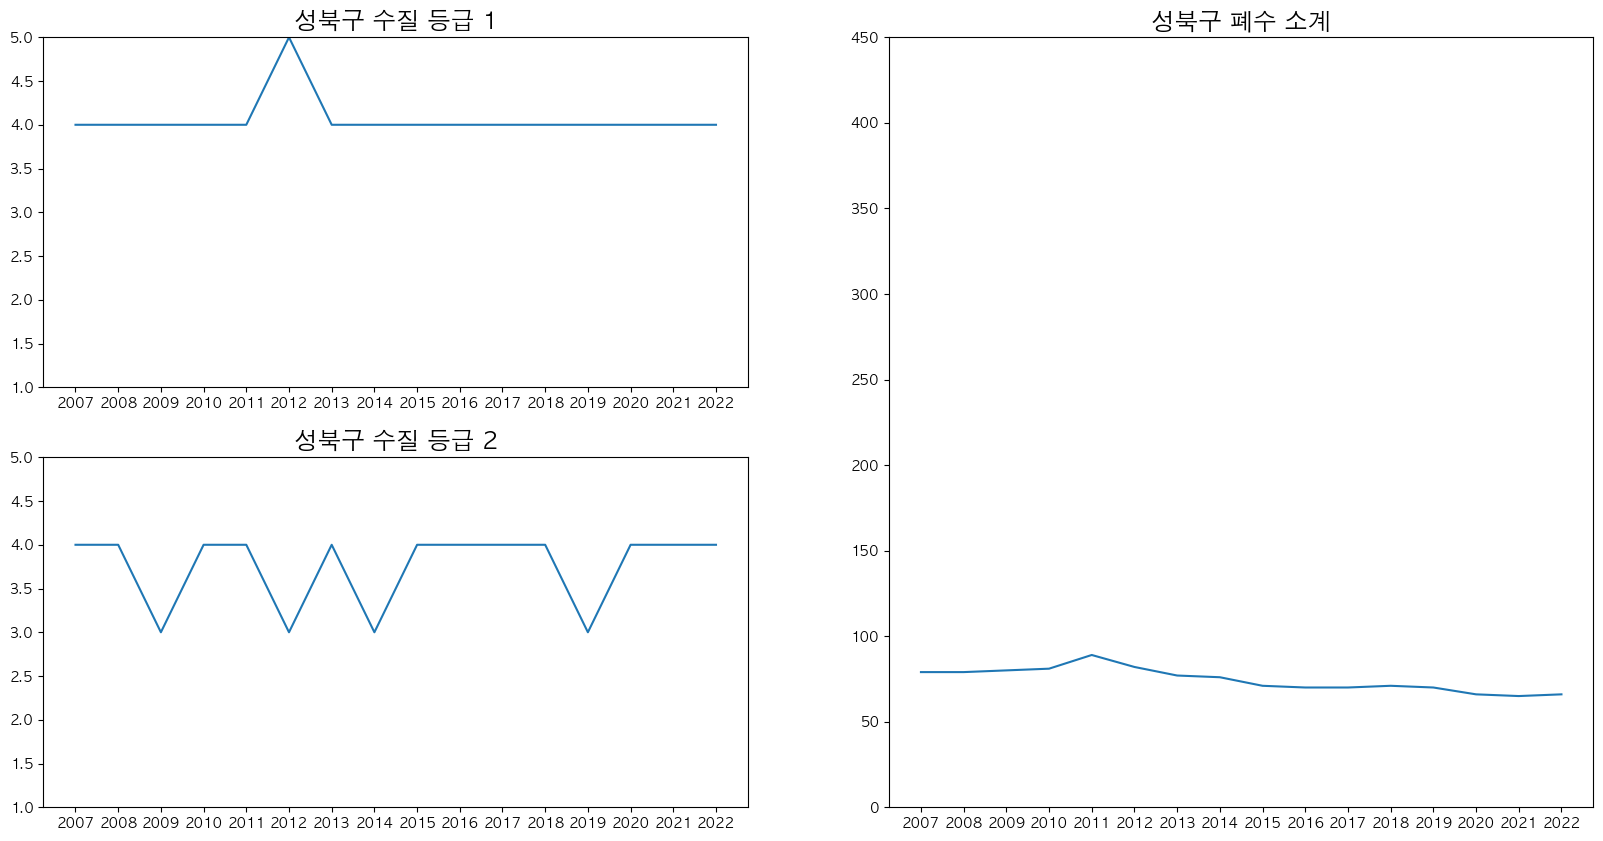

In [64]:
# 성북구
plt.figure(figsize=(20, 10)) 
plt.subplot(2, 2, 1) 
plt.ylim([1,5]) 
plt.xticks(x, values)
plt.plot(Quality12)
plt.title("성북구 수질 등급 1", fontsize= 17)

plt.subplot(2, 2, 3) 
plt.ylim([1,5]) 
plt.xticks(x, values)
plt.plot(Quality17)
plt.title("성북구 수질 등급 2", fontsize= 17)

plt.subplot(1, 2, 2) 
plt.ylim([0,450])
plt.xticks(x, values)
plt.plot(WasteWater17)
plt.title("성북구 폐수 소계", fontsize= 17)
plt.show()

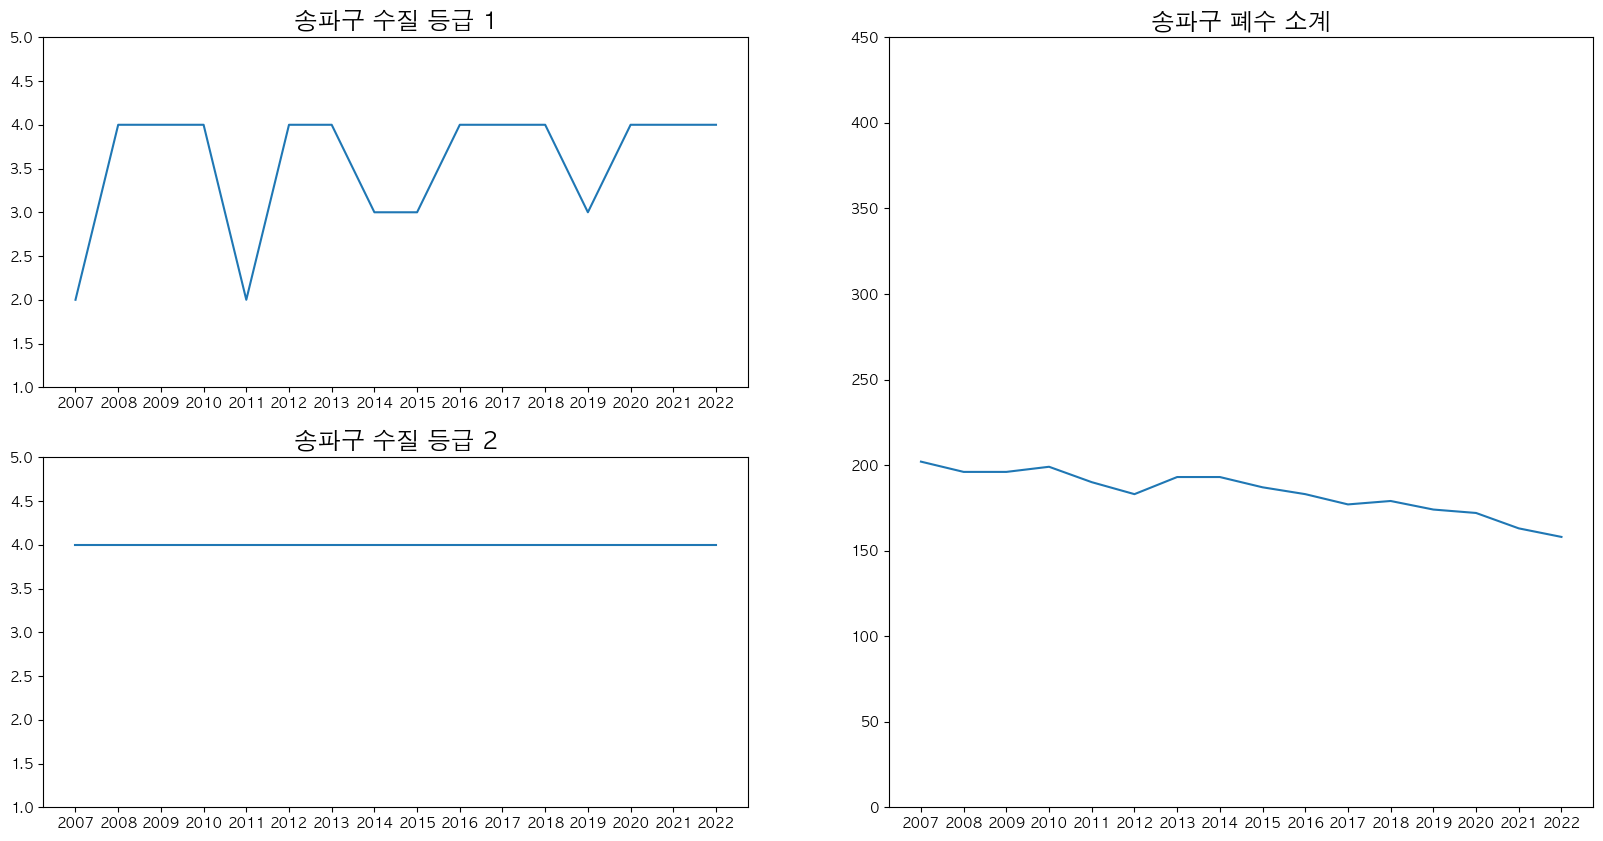

In [65]:
# 송파구
plt.figure(figsize=(20, 10)) 
plt.subplot(2, 2, 1) 
plt.ylim([1,5]) 
plt.xticks(x, values)
plt.plot(Quality2)
plt.title("송파구 수질 등급 1", fontsize= 17)

# 송파구
plt.subplot(2, 2, 3) 
plt.ylim([1,5]) 
plt.xticks(x, values)
plt.plot(Quality15)
plt.title("송파구 수질 등급 2", fontsize= 17)

plt.subplot(1, 2, 2) 
plt.ylim([0,450])
plt.xticks(x, values)
plt.plot(WasteWater2)
plt.title("송파구 폐수 소계", fontsize= 17)
plt.show()

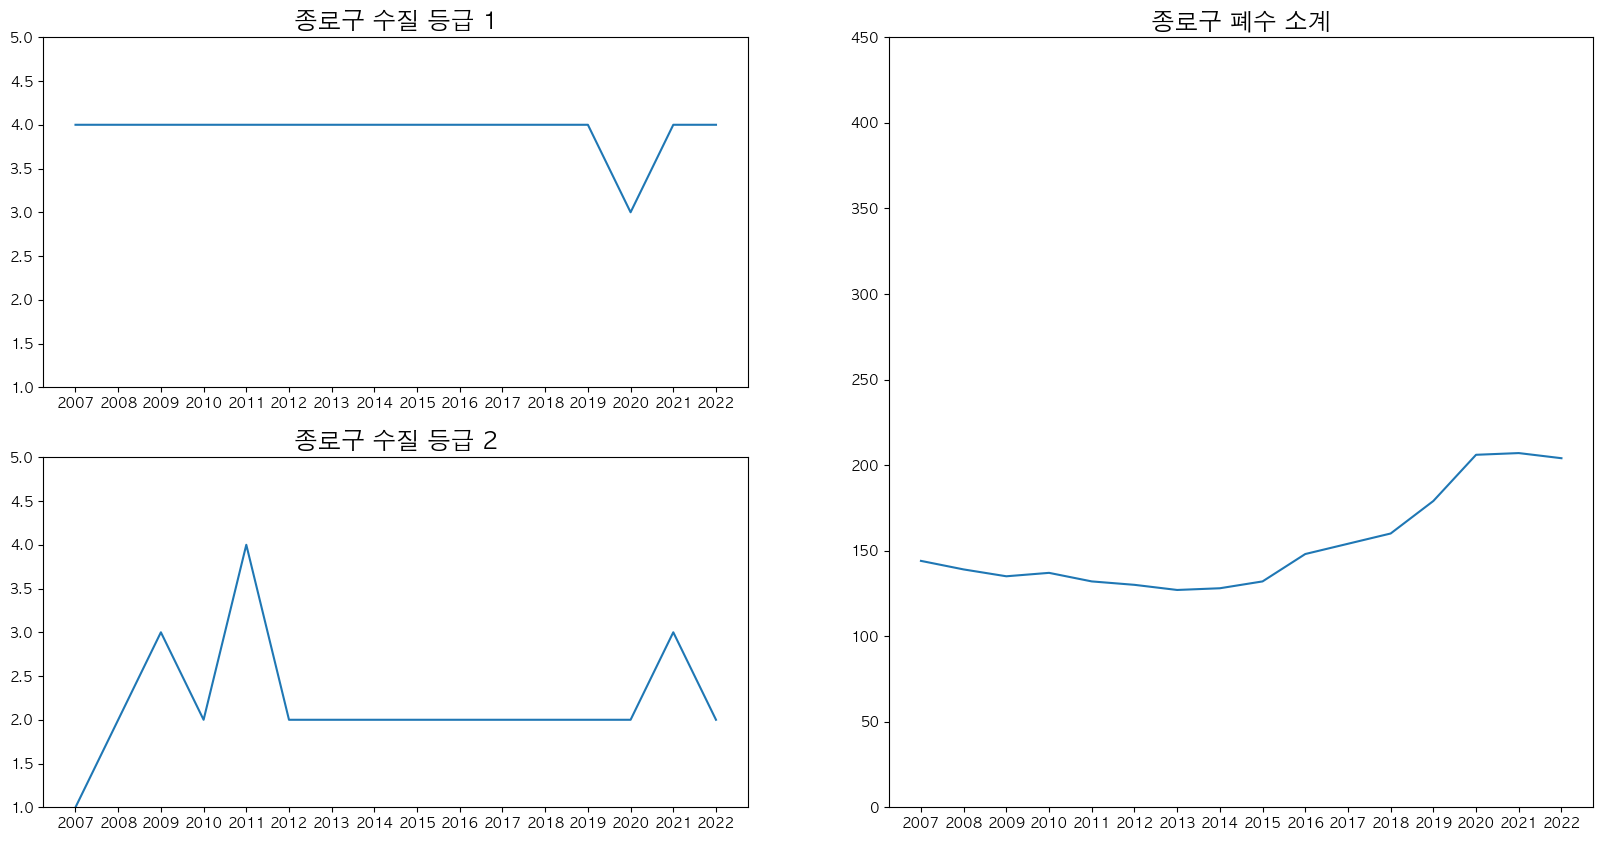

In [66]:
# 종로구 1, 2
plt.figure(figsize=(20, 10)) 
plt.subplot(2, 2, 1) 
plt.ylim([1,5]) 
plt.xticks(x, values)
plt.plot(Quality10)
plt.title("종로구 수질 등급 1", fontsize= 17)

plt.subplot(2, 2, 3) 
plt.ylim([1,5]) 
plt.xticks(x, values)
plt.plot(Quality16)
plt.title("종로구 수질 등급 2", fontsize= 17)

plt.subplot(1, 2, 2) 
plt.ylim([0,450])
plt.xticks(x, values)
plt.plot(WasteWater10)
plt.title("종로구 폐수 소계", fontsize= 17)
plt.show()

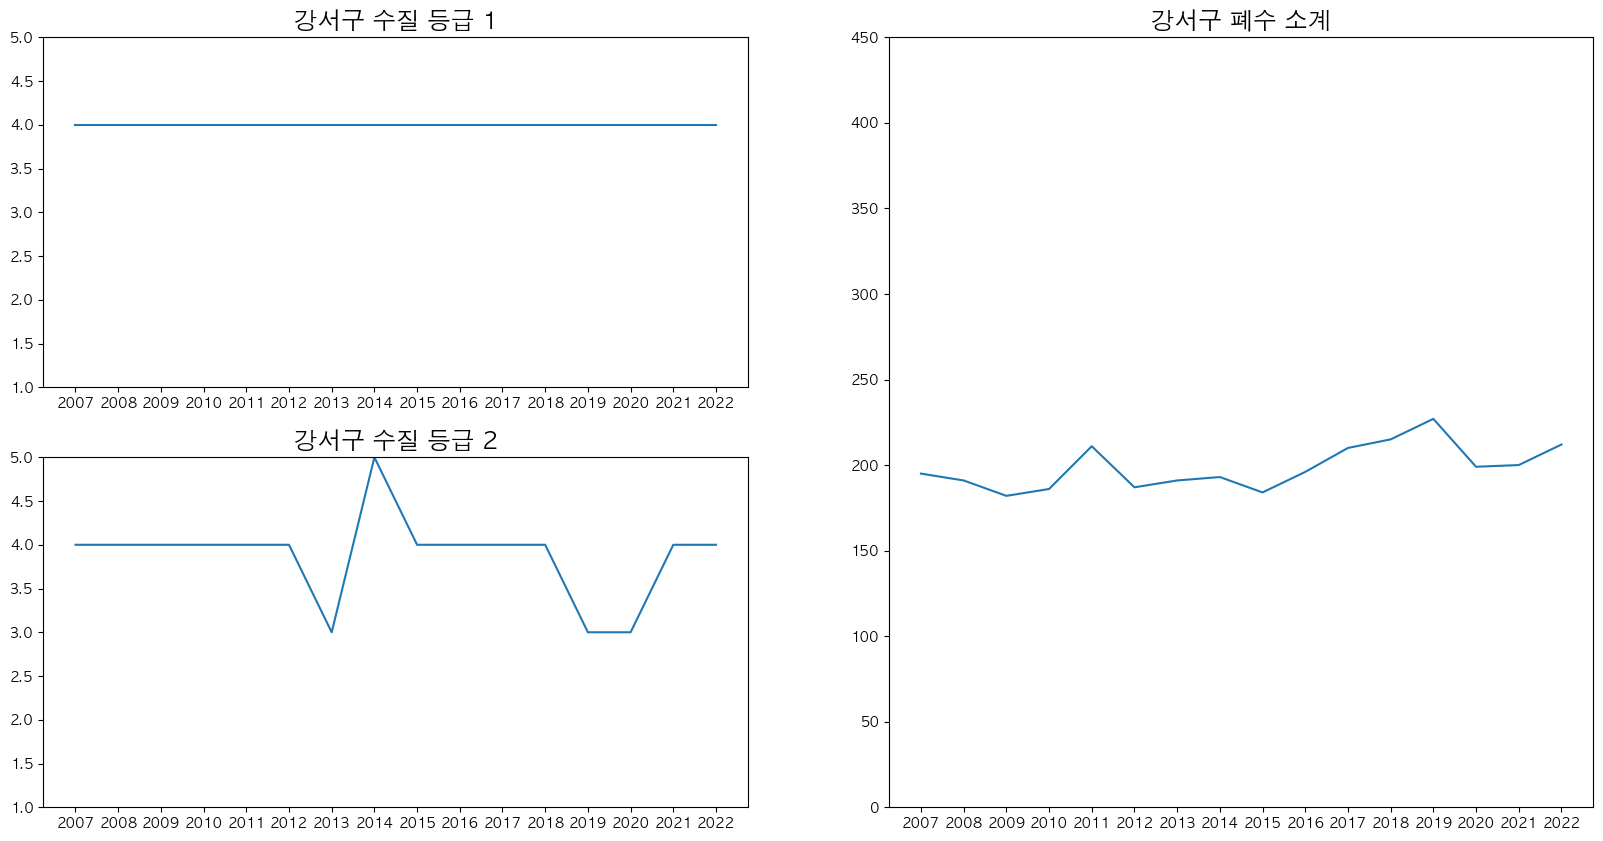

In [67]:
# 강서구 1, 2
plt.figure(figsize=(20, 10)) 
plt.subplot(2, 2, 1) 
plt.ylim([1,5]) 
plt.xticks(x, values)
plt.plot(Quality6)
plt.title("강서구 수질 등급 1", fontsize= 17)

plt.subplot(2, 2, 3) 
plt.ylim([1,5]) 
plt.xticks(x, values)
plt.plot(Quality18)
plt.title("강서구 수질 등급 2", fontsize= 17)

plt.subplot(1, 2, 2) 
plt.ylim([0,450])
plt.xticks(x, values)
plt.plot(WasteWater6)
plt.title("강서구 폐수 소계", fontsize= 17)
plt.show()

**2. 전지역에 대한 통합적인 평균 그래프**

In [70]:
total_Quality = np.array([Quality, Quality1, Quality2, Quality3, Quality4, Quality5, Quality6,
                       Quality7, Quality8, Quality9, Quality10, Quality11, Quality12, Quality13, 
                       Quality14, Quality15, Quality16, Quality17, Quality18])
total_WasteWater = np.array([WasteWater, WasteWater1, WasteWater2, WasteWater3, WasteWater4,WasteWater5, 
                             WasteWater6, WasteWater7, WasteWater8, WasteWater9,WasteWater10, WasteWater11,
                             WasteWater13, WasteWater14, WasteWater17])

In [71]:
# 전지역 평균 계산
qtymean = total_Quality.mean(axis=0)
wwmean = total_WasteWater.mean(axis=0)

In [72]:
# (데이터 확인용) 데이터프레임 생성 : 평균 데이터 + 시점
meandata = pd.DataFrame({"Quality":qtymean, "WasteWater":wwmean, "year": values})
meandata

,Quality,WasteWater,year
0,3.578947,164.800000,2007
1,4.000000,162.533333,2008
2,3.947368,161.733333,2009
3,3.947368,160.266667,2010
4,3.842105,162.733333,2011
5,3.842105,150.800000,2012
6,3.894737,147.933333,2013
7,3.736842,143.000000,2014
8,3.736842,141.400000,2015
9,3.736842,136.800000,2016


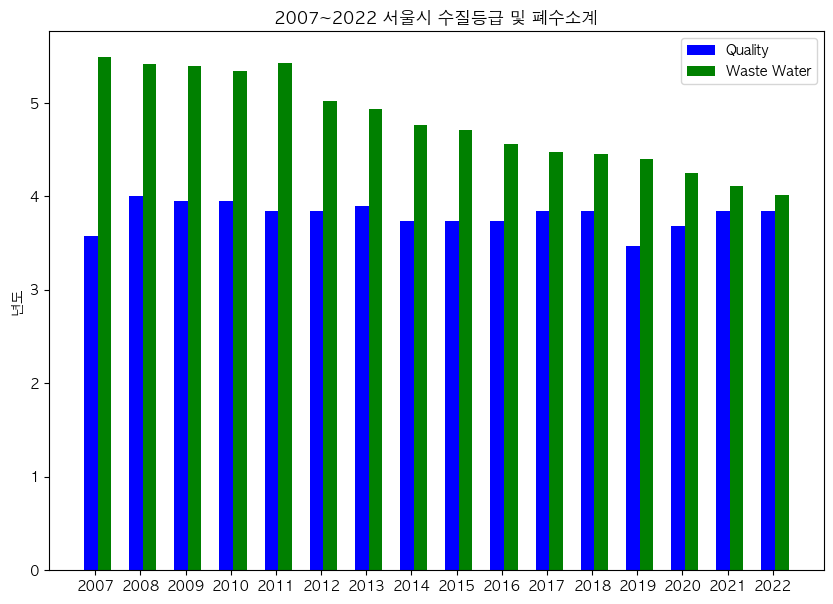

In [73]:
plt.figure(figsize=(10,7))
plt.title("{0}~{1} 서울시 수질등급 및 폐수소계".format(str(values[0]), str(values[-1])))
plt.xticks(x, values)

xlabel = np.arange(len(values))
plt.bar(xlabel, qtymean, label = 'Quality', color='b', width=0.5)
plt.bar(xlabel+0.2, wwmean/30, label ='Waste Water', color='g', width=0.3)  #WasteWater이 숫자가 비교적 커서 분석하기 힘들기 때문에 비율만 살릴 수 있게 계산
plt.ylabel("년도")
plt.legend(loc='upper right')
plt.show()